# 1. Data Import & Exploration


## Load the large dataset


In [1]:
import pandas as pd
import numpy as np
fies_df = pd.read_csv('../datasets/fies_2023_volume1_494887610821.csv')
fies_df.sample(10)

/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_25092/915002061.py:3: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_df = pd.read_csv('../datasets/fies_2023_volume1_494887610821.csv')


RDMD_ID  Region  Province  Household ID  RECODED PROVINCE  \
151996   151997      16        68        151997              6800   
74589     74590       9        72         74590              7200   
77160     77161       9        73         77161              7332   
35659     35660       5         5         35660               500   
130145   130146      14        11        130146              1100   
74984     74985       9        73         74985              7300   
84257     84258      10        35         84258              3500   
14131     14132       3         8         14132               800   
55209     55210       7        12         55210              1200   
154167   154168      16        85        154168              8500   

        Family Size  Salaries/Wages from Regular Employment  \
151996          3.0                                       0   
74589           2.5                                   53600   
77160           9.0                                  109512   
35659           5.5                                       0   
130145          7.5                                   78000   
74984           1.5                                       0   
84257           3.0                                       0   
14131           5.5                                  147800   
55209           3.0                                       0   
154167         11.0                                   48000   

        Salaries/Wages from Seasonal Employment  \
151996                                    43200   
74589                                         0   
77160                                         0   
35659                                     67100   
130145                                    86500   
74984                                     18150   
84257                                     75500   
14131                                         0   
55209                                     75000   
154167                                   191500   

        Income from Salaries and Wages  \
151996                           43200   
74589                            53600   
77160                           109512   
35659                            67100   
130145                          164500   
74984                            18150   
84257                            75500   
14131                           147800   
55209                            75000   
154167                          239500   

        Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)  ...  \
151996                                                  0           ...   
74589                                                   0           ...   
77160                                                   0           ...   
35659                                                   0           ...   
130145                                                  0           ...   
74984                                                   0           ...   
84257                                                   0           ...   
14131                                                   0           ...   
55209                                                   0           ...   
154167                                               1200           ...   

        Raising Factor  Final Population Weights  Urban / Rural  \
151996      113.709564                334.660561              2   
74589       139.146057                345.955963              2   
77160       109.008400                919.553123              1   
35659       158.975189                925.037041              2   
130145      113.049461                872.259579              1   
74984       136.684479                224.847313              2   
84257       116.099998                359.740356              2   
14131       176.963547                975.760223              1   
55209       206.511368                624.657303              1   
154167       43.362869           

# 2. Identifying Data and Attributes


## List all column types and data types


In [2]:
columns_and_datatypes = pd.DataFrame({
    'Data Type': fies_df.dtypes
}, index=fies_df.columns)
# Display all rows of the DataFrame
for index, row in columns_and_datatypes.iterrows():
    print(f"{index}: {row['Data Type']}")

RDMD_ID: int64
Region: int64
Province: int64
Household ID: int64
RECODED PROVINCE: int64
Family Size: float64
Salaries/Wages from Regular Employment: int64
Salaries/Wages from Seasonal Employment: int64
Income from Salaries and Wages: int64
Net Share of Crops, Fruits, etc. (Tot. Net Value of Share): int64
Cash Receipts, Support, etc. from Abroad: int64
Cash Receipts, Support, etc. from Domestic Source: int64
Rentals Received from Non-Agri Lands, etc.: int64
Unnamed: 13: int64
Pension and Retirement Benefits: int64
Dividends from Investment: int64
Other Sources of Income NEC: int64
Family Sustenance Activities: int64
Total Received as Gifts: float64
Crop Farming and Gardening: int64
Livestock and Poultry Raising: int64
Fishing: int64
Forestry and Hunting: int64
Wholesale and Retail: int64
Manufacturing: int64
Transportation, Storage Services: int64
Entrep. Activities NEC: int64
Entrep. Activities NEC.1: int64
Entrep. Activities NEC.2: int64
Hhld, Income from Entrepreneurial Activities, 

All columns seem to be either an integer or a float value.


In [3]:
# Code to remove "" from column names
fies_df.columns = fies_df.columns.str.strip('"')

# 3. Determining the Type of Dataset


## Check if columns are numerical, categorical, or mixed.


In [4]:
column_check = pd.DataFrame({
    'Column Type': None
}, index=fies_df.columns)

for column in fies_df.columns:
    column_check['Column Type'] = pd.api.types.infer_dtype(fies_df[column])

for index, row in column_check.iterrows():
    print(f"{index}: {row['Column Type']}")

RDMD_ID: integer
Region: integer
Province: integer
Household ID: integer
RECODED PROVINCE: integer
Family Size: integer
Salaries/Wages from Regular Employment: integer
Salaries/Wages from Seasonal Employment: integer
Income from Salaries and Wages: integer
Net Share of Crops, Fruits, etc. (Tot. Net Value of Share): integer
Cash Receipts, Support, etc. from Abroad: integer
Cash Receipts, Support, etc. from Domestic Source: integer
Rentals Received from Non-Agri Lands, etc.: integer
Unnamed: 13: integer
Pension and Retirement Benefits: integer
Dividends from Investment: integer
Other Sources of Income NEC: integer
Family Sustenance Activities: integer
Total Received as Gifts: integer
Crop Farming and Gardening: integer
Livestock and Poultry Raising: integer
Fishing: integer
Forestry and Hunting: integer
Wholesale and Retail: integer
Manufacturing: integer
Transportation, Storage Services: integer
Entrep. Activities NEC: integer
Entrep. Activities NEC.1: integer
Entrep. Activities NEC.2: 

All the columns seem to be numerical. However, an excel file that contains all metadata on what certain numbers in certain columns mean is provided by the PSA, (ex. Region Number Equivalents).


## Making a Data Dictionary


In [5]:
fies_column_descriptions = {
    'RDMD_ID': 'Unique identifier for the record',
    'Region': 'Region code',
    'Province': 'Province code',
    'Household ID': 'Unique household identifier',
    'RECODED PROVINCE': 'Recoded province information',
    'Family Size': 'Number of people in the household',
    'Salaries/Wages from Regular Employment': 'Income from regular employment',
    'Salaries/Wages from Seasonal Employment': 'Income from seasonal employment',
    'Income from Salaries and Wages': 'Total income from salaries and wages',
    'Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)': 'Net value from crop and fruit share',
    'Cash Receipts, Support, etc. from Abroad': 'Cash support received from abroad',
    'Cash Receipts, Support, etc. from Domestic Source': 'Cash support received domestically',
    'Rentals Received from Non-Agri Lands, etc.': 'Income from land rentals (non-agricultural)',
    'Unnamed: 13': 'Unknown or unnamed column',
    'Pension and Retirement Benefits': 'Income from pensions and retirement',
    'Dividends from Investment': 'Income from dividends',
    'Other Sources of Income NEC': 'Other sources of income not elsewhere classified',
    'Family Sustenance Activities': 'Income from family sustenance activities',
    'Total Received as Gifts': 'Total gifts received by the household',
    'Crop Farming and Gardening': 'Income from crop farming and gardening',
    'Livestock and Poultry Raising': 'Income from livestock and poultry raising',
    'Fishing': 'Income from fishing activities',
    'Forestry and Hunting': 'Income from forestry and hunting',
    'Wholesale and Retail': 'Income from wholesale and retail business',
    'Manufacturing': 'Income from manufacturing activities',
    'Transportation, Storage Services': 'Income from transportation and storage services',
    'Entrep. Activities NEC': 'Income from entrepreneurial activities (not elsewhere classified)',
    'Entrep. Activities NEC.1': 'Income from entrepreneurial activities (additional category 1)',
    'Entrep. Activities NEC.2': 'Income from entrepreneurial activities (additional category 2)',
    'Hhld, Income from Entrepreneurial Activities, Total': 'Total household income from entrepreneurial activities',
    'Losses from EA': 'Losses from entrepreneurial activities',
    'Cereal and Cereal Preparations (Total)': 'Expenditure on cereals and cereal preparations',
    'Meat and Meat Preparations': 'Expenditure on meat and meat preparations',
    'Fish and Marine Products (Total)': 'Expenditure on fish and marine products',
    'Dairy Products and Eggs (Total)': 'Expenditure on dairy products and eggs',
    'Oils and Fats (Total)': 'Expenditure on oils and fats',
    'Fruits and Vegetables': 'Expenditure on fruits and vegetables',
    'Vegetables (Total)': 'Expenditure on vegetables',
    'Sugar, Jam and Honey (Total)': 'Expenditure on sugar, jam, and honey',
    'Food Not Elsewhere Classified (Total)': 'Expenditure on other food items',
    'Fruit and vegetable juices': 'Expenditure on fruit and vegetable juices',
    'Coffee, Cocoa and Tea (Total)': 'Expenditure on coffee, cocoa, and tea',
    'Tea (total)  expenditure': 'Expenditure on tea',
    'Cocoa (total)  expenditure': 'Expenditure on cocoa',
    'Main Source of Water Supply (2nd visit only)': 'Main source of water supply (second visit)',
    'Softdrinks': 'Expenditure on soft drinks',
    'Other Non Alcoholic Beverages': 'Expenditure on other non-alcoholic beverages',
    'Alcoholic Beverages (Total)': 'Expenditure on alcoholic beverages',
    'Tobacco (Total)': 'Expenditure on tobacco products',
    'Other Vegetables (Total)': 'Expenditure on other types of vegetables',
    'Services_Primary_Goods': 'Expenditure on services and primary goods',
    'Alcohol Procduction Services': 'Expenditure on alcohol production services',
    'Total Food Consumed at Home (Total)': 'Total food consumed at home',
    'Food Regularly Consumed Outside The Home (Total)': 'Food consumed outside the home',
    'Hhld, Food': 'Household expenditure on food',
    'Clothing, Footwear and Other Wear': 'Expenditure on clothing, footwear, and other wear',
    'Housing and water (Total)': 'Expenditure on housing and water',
    'Actual House Rent': 'Expenditure on actual house rent',
    'Imputed House Rental Value': 'Imputed value of house rental',
    'Imputed Housing Benefit Rental Value': 'Imputed value of housing benefit rental',
    'House Rent/Rental Value': 'Expenditure on house rent/rental value',
    'Furnishings, Household Equipment & Routine Household Mainte': 'Expenditure on furnishings and household equipment',
    'Health (Total)': 'Expenditure on health services and products',
    'Transportation (Total)': 'Expenditure on transportation',
    'Communication (Total)': 'Expenditure on communication services',
    'Recreation and Culture (Total)': 'Expenditure on recreation and culture',
    'Education (Total)': 'Expenditure on education',
    'Insurance': 'Expenditure on insurance',
    'Miscellaneous Goods and Services (Total)': 'Expenditure on miscellaneous goods and services',
    'Durable Furniture': 'Expenditure on durable furniture',
    'Special Family Occasion': 'Expenditure on special family occasions',
    'Other Expenditure (inc. Value Consumed, Losses)': 'Other expenditures including losses',
    'Other Disbursements': 'Other household disbursements',
    'Accomodation Services': 'Expenditure on accommodation services',
    'Total Non-Food Expenditure': 'Total non-food expenditure',
    'Hhld, Income, Total': 'Total household income',
    'Hhld, Expenditures, Total': 'Total household expenditures',
    'Total Household Disbursements': 'Total household disbursements',
    'Other Receipts': 'Other household receipts',
    'Total Receipts': 'Total receipts',
    'Psu (Recode)': 'Primary Sampling Unit (recoded)',
    'Raising Factor': 'Raising factor for survey results',
    'Final Population Weights': 'Final weights for population data',
    'Urban / Rural': 'Urban or rural classification',
    'Per Capita Income': 'Household per capita income',
    'NPCINC': 'National per capita income',
    'RPCINC': 'Regional per capita income',
    'Per Capita Income Decile (Province)': 'Per capita income decile in the province',
    'pPCINC': 'Provincial per capita income decile',
    'Per Capita Income Decile (Region with Negros Island Region (NIR))': 'Per capita income decile (region with NIR)',
    'Region (with NIR)': 'Region code including NIR'
}


In [6]:
fies_derivations = {
    'Total Receipts': 'Total Household Income + Other Receipts',
    'Hhld, Income, Total': 'Net Share of Crops, Fruits, etc. + Cash Receipts, Support, etc. from Abroad + Cash Receipts, Support, etc. from Domestic Source + Unnamed + Pension and Retirement Benefits + Dividends from Investment + Other Sources of Income NEC + Family Sustenance Activities + Total Received as Gifts + Household, Income from Entrep Activities, Total + Imputed House Rental Value',
    'Hhld, Income from Entrepreneurial Activities, Total': 'Crop Farming and Gardening + Livestock and Poultry Raising + Fishing + Forestry and Hunting + Wholesale and Retail + Manufacturing + Transportation, Storage Services + Entrep. Activities NEC + Entrep. Activities NEC 1 + Entrep. Activities NEC 2',
    'Total Household Disbursements': 'Total Household Expenditure + Other Disbursements',
    'Hhld, Expenditures, Total': 'Household Food + Total Non-Food Expenditure',
    'Hhld, Food': 'Total Food Consumed at Home + Food Regularly Consumed Outside The Home',
    'Total Food Consumed at Home (Total)': 'Cereal and Cereal Preparations + Meat and Meat Preparations + Fish and Marine Products + Dairy and Eggs + Oils and Fats + Fruits and Vegetables + Vegetables + Sugar, jam and Honey + Food Not Elsewhere Classified + Fruit and Vegetable Juices + Coffee, Cocoa and Tea + Tea + Cocoa + Main Source of Water Supply + Softdrinks + Other Non Alcoholic Beverages',
    'Total Non-Food Expenditure': 'Alcoholic Beverages + Tobacco + Other Vegetables + Services_Primary_Goods + Alcoholic Production Services + Housing and water (Total) + Furnishings, Household Equipment & Routine Household Maintenance + Health + Transportation + Communication + Recreation and Culture + Education + Insurance + Miscellaneous Goods and Services + Durable Furniture + Special Family Occasion + Other Expenditure + Accommodation Services + Clothing, Footwear and Other Wear',
}


In [7]:
fies_volume1_data_dict = pd.DataFrame({
    'Column Name': fies_df.columns,
    'Data Type': fies_df.dtypes,
    'Non-Null Count': fies_df.notnull().sum(),
    'Unique Values': fies_df.nunique(),
    'Description': [fies_column_descriptions.get(col, 'No desciption available') for col in fies_df.columns],
    'Derivations from other columns': [fies_derivations.get(col, '') for col in fies_df.columns]
})
fies_volume1_data_dict.to_csv('../fies_volume1_data_dict.csv', index=False)

# 4. Data Quality and Assessment


## Check for missing values, duplicates, outliers, and wrong data.<b>


Check for duplicates


In [8]:
number_of_rows = fies_df.shape[0]

print(f"Number of rows: {number_of_rows}")

removed_duplicates = fies_df.copy()
removed_duplicates.drop_duplicates(inplace=True)

print(f"Number of rows after dropping duplicates: {removed_duplicates.shape[0]}")

Number of rows: 163268
Number of rows after dropping duplicates: 163268


No duplicates are found.


From the data dictionary, the Total Household Disbursements column is the only one with an object datatype, suggesting mixed values of numbers, strings, etc.


In [9]:
for column in removed_duplicates.columns:
    if removed_duplicates[column].isnull().any():
        print(f"Column {column} has missing values")

The code block above does not show any null values initially, therefore there is the possibility of data with only whitespace values. The code below will strip all whitespaces
to know the true number of missing values.


In [10]:
# Function to check if a value is whitespace or empty
def has_whitespace(val):
    return isinstance(val, str) and val.strip() == ''

whitespace_rows = removed_duplicates.map(has_whitespace).any(axis=1)

whitespace_count = whitespace_rows.sum()

print(f"Number of rows with whitespace: {whitespace_count}")

Number of rows with whitespace: 7732


There are whitespaces. Whitespaces could mean that the value for that data is zero. Therefore, a check must be made to ensure that there are zeroes in the dataset as well to know that whitespaces and zeroes are equivalent.


In [11]:
print(removed_duplicates['Total Household Disbursements'].value_counts().where(removed_duplicates['Total Household Disbursements'] == 0, 1).sum())

144056


Now we detect potential outliers using statistical methods.
The main columns to look at are the Total Household Income and Total Household Expenditure columns..


In [12]:
income_mean = removed_duplicates['Hhld, Income, Total'].mean()
income_median = removed_duplicates['Hhld, Income, Total'].median()
income_std = removed_duplicates['Hhld, Income, Total'].std()

print(f"Income Mean: {income_mean}")
print(f"Income Median: {income_median}")
print(f"Income Standard Deviation: {income_std}")

Income Mean: 332147.2798196217
Income Median: 241080.0
Income Standard Deviation: 406065.14044660714


In [13]:
expenditure_mean = removed_duplicates['Hhld, Expenditures, Total'].mean()
expenditure_median = removed_duplicates['Hhld, Expenditures, Total'].median()
expenditure_std = removed_duplicates['Hhld, Expenditures, Total'].std()

print(f"Expenditure Mean: {expenditure_mean}")
print(f"Expenditure Median: {expenditure_median}")
print(f"Expenditure Standard Deviation: {expenditure_std}")

Expenditure Mean: 243155.34994505966
Expenditure Median: 191325.25
Expenditure Standard Deviation: 195625.7027338354


From the results, the mean for the income and expenditure columns are quite large. To see more, a boxplot can be used to visualize the distribution


Text(0, 0.5, 'Value')

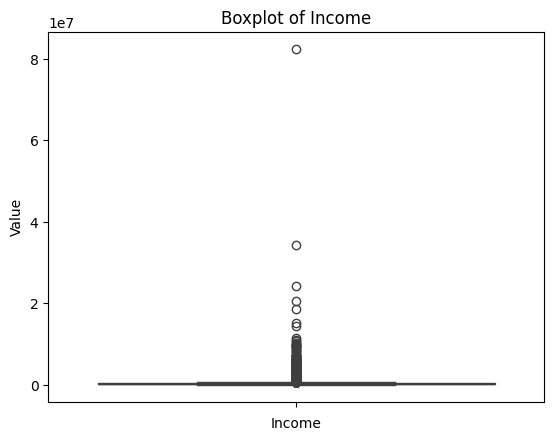

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(removed_duplicates['Hhld, Income, Total'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

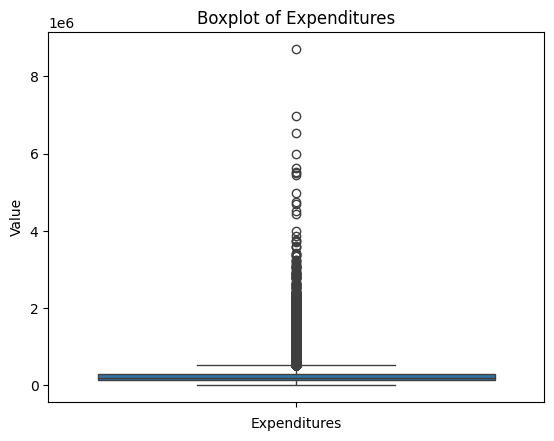

In [15]:
sns.boxplot(removed_duplicates['Hhld, Expenditures, Total'])
plt.title('Boxplot of Expenditures')
plt.xlabel('Expenditures')
plt.ylabel('Value')

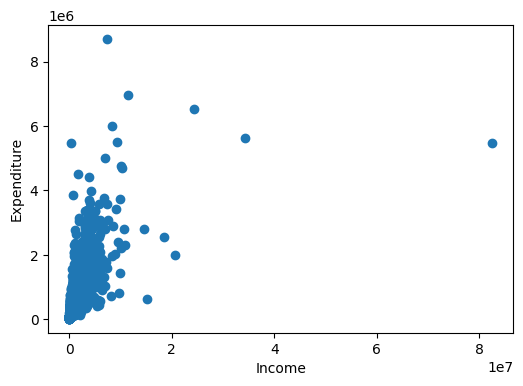

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(removed_duplicates['Hhld, Income, Total'], removed_duplicates['Hhld, Expenditures, Total'])
ax.set_xlabel('Income')
ax.set_ylabel('Expenditure')
plt.show()

From the boxplots and scatter plots, there defenitely are high-value outliers for both Income and Expenditure, and from the column derivations, this also means that by addressing only these two columns, the rest of the outlier columns can be addressed.


## Impute, discretize and data wrangling


Since there are zeroes present, the Total Household Disbursements column must be addressed. Upon inspection, Total Household Disbursements can be imputed from the sum of Hhld, Expenditures, Total and Other Disbursements.


In [17]:
removed_null = removed_duplicates.copy()
removed_null.loc[whitespace_rows, 'Total Household Disbursements'] = removed_null.loc[whitespace_rows, 
                                                                            'Hhld, Expenditures, Total'] + removed_null.loc[whitespace_rows, 'Other Disbursements']

Double-check for missing values


In [18]:
whitespace_rows = removed_null.map(has_whitespace).any(axis=1)
whitespace_count = whitespace_rows.sum()
print(f"Number of rows with whitespace: {whitespace_count}")

Number of rows with whitespace: 0


We now address the outliers using the IQR method


In [19]:
income_Q1 = removed_null['Hhld, Income, Total'].quantile(0.25)
income_Q3 = removed_null['Hhld, Income, Total'].quantile(0.75)
income_IQR = income_Q3 - income_Q1
print(f"Income Q1: {income_Q1}")
print(f"Income Q3: {income_Q3}")
print(f"Income IQR: {income_IQR}")

expenditure_Q1 = removed_null['Hhld, Expenditures, Total'].quantile(0.25)
expenditure_Q3 = removed_null['Hhld, Expenditures, Total'].quantile(0.75)
expenditure_IQR = expenditure_Q3 - expenditure_Q1
print(f"Expenditure Q1: {expenditure_Q1}")
print(f"Expenditure Q3: {expenditure_Q3}")
print(f"Expenditure IQR: {expenditure_IQR}")

Income Q1: 162539.0
Income Q3: 389478.0
Income IQR: 226939.0
Expenditure Q1: 131751.75
Expenditure Q3: 293141.125
Expenditure IQR: 161389.375


In [20]:
# Income
removed_outliers = removed_null.copy()
print('Shape before removing outliers:', removed_outliers.shape)
lower_bound_income = income_Q1 - 1.5 * income_IQR
upper_bound_income = income_Q3 + 1.5 * income_IQR
upper_income = np.where(removed_outliers['Hhld, Income, Total'] >= upper_bound_income)[0]
lower_income = np.where(removed_outliers['Hhld, Income, Total'] <= lower_bound_income)[0]

removed_outliers.drop(index=upper_income, inplace=True)
removed_outliers.drop(index=lower_income, inplace=True)
print('Shape after removing outliers for Income:', removed_outliers.shape)

# Expenditure
lower_bound_expenditure = expenditure_Q1 - 1.5 * expenditure_IQR
upper_bound_expenditure = expenditure_Q3 + 1.5 * expenditure_IQR
removed_outliers.reset_index(drop=True, inplace=True)
upper_expenditure = np.where(removed_outliers['Hhld, Expenditures, Total'] >= upper_bound_expenditure)[0]
lower_expenditure = np.where(removed_outliers['Hhld, Expenditures, Total'] <= lower_bound_expenditure)[0]

removed_outliers.drop(index=upper_expenditure, inplace=True)
removed_outliers.drop(index=lower_expenditure, inplace=True)
print('Shape after removing outliers for Expenditure:', removed_outliers.shape)

Shape before removing outliers: (163268, 91)
Shape after removing outliers for Income: (151704, 91)
Shape after removing outliers for Expenditure: (149622, 91)


Time to check using the same methods.


In [21]:
income_mean = removed_outliers['Hhld, Income, Total'].mean()
income_median = removed_outliers['Hhld, Income, Total'].median()
income_std = removed_outliers['Hhld, Income, Total'].std()

print(f"Income Mean: {income_mean}")
print(f"Income Median: {income_median}")
print(f"Income Standard Deviation: {income_std}")

expenditure_mean = removed_outliers['Hhld, Expenditures, Total'].mean()
expenditure_median = removed_outliers['Hhld, Expenditures, Total'].median()
expenditure_std = removed_outliers['Hhld, Expenditures, Total'].std()

print(f"Expenditure Mean: {expenditure_mean}")
print(f"Expenditure Median: {expenditure_median}")
print(f"Expenditure Standard Deviation: {expenditure_std}")

Income Mean: 262455.5624159549
Income Median: 225647.25
Income Standard Deviation: 142442.89244017968
Expenditure Mean: 202702.7845026133
Expenditure Median: 179935.75
Expenditure Standard Deviation: 101436.79255052749


Text(0, 0.5, 'Value')

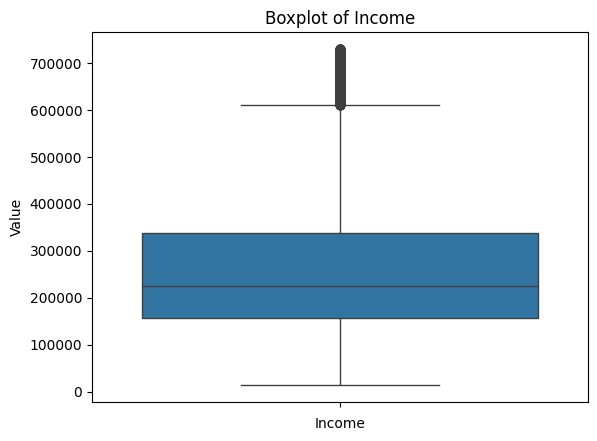

In [22]:
sns.boxplot(removed_outliers['Hhld, Income, Total'])
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

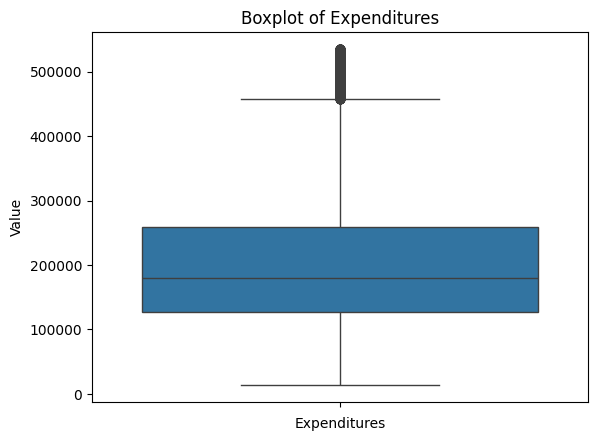

In [23]:
sns.boxplot(removed_outliers['Hhld, Expenditures, Total'])
plt.title('Boxplot of Expenditures')
plt.xlabel('Expenditures')
plt.ylabel('Value')

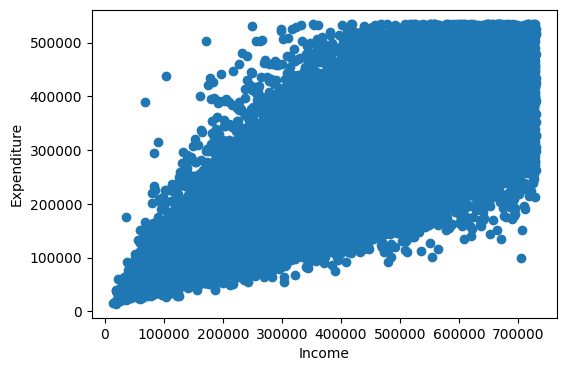

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(removed_outliers['Hhld, Income, Total'], removed_outliers['Hhld, Expenditures, Total'])
ax.set_xlabel('Income')
ax.set_ylabel('Expenditure')
plt.show()

The outliers are now removed.


There is a column named Unnamed_13 in the dataset. We opted to total the unnamed column and other sources of income NEC because the unnamed column contributes to the total income of the household as some of the total income were inaccurate if the unnamed column wans't included


In [25]:
imputted_column_13 = removed_outliers.copy()
imputted_column_13['Other Sources of Income NEC'] = imputted_column_13['Other Sources of Income NEC'] + imputted_column_13['Unnamed: 13']
print("Number of columns before dropping:", imputted_column_13.shape[1])
imputted_column_13.drop(columns=['Unnamed: 13'], inplace=True)
print("Number of columns after dropping:", imputted_column_13.shape[1])

Number of columns before dropping: 91
Number of columns after dropping: 90


# 5. Quantitative Statistics


In [26]:
cleaned_df = imputted_column_13.copy()

#### Functions


In [27]:
def create_stacked_bar_plot(df, x_col, y_cols, title): # y_cols is a list of columns to stack
    subset_data = df[y_cols].copy()
    subset_data[x_col] = df[x_col]
    subset_data = subset_data.groupby(x_col).sum().reset_index()
    subset_data = subset_data.set_index(x_col)
    subset_data.plot(kind="bar", stacked=True, figsize=(12, 10))
    plt.title(f"Stacked Bar Plot of {title} by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel("Amount")
    plt.tight_layout()
    plt.show()

In [28]:
def create_boxplot(df, x_col, y_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(f"Box Plot of {y_col} by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
def plot_histogram_with_highlight(df, x_axis):
    counts, bins, patches = plt.hist(
        df[x_axis], bins=10, color="blue", edgecolor="black"
    )

    top_3_bins = np.argsort(counts)[-3:]
    for idx in top_3_bins:
        patches[idx].set_facecolor("green")

    plt.title(f"Distribution of {x_axis}")
    plt.xlabel(x_axis)
    plt.ylabel("Frequency")
    plt.show()

    top_3_values = df[x_axis].value_counts().nlargest(3)
    print(top_3_values)


In [30]:
def plot_expenditures_and_income_boxplot(df, x_axis):
    df_plot = df[[x_axis, "Hhld, Expenditures, Total", "Hhld, Income, Total"]].copy()
    df_plot = df_plot.melt(id_vars=x_axis, 
                           var_name="Type", 
                           value_name="Value")  # Melt the DataFrame to long format for easier plotting

    df_plot["Type"] = df_plot["Type"].replace(
        {
            "Hhld, Expenditures, Total": "Total Expenditures",
            "Hhld, Income, Total": "Total Income",
        }
    )  # Renaming the columns for better readability

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x_axis, y="Value", hue="Type", data=df_plot, dodge=True)
    plt.title(f"Boxplot of Total Expenditures and Income by {x_axis}")
    plt.xlabel(x_axis)
    plt.ylabel("Amount (Philippine Peso)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



## Generate statistics and provide EDA. Provide illustration


In [31]:
categorical_columns = [
    'RDMD_ID',
    'Household ID',
    'Region',
    'Province',
    'RECODED PROVINCE',
    'Psu (Recode)',
    'Urban / Rural',
    'Per Capita Income Decile (Province)',
    'pPCINC',
    'Per Capita Income Decile (Region)'
]

cleaned_df.drop(columns=categorical_columns, errors='ignore').describe()

Family Size  Salaries/Wages from Regular Employment  \
count  149622.000000                           149622.000000   
mean        4.069445                           108574.365568   
std         1.932703                           134511.928613   
min         1.000000                                0.000000   
25%         3.000000                                0.000000   
50%         4.000000                            60600.000000   
75%         5.000000                           171400.000000   
max        23.500000                           727800.000000   

       Salaries/Wages from Seasonal Employment  \
count                            149622.000000   
mean                              28799.861919   
std                               50533.839268   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                               45000.000000   
max                              638000.000000   

       Income from Salaries and Wages  \
count                   149622.000000   
mean                    137374.227487   
std                     136163.028552   
min                          0.000000   
25%                      23000.000000   
50%                     106855.000000   
75%                     202200.000000   
max                     727800.000000   

       Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)  \
count                                      149622.000000            
mean                                         1453.282245            
std                                          8724.647058            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                        360000.000000            

       Cash Receipts, Support, etc. from Abroad  \
count                             149622.000000   
mean                               18236.613961   
std                                52469.369386   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                               680000.000000   

       Cash Receipts, Support, etc. from Domestic Source  \
count                                      149622.000000   
mean                                        16289.809086   
std                                         24823.465930   
min                                             0.000000   
25%                                             0.000000   
50%                                          7800.000000   
75%                                         22000.000000   
max                                        555000.000000   

       Rentals Received from Non-Agri Lands, etc.  \
count                               149622.000000   
mean                                  1042.563226   
std                                  10050.816376   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                 540000.000000   

       Pension and Retirement Benefits  Dividends from Investment  ...  \
count                    149622.000000              149622.000000  ...   
mean                       5215.043643                 109.128003  ...   
std                       27800.896879                3193.821649  ...   
min                           0.000000                   0.000000  ...   
25%                           0.000000                   0.000000  ...   
50%                           0.000000                   0.000000 

### Data Visualization


#### _Family Size Distribution_


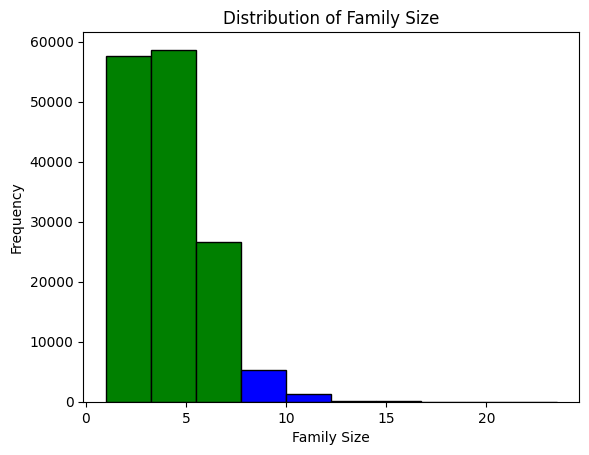

Family Size
4.0    25037
3.0    22377
5.0    18352
Name: count, dtype: int64


In [32]:

plot_histogram_with_highlight(
    cleaned_df,
    x_axis="Family Size",
)


#### _Province_


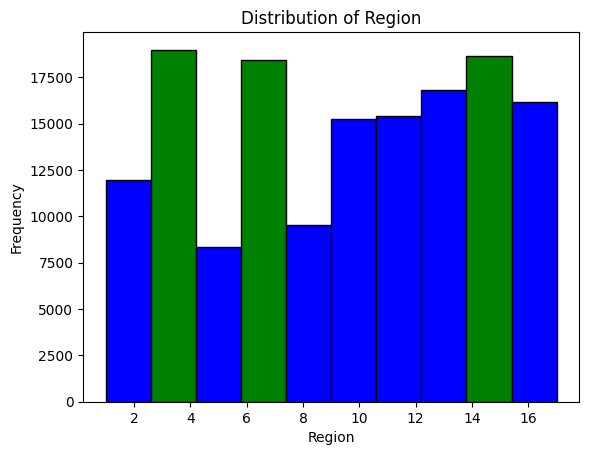

Region
13    16830
3     11838
15    10367
Name: count, dtype: int64


In [33]:
plot_histogram_with_highlight(
    cleaned_df,
    x_axis="Region",
)

#### _Per Capita Income_


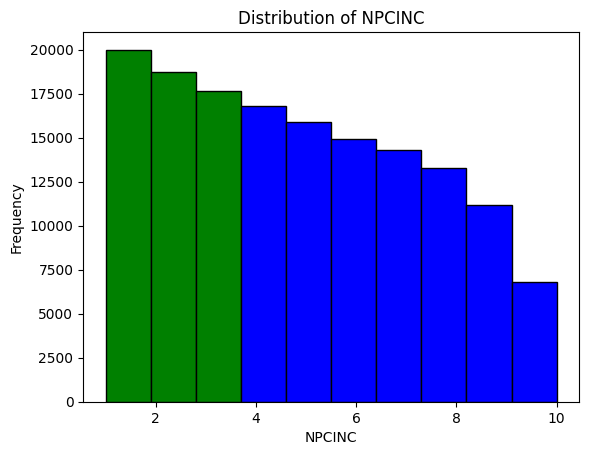

NPCINC
1    19997
2    18751
3    17656
Name: count, dtype: int64


In [34]:
plot_histogram_with_highlight(
    cleaned_df,
    "NPCINC"
)

### **Income**


#### _Total Income_


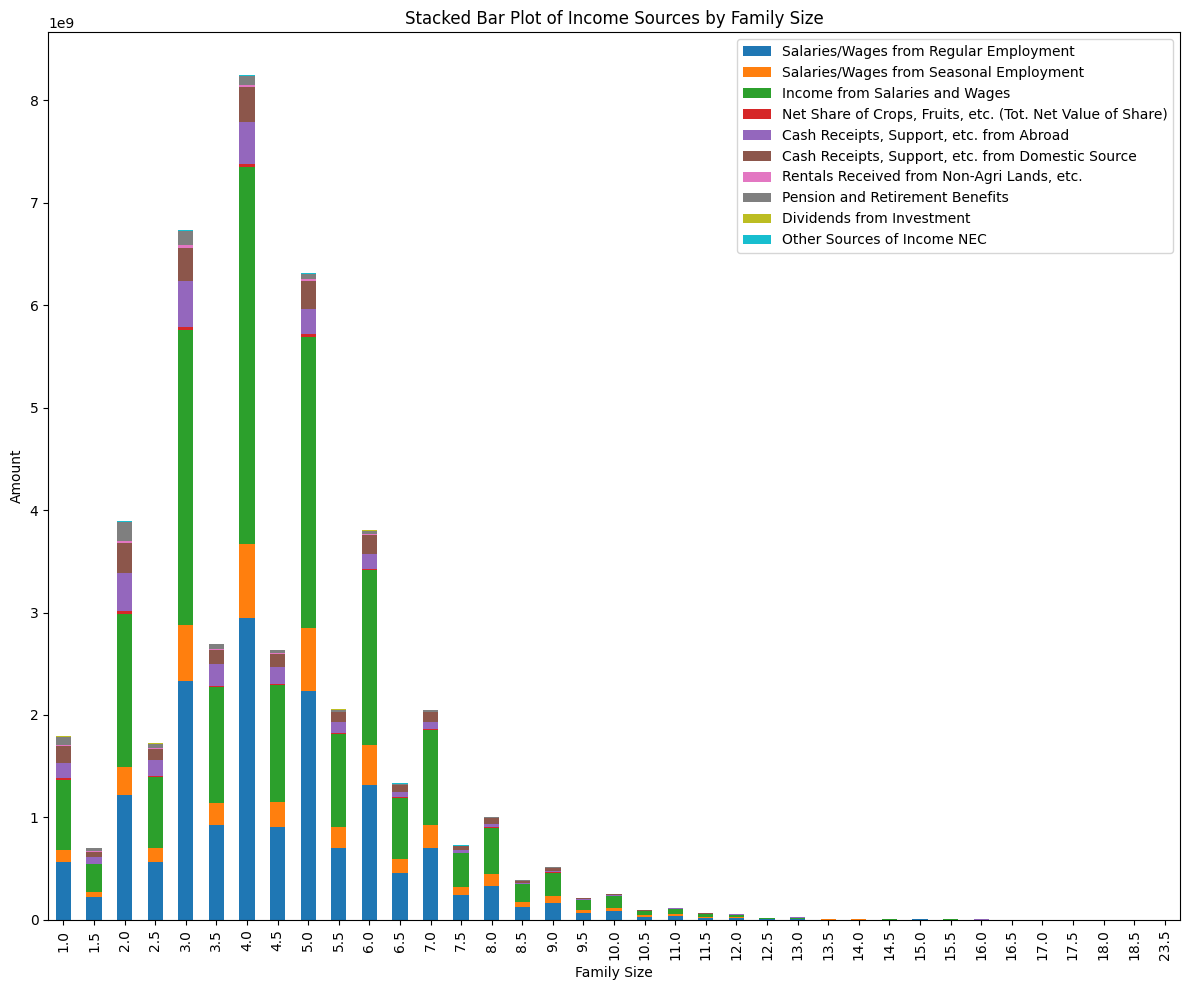

In [35]:
# Stacked bar plot of income sources
income_sources = [
    'Salaries/Wages from Regular Employment',
    'Salaries/Wages from Seasonal Employment',
    'Income from Salaries and Wages',
    'Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)',
    'Cash Receipts, Support, etc. from Abroad',
    'Cash Receipts, Support, etc. from Domestic Source',
    'Rentals Received from Non-Agri Lands, etc.',
    'Pension and Retirement Benefits',
    'Dividends from Investment',
    'Other Sources of Income NEC',
]

create_stacked_bar_plot(cleaned_df, 'Family Size', income_sources, 'Income Sources')

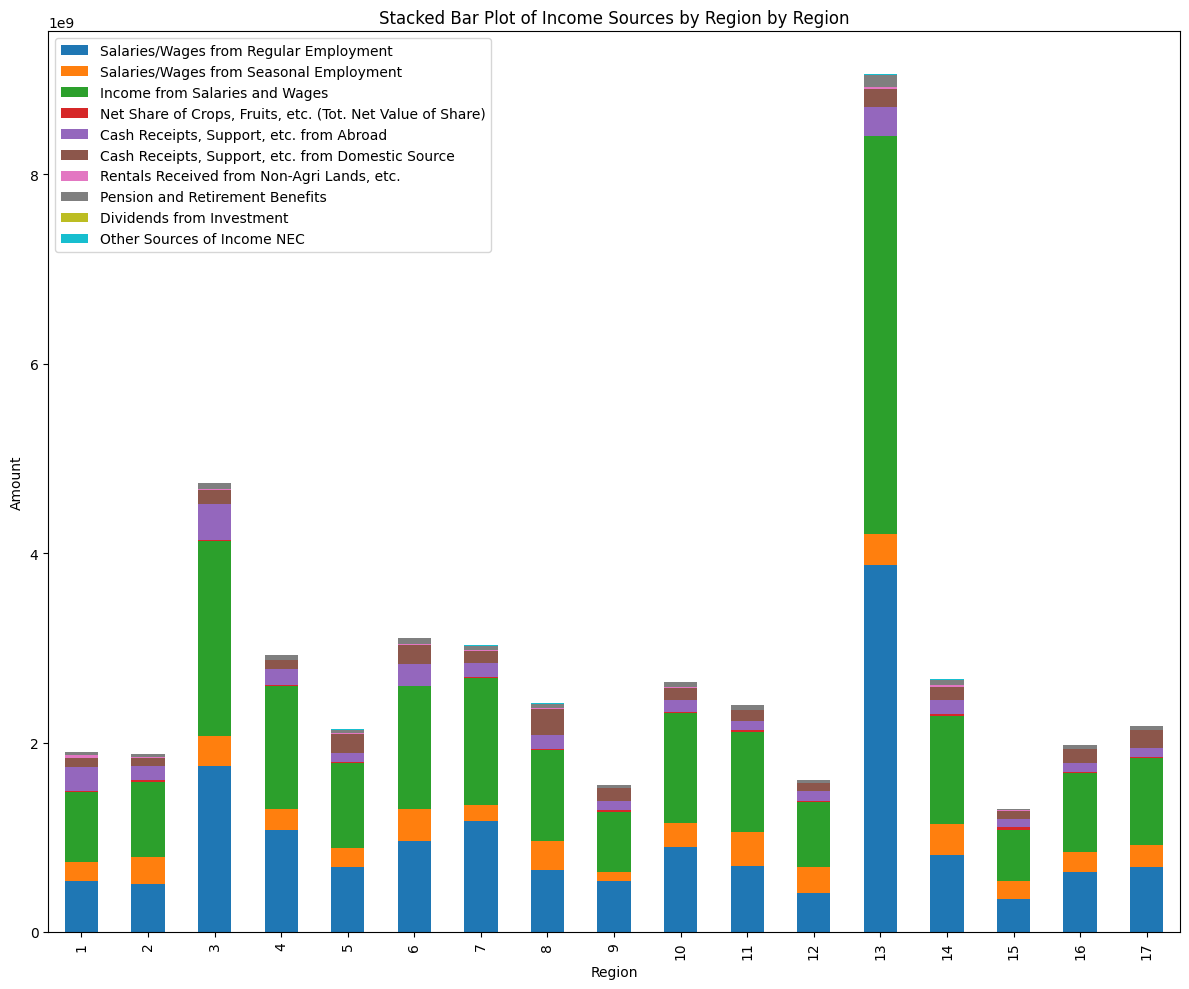

In [36]:
create_stacked_bar_plot(cleaned_df, 'Region', income_sources, 'Income Sources by Region')

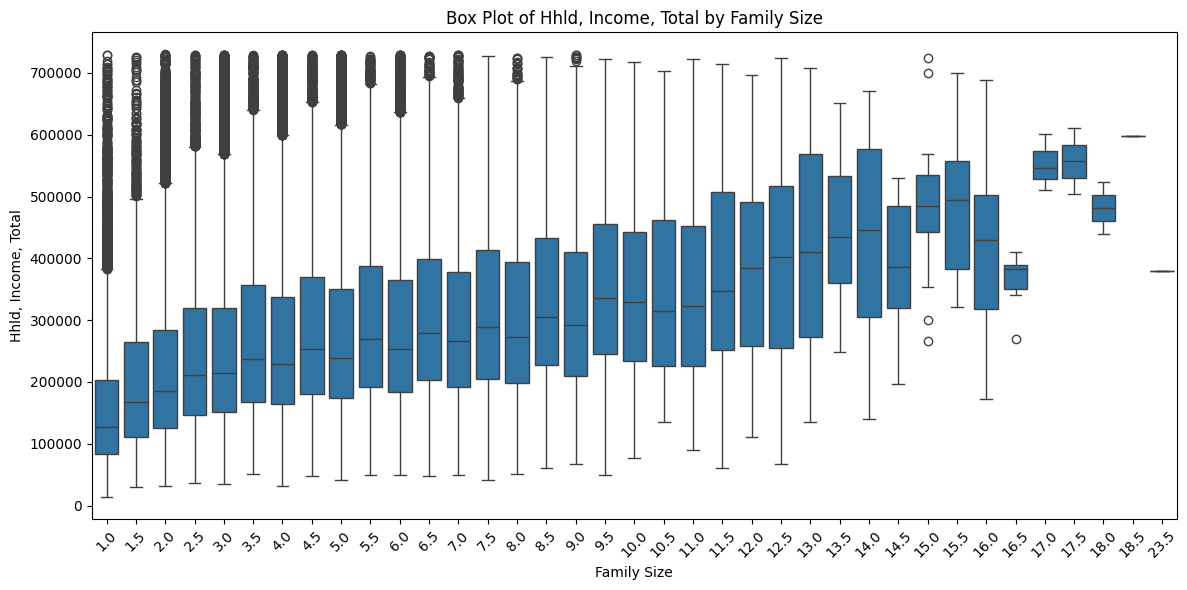

In [37]:
total_income = 'Hhld, Income, Total'
create_boxplot(cleaned_df, 'Family Size', total_income)

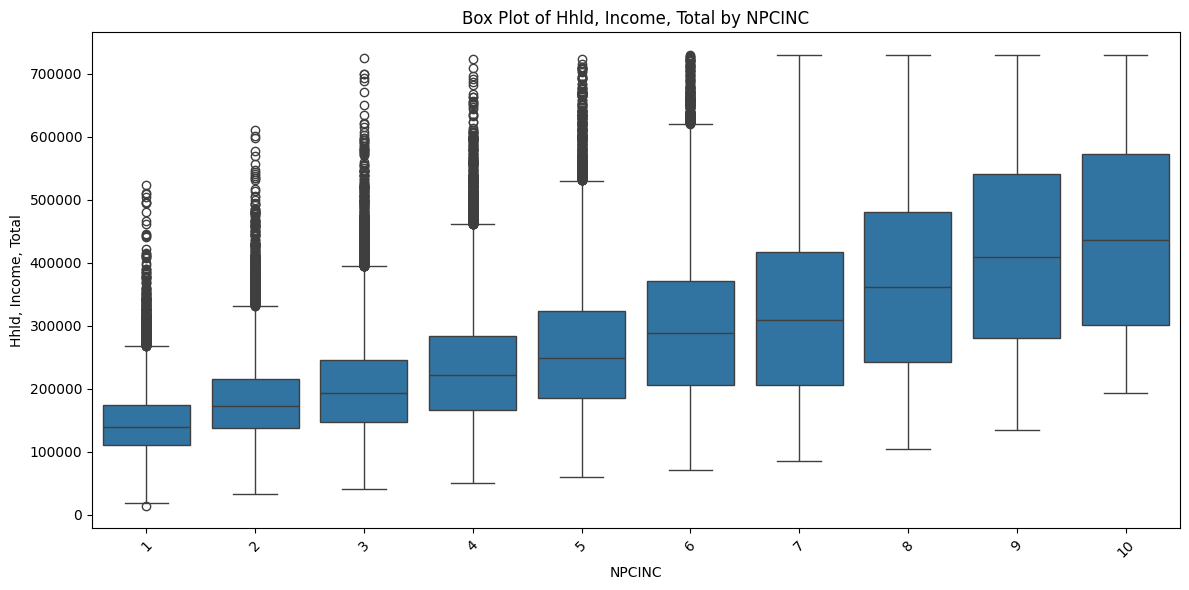

In [38]:


create_boxplot(cleaned_df, 'NPCINC', 'Hhld, Income, Total')

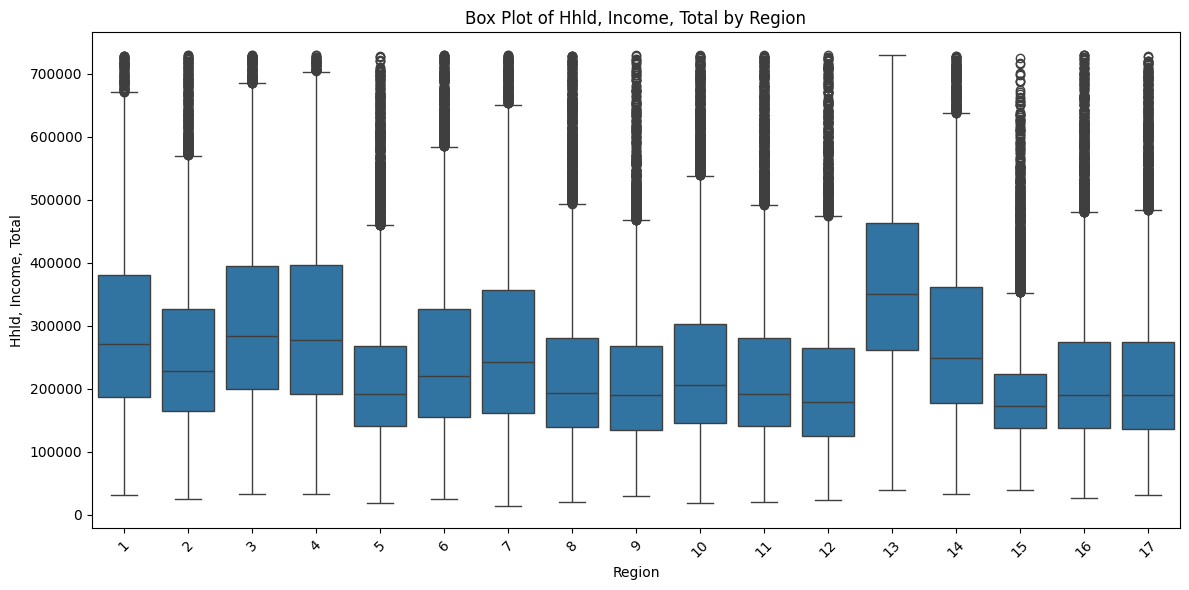

In [39]:
create_boxplot(cleaned_df, 'Region', 'Hhld, Income, Total')

> [Explanation]


#### _Wages and Salaries_


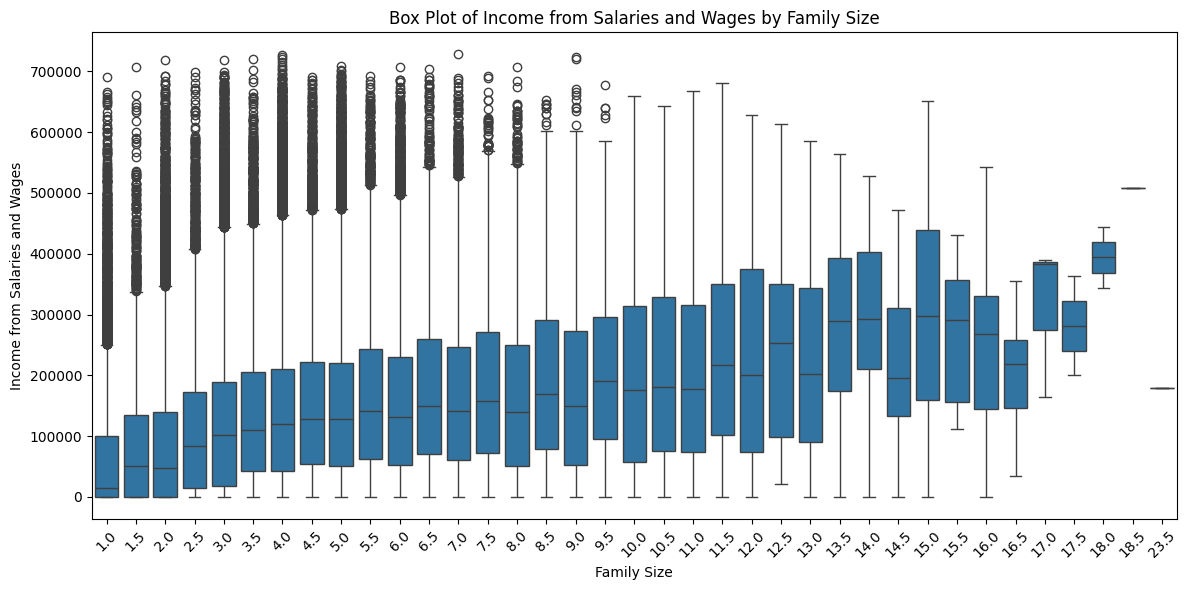

In [40]:
create_boxplot(cleaned_df, 'Family Size', 'Income from Salaries and Wages')

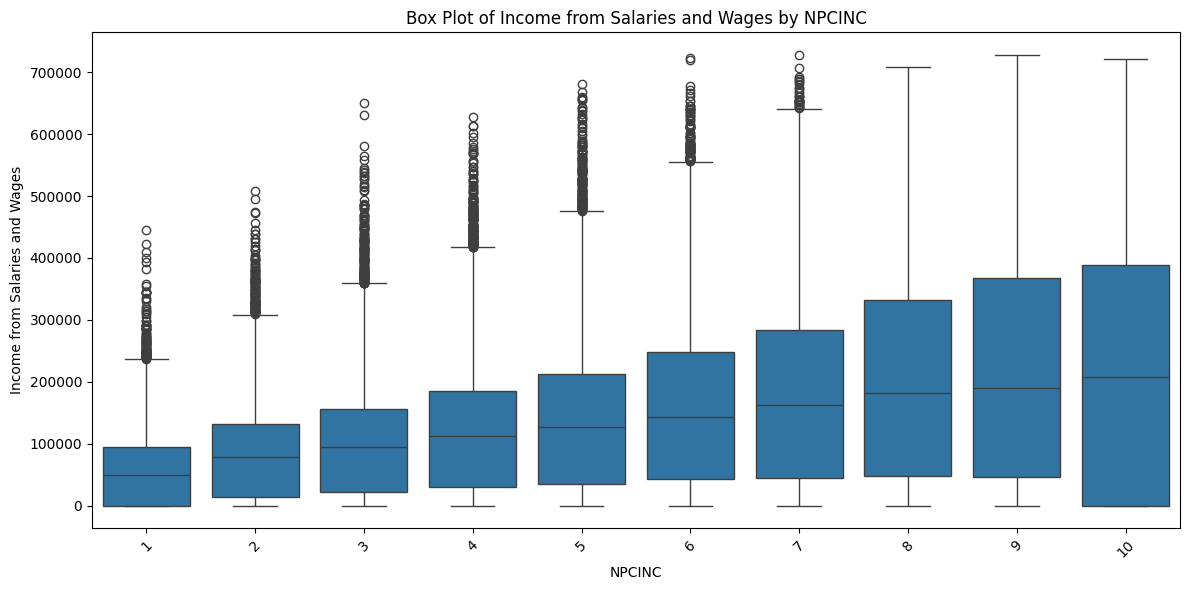

In [41]:
create_boxplot(cleaned_df, "NPCINC", "Income from Salaries and Wages")

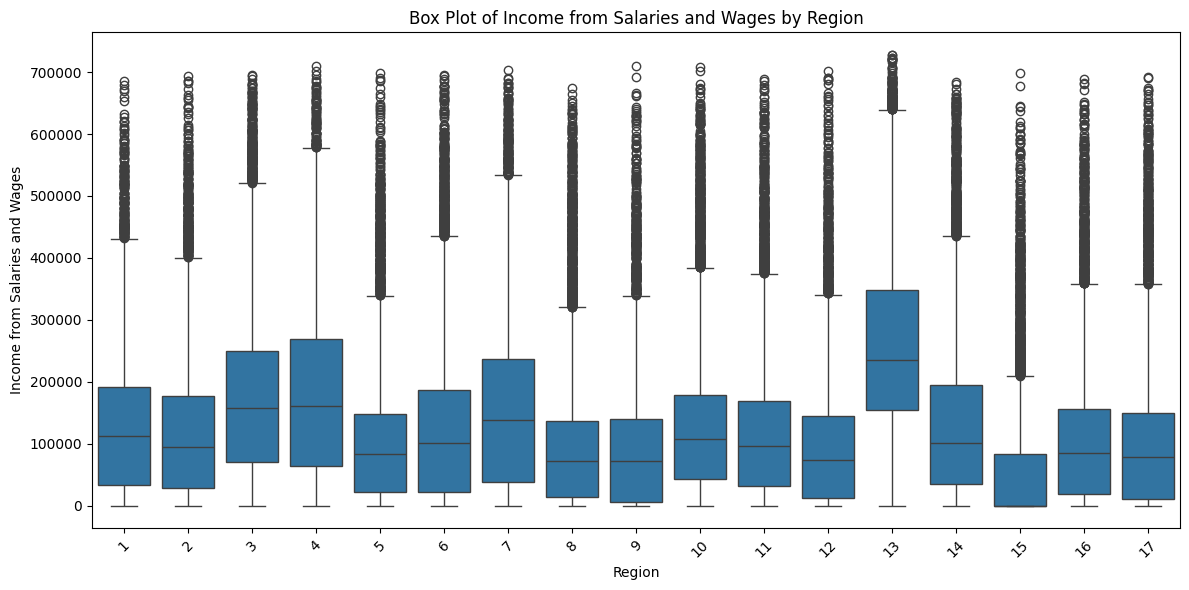

In [42]:
create_boxplot(cleaned_df, "Region", "Income from Salaries and Wages")

> [Explanation]


### **Expenses**


#### _Total Expenses_


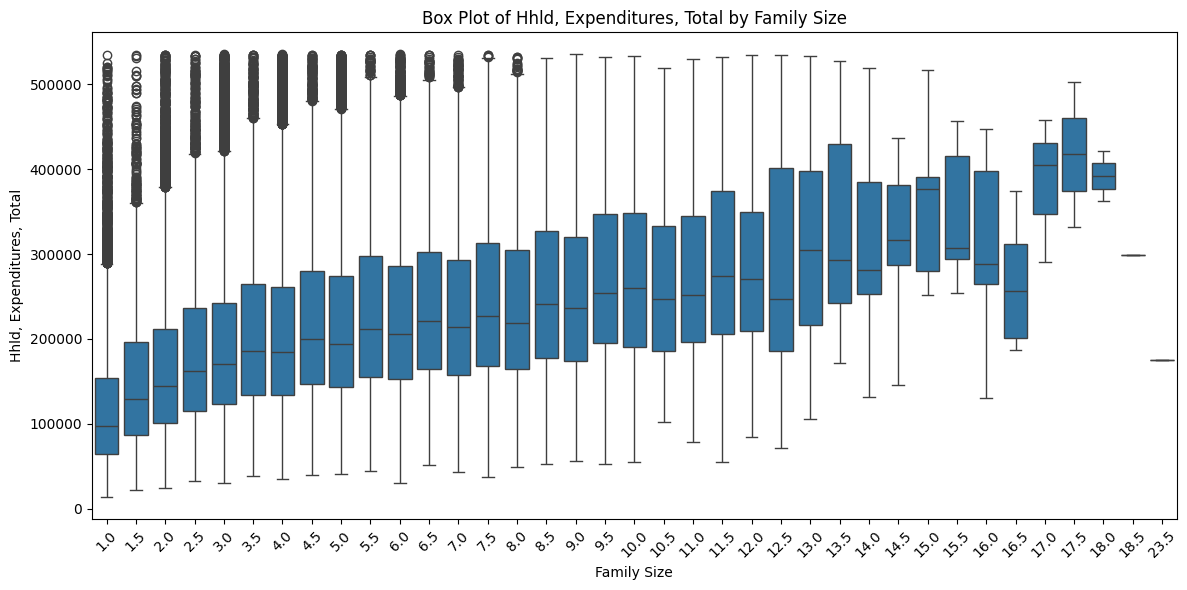

In [43]:
# Boxplot of "Total Household Disbursements" per "Family Size"
total_disbursements = "Hhld, Expenditures, Total"
create_boxplot(cleaned_df, 'Family Size', total_disbursements)

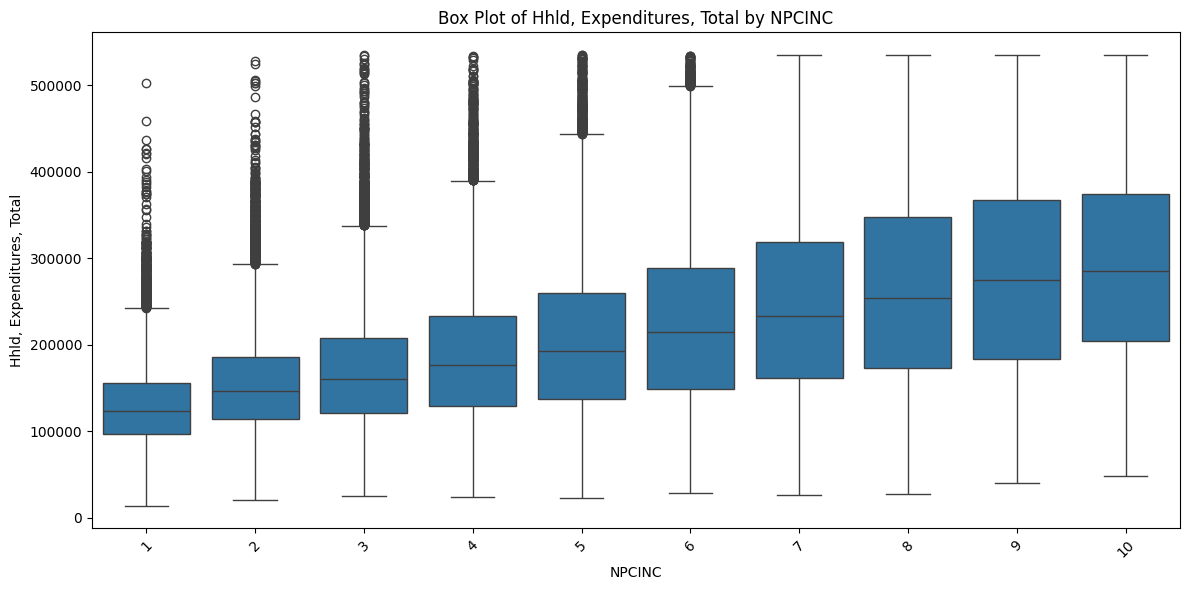

In [44]:
create_boxplot(cleaned_df, 'NPCINC', total_disbursements)

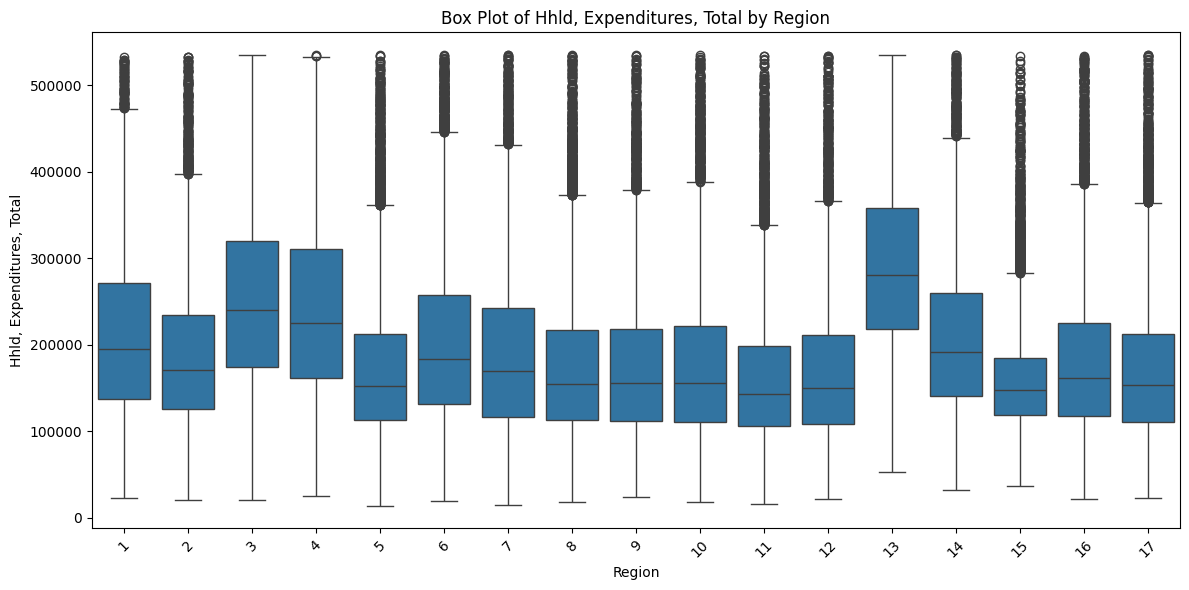

In [45]:
create_boxplot(cleaned_df, 'Region', total_disbursements)

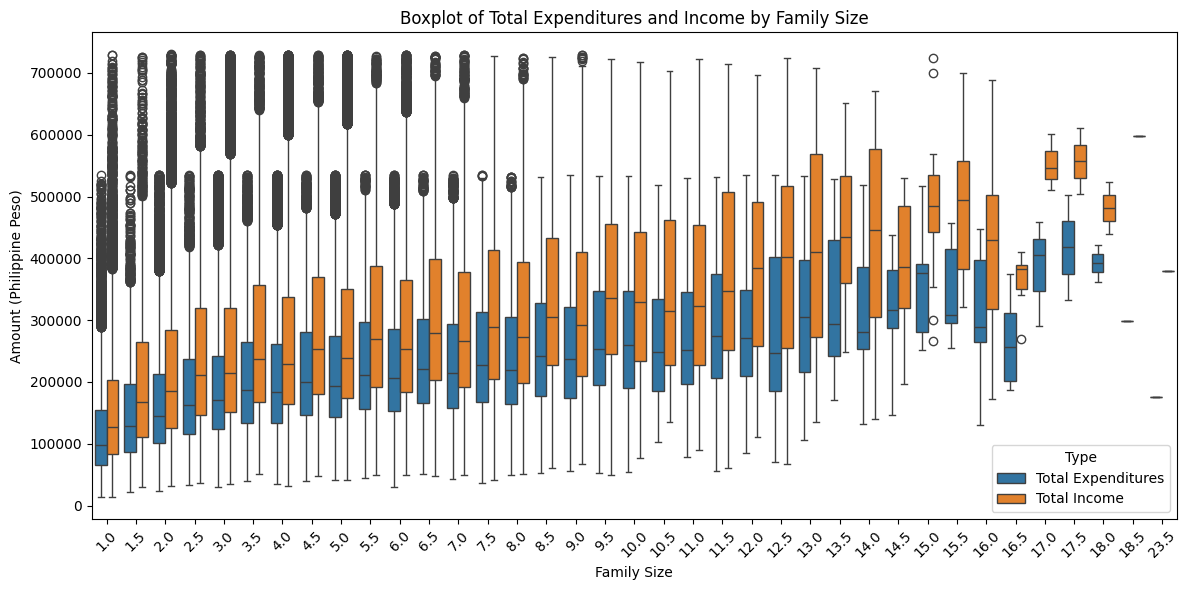

In [46]:
plot_expenditures_and_income_boxplot(cleaned_df, "Family Size")

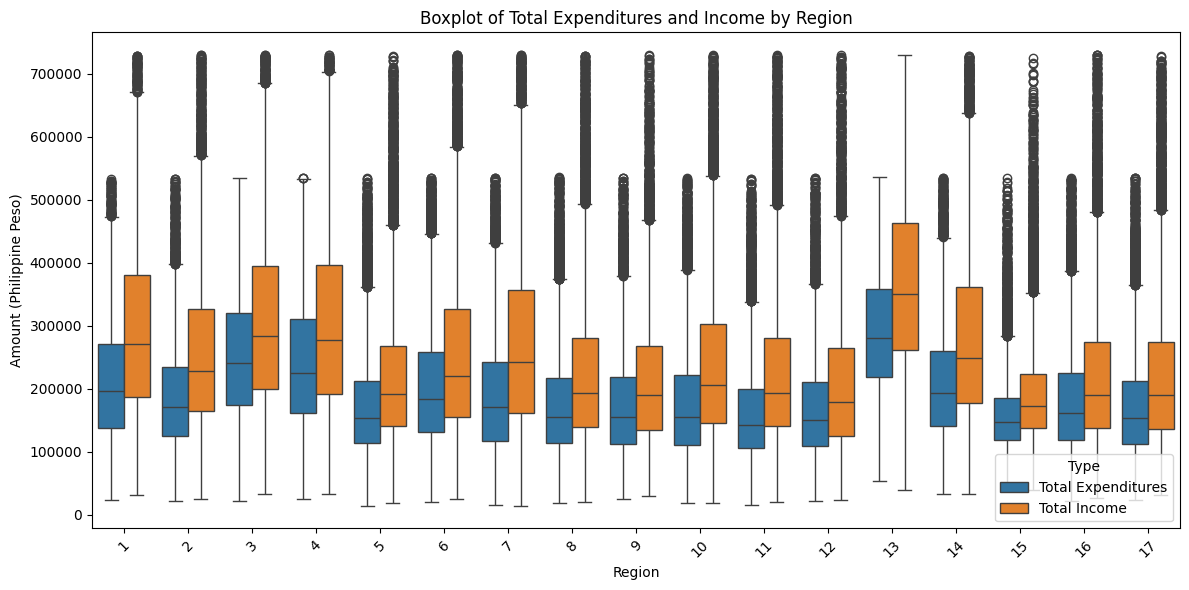

In [47]:
plot_expenditures_and_income_boxplot(cleaned_df, "Region")

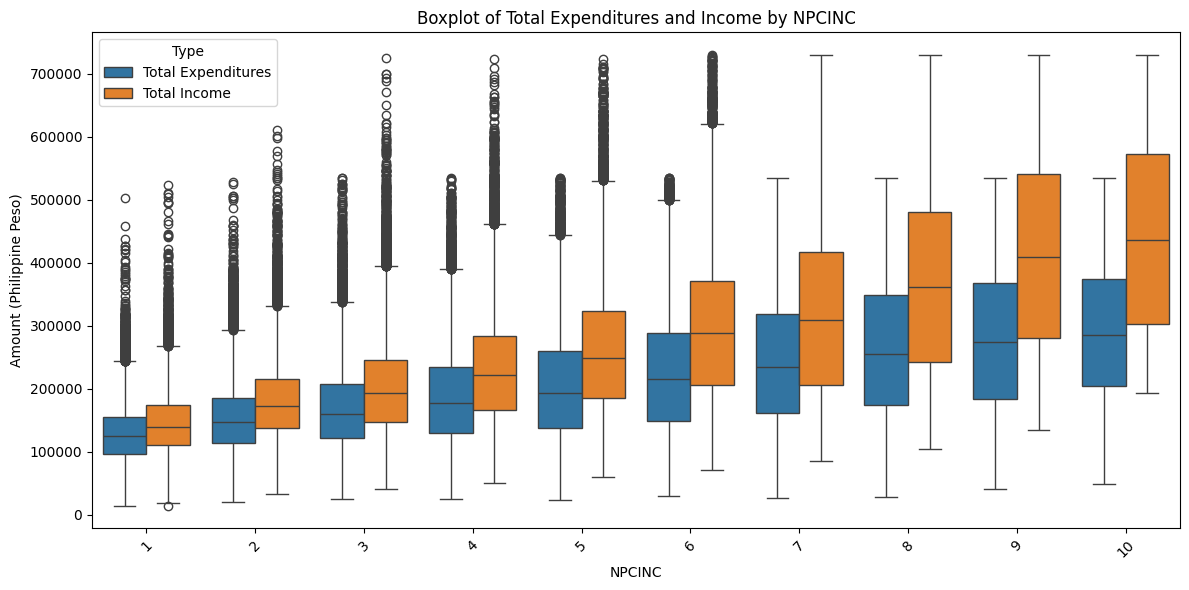

In [48]:
plot_expenditures_and_income_boxplot(cleaned_df, "NPCINC")

> As seen in the box plots above, families with lower


#### _Food-related Expenditures_


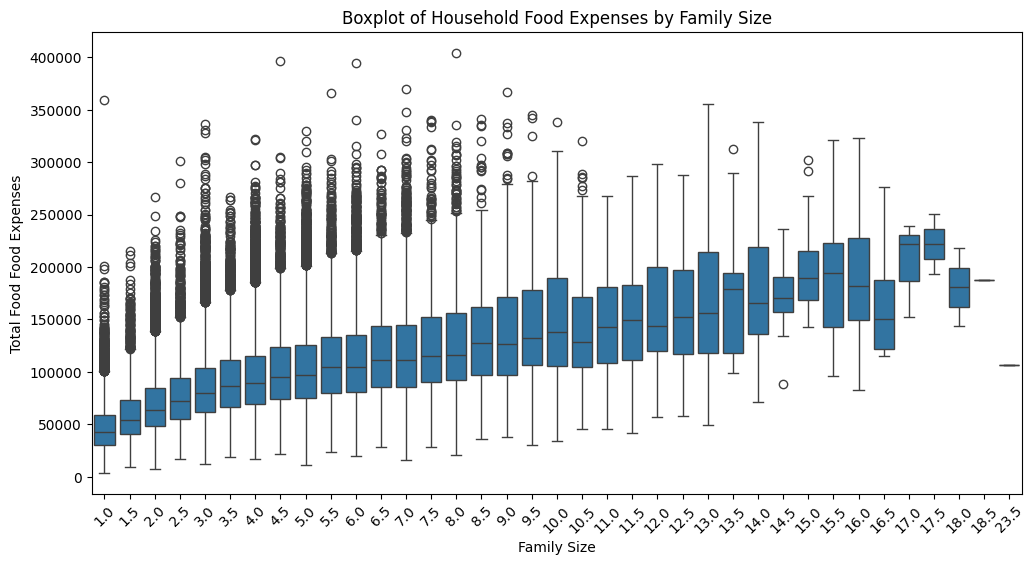

In [49]:
# Boxplot of "Total Food Consumed at Home (Total)" per "Family Size"
plt.figure(figsize=(12, 6))
sns.boxplot(x="Family Size", y="Hhld, Food", data=cleaned_df)
plt.title("Boxplot of Household Food Expenses by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Total Food Food Expenses")
plt.xticks(rotation=45)
plt.show()

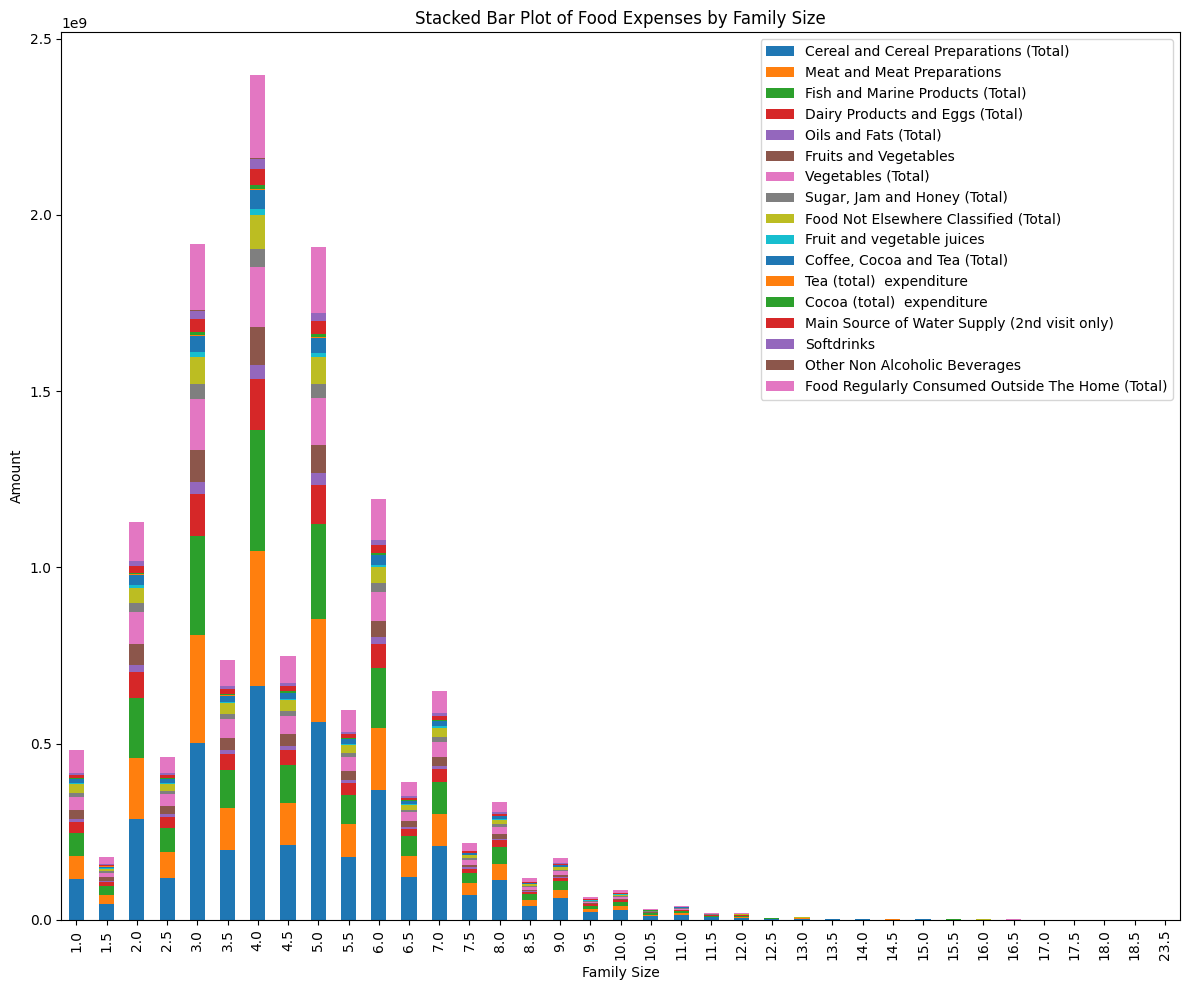

In [50]:
food_expenses = [
    "Cereal and Cereal Preparations (Total)",
    "Meat and Meat Preparations",
    "Fish and Marine Products (Total)",
    "Dairy Products and Eggs (Total)",
    "Oils and Fats (Total)",
    "Fruits and Vegetables",
    "Vegetables (Total)",
    "Sugar, Jam and Honey (Total)",
    "Food Not Elsewhere Classified (Total)",
    "Fruit and vegetable juices",
    "Coffee, Cocoa and Tea (Total)",
    "Tea (total)  expenditure",
    "Cocoa (total)  expenditure",
    "Main Source of Water Supply (2nd visit only)",
    "Softdrinks",
    "Other Non Alcoholic Beverages",
    "Food Regularly Consumed Outside The Home (Total)",
]

create_stacked_bar_plot(cleaned_df, 'Family Size', food_expenses, 'Food Expenses')

> [Explanation]


#### _Non-Food Expenditures_


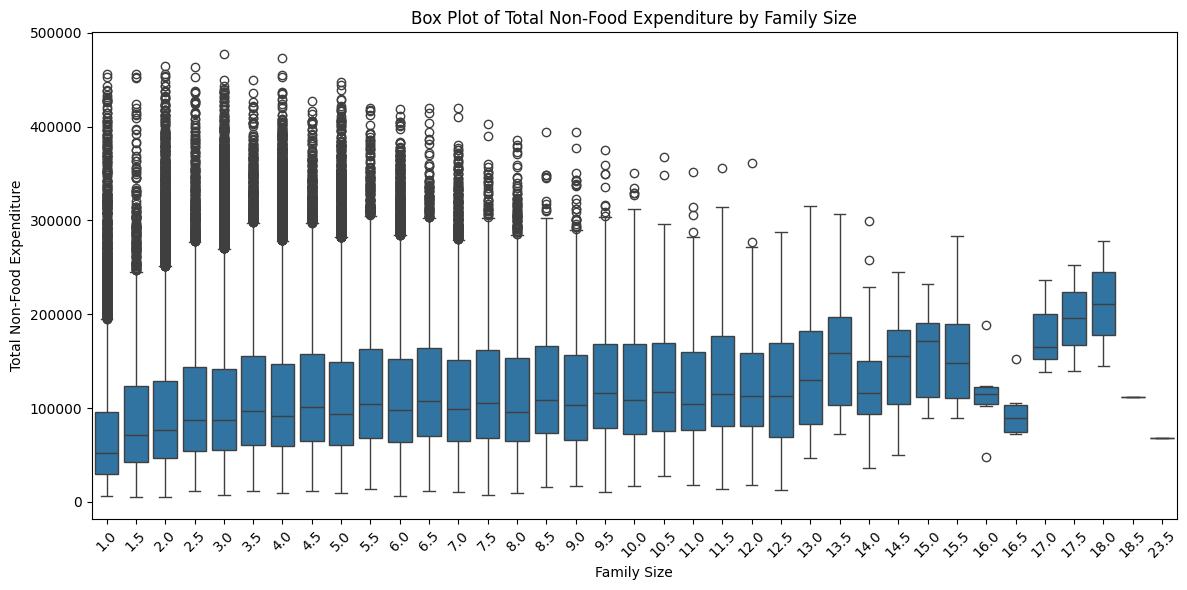

In [51]:
create_boxplot(cleaned_df, 'Family Size', 'Total Non-Food Expenditure')

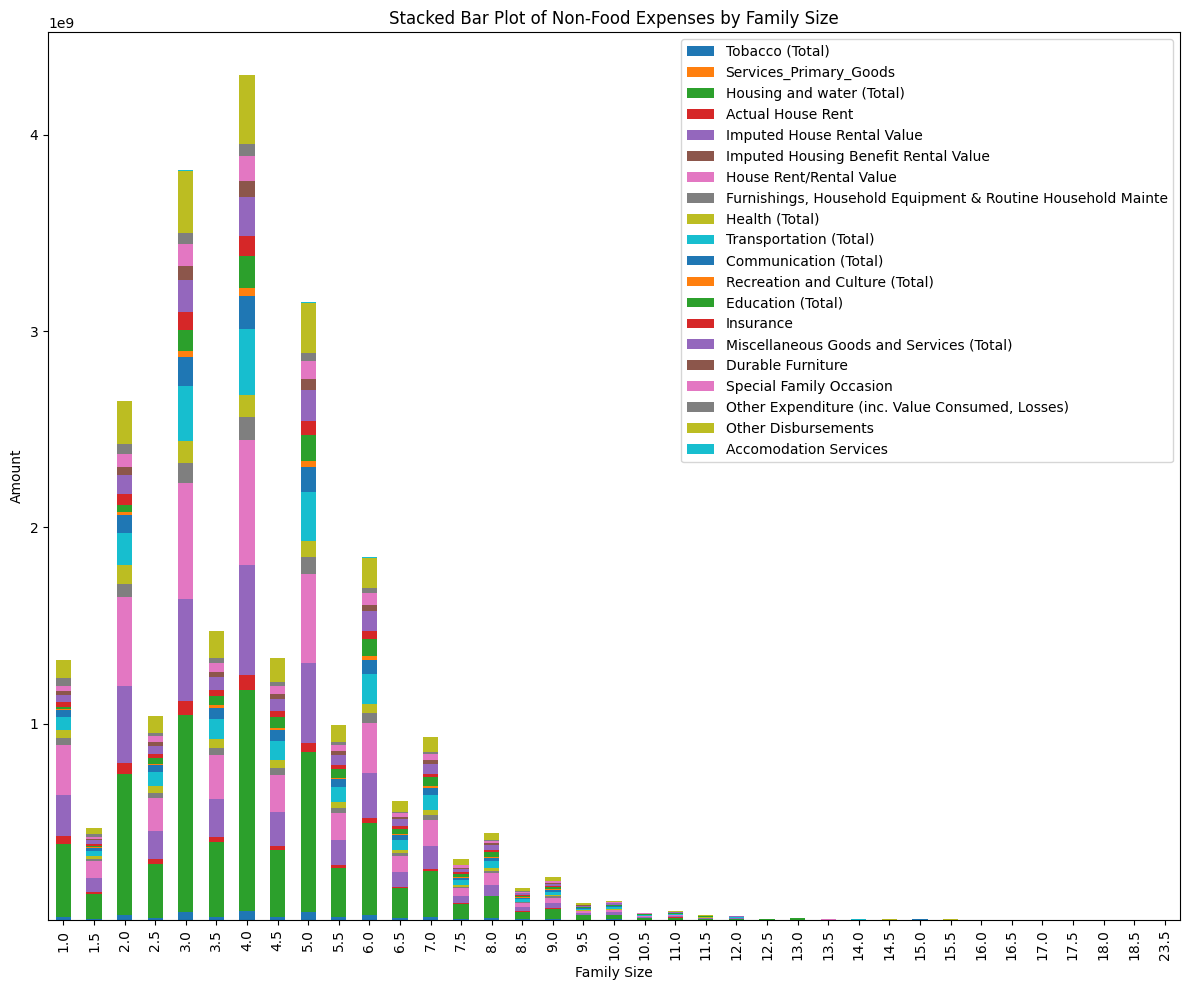

In [52]:
# Stacked Bar Plot of Non-Food Expenses by Family Size

non_food_expenses = [
    "Tobacco (Total)",
    "Services_Primary_Goods",
    "Housing and water (Total)",
    "Actual House Rent",
    "Imputed House Rental Value",
    "Imputed Housing Benefit Rental Value",
    "House Rent/Rental Value",
    "Furnishings, Household Equipment & Routine Household Mainte",
    "Health (Total)",
    "Transportation (Total)",
    "Communication (Total)",
    "Recreation and Culture (Total)",
    "Education (Total)",
    "Insurance",
    "Miscellaneous Goods and Services (Total)",
    "Durable Furniture",
    "Special Family Occasion",
    "Other Expenditure (inc. Value Consumed, Losses)",
    "Other Disbursements",
    "Accomodation Services",
]

create_stacked_bar_plot(cleaned_df, 'Family Size', non_food_expenses, 'Non-Food Expenses')

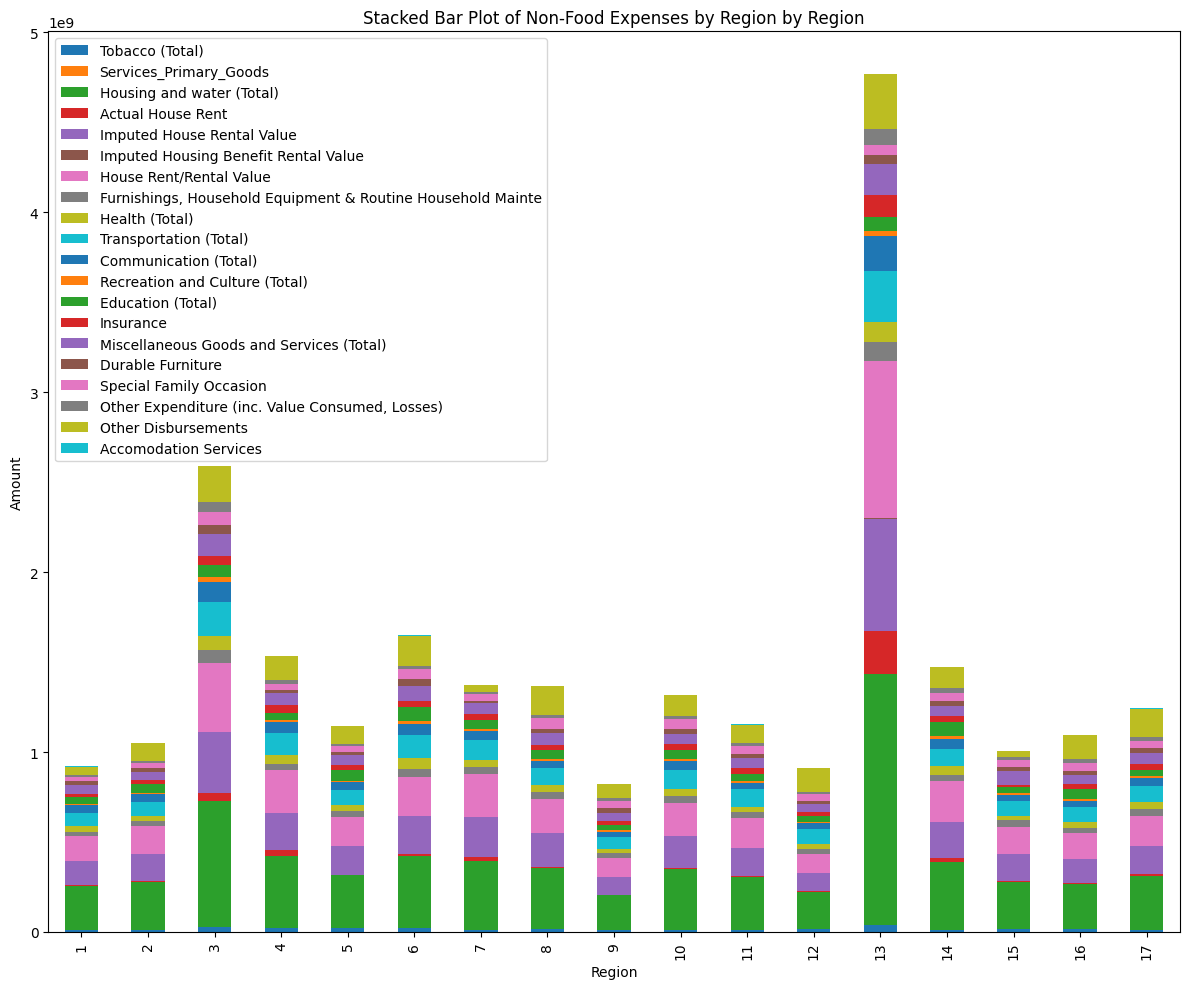

In [53]:
create_stacked_bar_plot(cleaned_df, 'Region', non_food_expenses, 'Non-Food Expenses by Region')

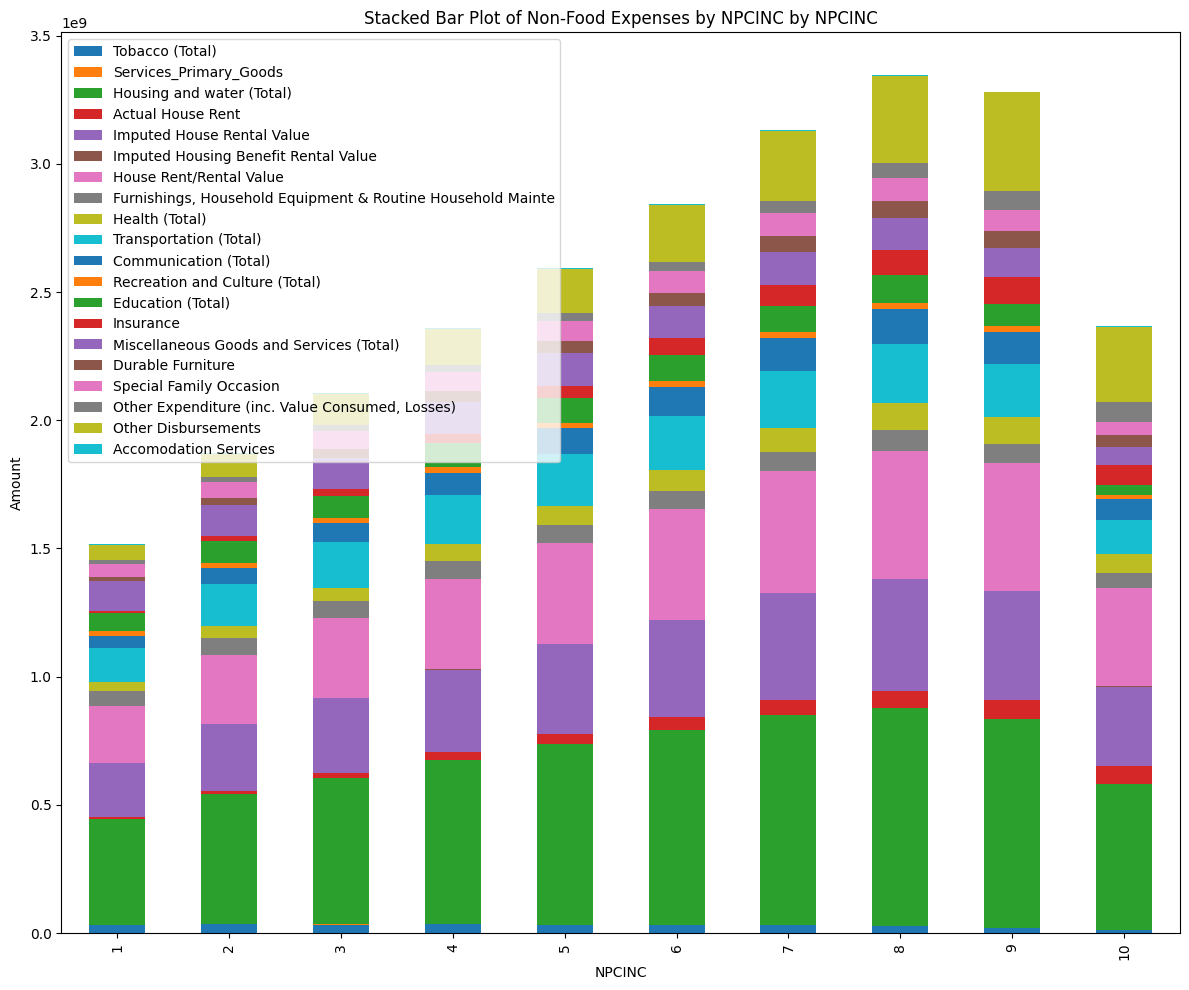

In [54]:
create_stacked_bar_plot(cleaned_df, 'NPCINC', non_food_expenses, 'Non-Food Expenses by NPCINC')

> [Explanation]


# 6. Application of Proximity (Distance Analysis)


## Check for correlation. Provide illustration.


To start off the distance analysis, we look at various correlations to see the relationship of income and expenditures to each other, and to each of their sources


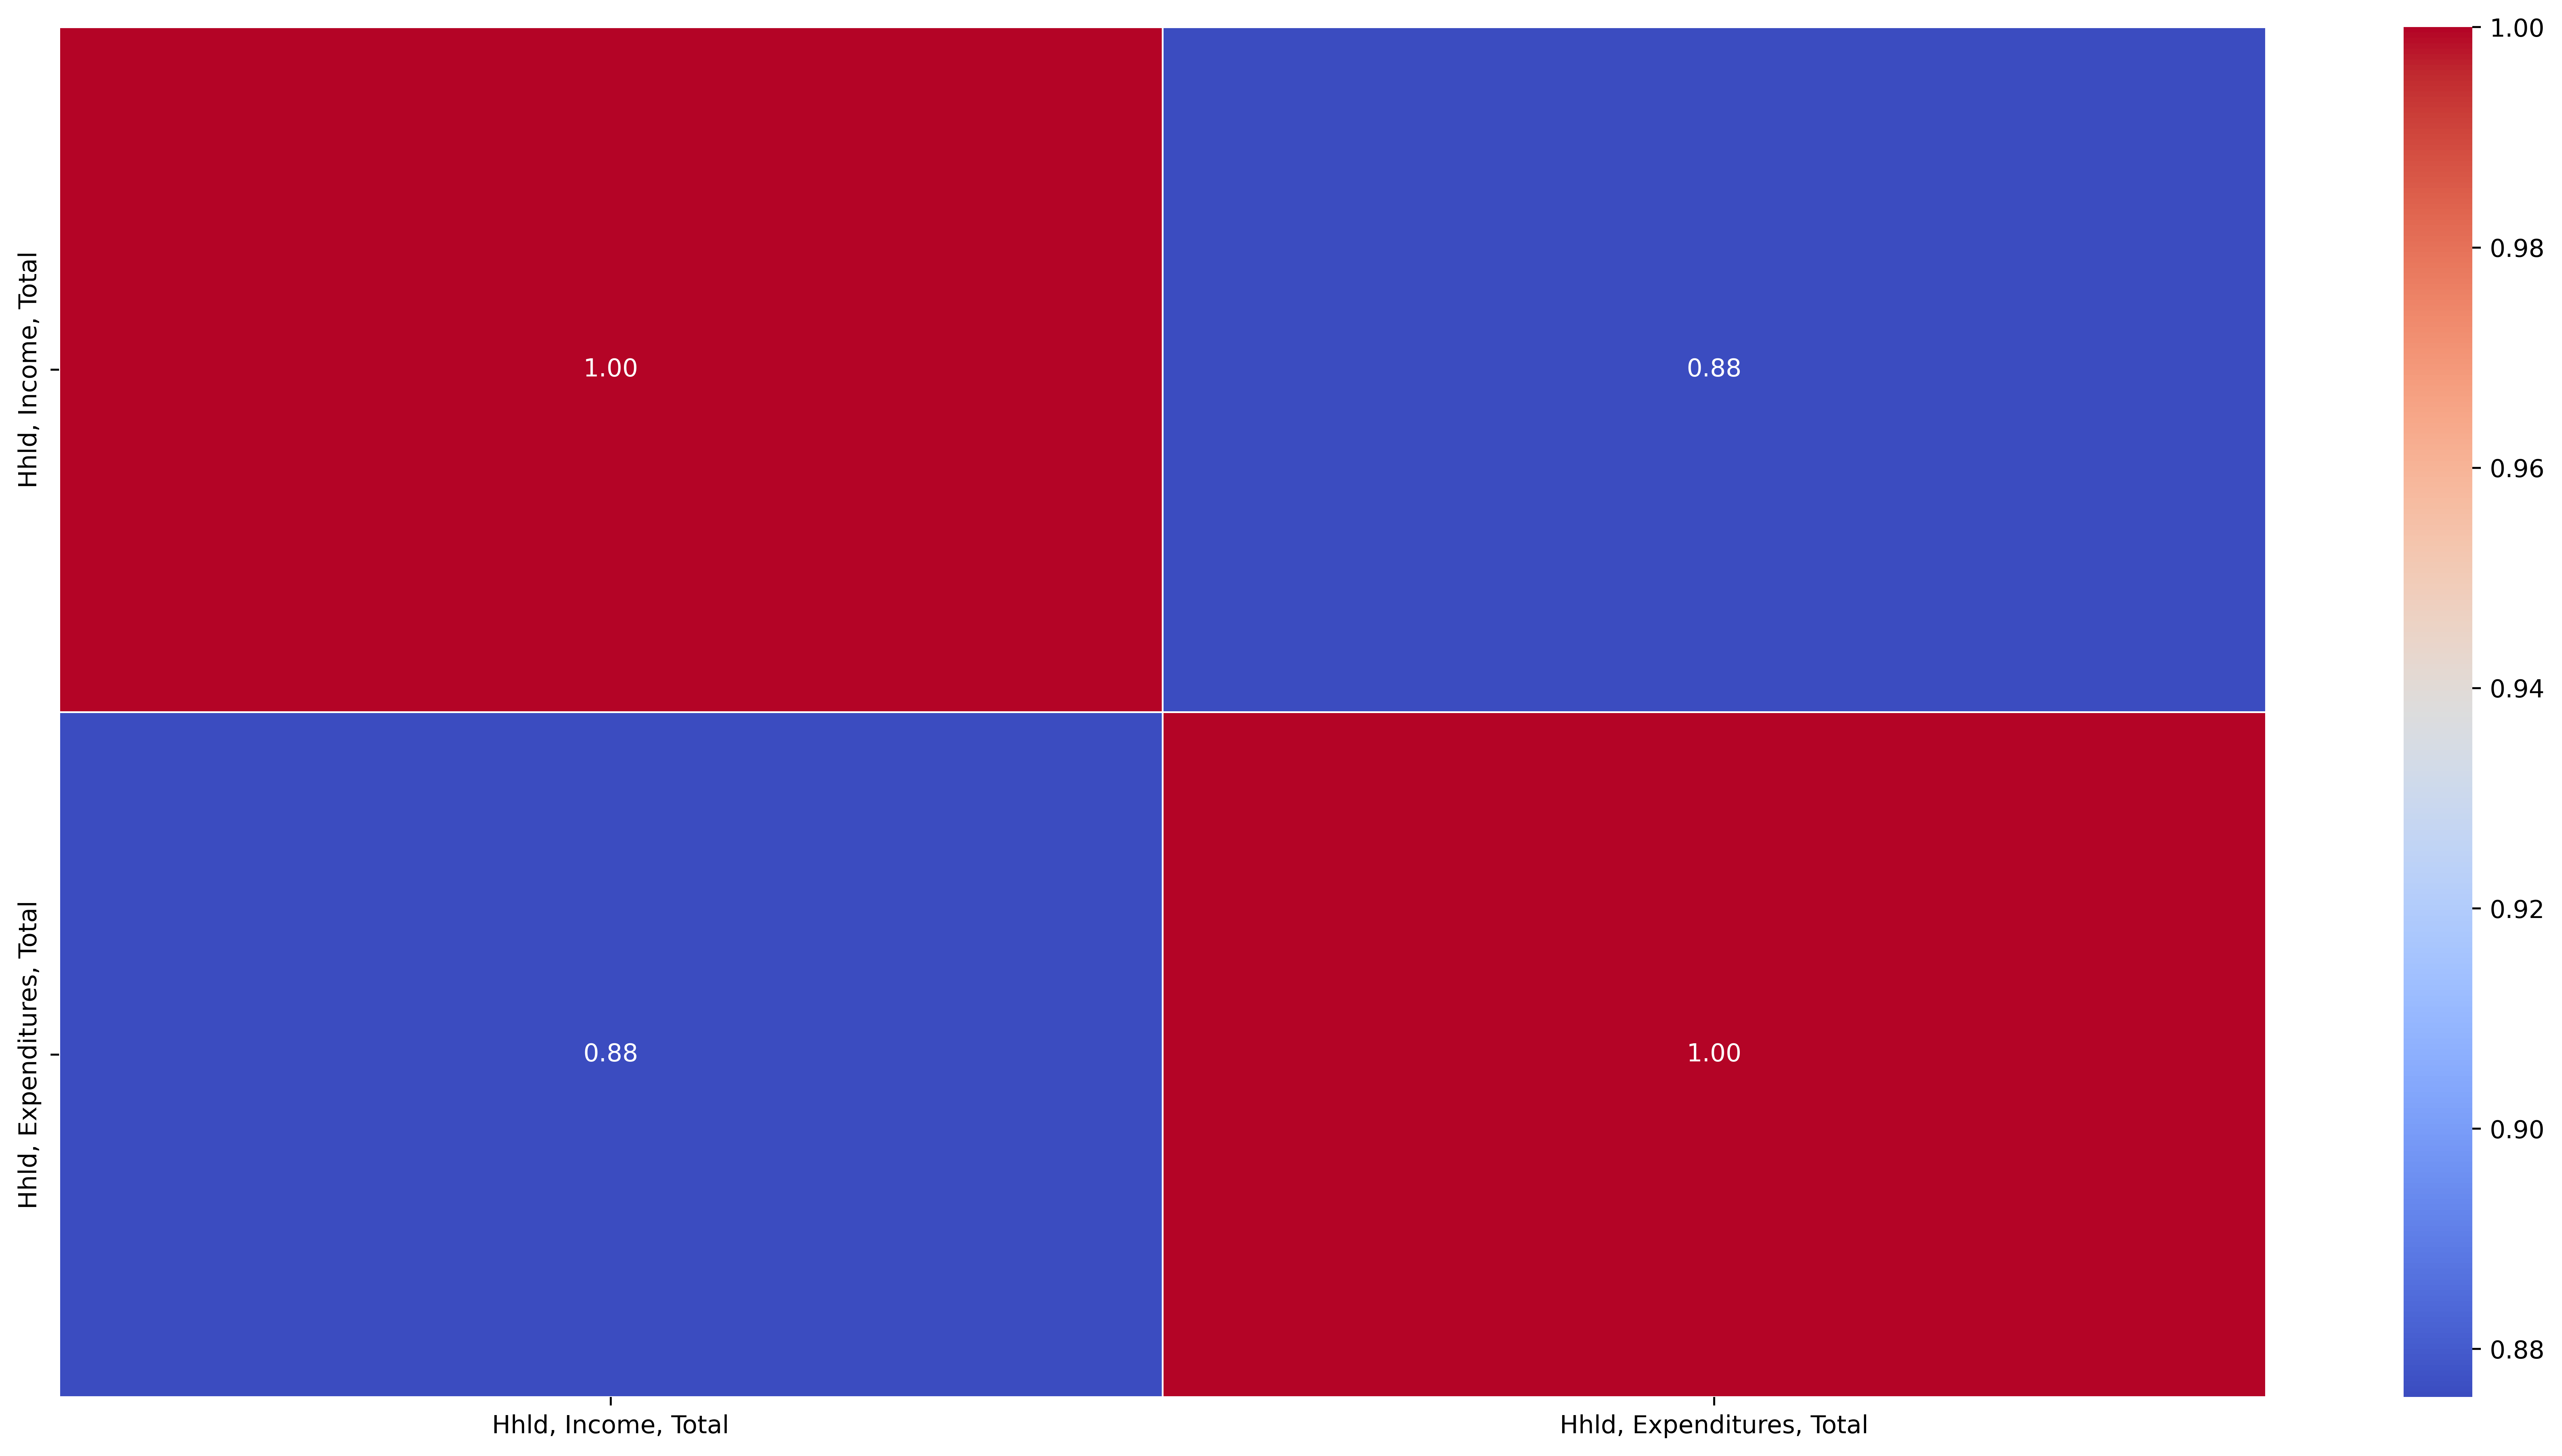

In [55]:
income_expenditure_dataframe = cleaned_df[['Hhld, Income, Total', 'Hhld, Expenditures, Total']]
income_expenditure_corr = income_expenditure_dataframe.corr(method='pearson')
plt.figure(figsize=(20,10), dpi = 500)
sns.heatmap(income_expenditure_corr,annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm')
plt.show()

The heatmap says that when income increases, expenditures slightly decreases. But overall, the two variables are highly correlated to each other, meaning that households are more likely to spend much of what they earn.

We will now correlate income and expencitures with the various sources found in the dataset.
Income will be correlated to monetary sources while expenditures will be correlated to various expenses


In [56]:
monetary_columns = [
    'Salaries/Wages from Regular Employment',
    'Salaries/Wages from Seasonal Employment',
    'Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)',
    'Cash Receipts, Support, etc. from Abroad',
    'Cash Receipts, Support, etc. from Domestic Source',
    'Rentals Received from Non-Agri Lands, etc.',
    'Pension and Retirement Benefits',
    'Dividends from Investment',
    'Other Sources of Income NEC',
    'Family Sustenance Activities',
    'Total Received as Gifts',
    'Crop Farming and Gardening',
    'Livestock and Poultry Raising',
    'Fishing',
    'Forestry and Hunting',
    'Wholesale and Retail',
    'Manufacturing',
    'Transportation, Storage Services',
    'Entrep. Activities NEC',
    'Entrep. Activities NEC.1',
    'Entrep. Activities NEC.2',
]

cost_columns = [
    'Cereal and Cereal Preparations (Total)',
    'Meat and Meat Preparations',
    'Fish and Marine Products (Total)',
    'Dairy Products and Eggs (Total)',
    'Oils and Fats (Total)',
    'Fruits and Vegetables',
    'Vegetables (Total)',
    'Sugar, Jam and Honey (Total)',
    'Food Not Elsewhere Classified (Total)',
    'Fruit and vegetable juices',
    'Coffee, Cocoa and Tea (Total)',
    'Tea (total)  expenditure',
    'Cocoa (total)  expenditure',
    'Main Source of Water Supply (2nd visit only)',
    'Softdrinks',
    'Other Non Alcoholic Beverages',
    'Alcoholic Beverages (Total)',
    'Tobacco (Total)',
    'Other Vegetables (Total)',
    'Services_Primary_Goods',
    'Alcohol Procduction Services',
    'Food Regularly Consumed Outside The Home (Total)',
    'Clothing, Footwear and Other Wear',
    'Housing and water (Total)',
    'Actual House Rent',
    'Furnishings, Household Equipment & Routine Household Mainte',
    'Health (Total)',
    'Transportation (Total)',
    'Communication (Total)',
    'Recreation and Culture (Total)',
    'Education (Total)',
    'Insurance',
    'Miscellaneous Goods and Services (Total)',
    'Durable Furniture',
    'Special Family Occasion',
    'Other Expenditure (inc. Value Consumed, Losses)',
    'Accomodation Services',
]

To have a smoother heatmap, all similar columns will be combined to a category.


In [57]:
monetary_columns.append('Household ID')
income_dataframe = cleaned_df[monetary_columns]

# Combine similar columns to reduce dimensionality
income_dataframe['Salaries/Wages'] = income_dataframe['Salaries/Wages from Regular Employment'] + income_dataframe['Salaries/Wages from Seasonal Employment']
income_dataframe['Cash Receipts'] = income_dataframe['Cash Receipts, Support, etc. from Abroad'] + income_dataframe['Cash Receipts, Support, etc. from Domestic Source']
income_dataframe['Farming'] = income_dataframe['Crop Farming and Gardening'] + income_dataframe['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
income_dataframe['Logistics and Manufacturing'] = income_dataframe['Wholesale and Retail'] + income_dataframe['Transportation, Storage Services'] + income_dataframe['Manufacturing']
income_dataframe['Entrep. Activities'] = income_dataframe['Entrep. Activities NEC'] + income_dataframe['Entrep. Activities NEC.1'] + income_dataframe['Entrep. Activities NEC.2']
income_dataframe['Passive Income'] = income_dataframe['Total Received as Gifts'] + income_dataframe['Family Sustenance Activities'] + income_dataframe['Pension and Retirement Benefits'] + income_dataframe['Dividends from Investment'] + income_dataframe['Rentals Received from Non-Agri Lands, etc.']
income_dataframe['Livestocks'] = income_dataframe['Livestock and Poultry Raising'] + income_dataframe['Fishing'] + income_dataframe['Forestry and Hunting']
income_dataframe['Other Income NEC'] = income_dataframe['Other Sources of Income NEC']

income_dataframe = income_dataframe.set_index("Household ID")
monetary_columns.pop(monetary_columns.index('Household ID'))
# Drop the original columns
income_dataframe.drop(columns=monetary_columns, inplace=True)

/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_25092/2766975124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_dataframe['Salaries/Wages'] = income_dataframe['Salaries/Wages from Regular Employment'] + income_dataframe['Salaries/Wages from Seasonal Employment']
/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_25092/2766975124.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_dataframe['Cash Receipts'] = income_dataframe['Cash Receipts, Support, etc. from Abroad'] +

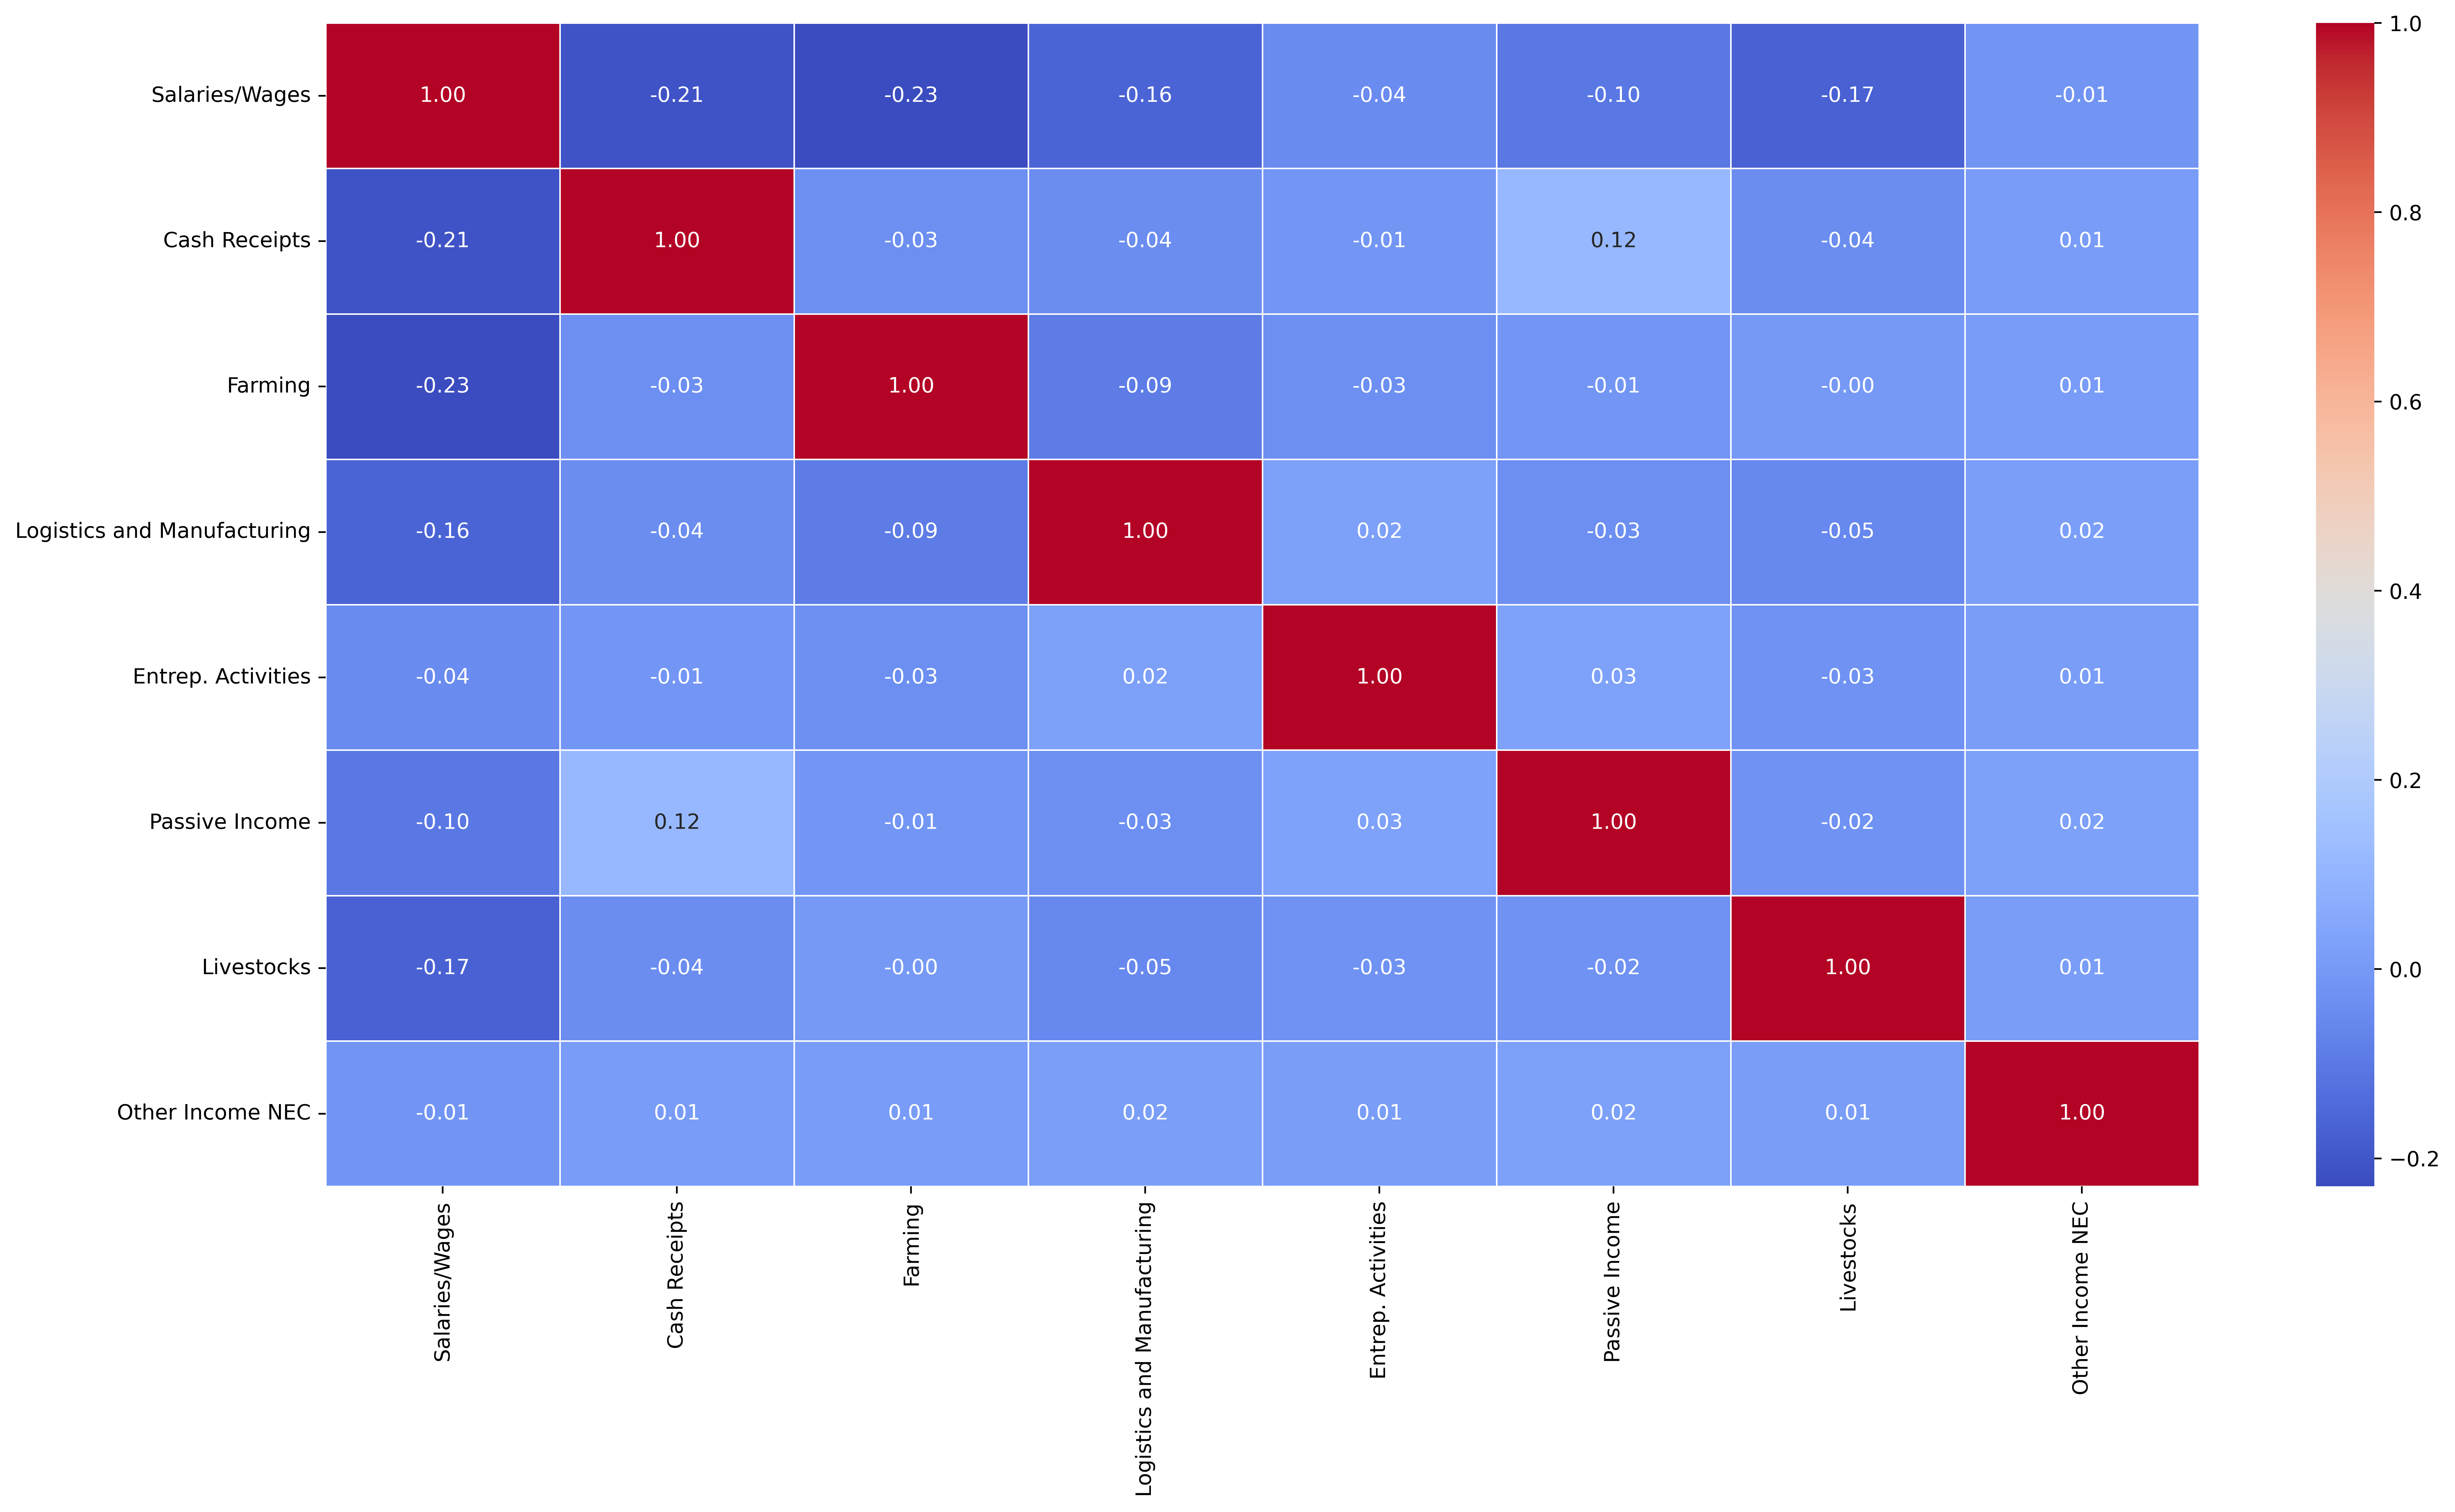

In [58]:
income_corr = income_dataframe.corr(method='pearson')
plt.figure(figsize=(20,10), dpi = 500)
sns.heatmap(income_corr,annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm')
plt.show()

As seen from the heatmap above, all monetary sources have weak correlations, this means that monetary sources are independent with little to no dependence. The negative correlations also suggests that some monetary streams are acting as substitutes to other monetary sources. If observed closely, it can be seen that cash receipts and passive income had the highest correlation of 0.12. This may mean that some individuals who's monetary sources are passive incomes, are also receiving cash receipts or monetary support.


In [59]:
cost_columns.append('Household ID')
expenditure_dataframe = cleaned_df[cost_columns]

expenditure_dataframe['Processed Foods'] = expenditure_dataframe['Cereal and Cereal Preparations (Total)'] + expenditure_dataframe['Sugar, Jam and Honey (Total)'] + expenditure_dataframe['Softdrinks'] + expenditure_dataframe['Oils and Fats (Total)']
expenditure_dataframe['Non-Processed Foods'] = expenditure_dataframe['Meat and Meat Preparations'] + expenditure_dataframe['Fish and Marine Products (Total)'] + expenditure_dataframe['Dairy Products and Eggs (Total)']
expenditure_dataframe['Other Foods'] = expenditure_dataframe['Food Not Elsewhere Classified (Total)'] + expenditure_dataframe['Food Regularly Consumed Outside The Home (Total)']
expenditure_dataframe['Fruits and Vegetables and Juices'] = expenditure_dataframe['Fruits and Vegetables'] + expenditure_dataframe['Vegetables (Total)'] + expenditure_dataframe['Fruit and vegetable juices'] + expenditure_dataframe['Other Vegetables (Total)']
expenditure_dataframe['Non-Alcoholic Beverages'] = expenditure_dataframe['Coffee, Cocoa and Tea (Total)'] + expenditure_dataframe['Tea (total)  expenditure'] + expenditure_dataframe['Cocoa (total)  expenditure'] + expenditure_dataframe['Other Non Alcoholic Beverages']
expenditure_dataframe['Non-Essential Expenditures'] = expenditure_dataframe['Alcoholic Beverages (Total)'] + expenditure_dataframe['Tobacco (Total)'] 
expenditure_dataframe['Services and Primary Goods'] = expenditure_dataframe['Services_Primary_Goods'] + expenditure_dataframe['Main Source of Water Supply (2nd visit only)'] + expenditure_dataframe['Accomodation Services'] + expenditure_dataframe['Alcohol Procduction Services']
expenditure_dataframe['Miscellaneous Expenditures'] = expenditure_dataframe['Miscellaneous Goods and Services (Total)'] + expenditure_dataframe['Durable Furniture'] + expenditure_dataframe['Special Family Occasion']
expenditure_dataframe['Non-Food Essential Expenditures'] = expenditure_dataframe['Clothing, Footwear and Other Wear'] + expenditure_dataframe['Housing and water (Total)'] + expenditure_dataframe['Actual House Rent'] + expenditure_dataframe['Furnishings, Household Equipment & Routine Household Mainte'] + expenditure_dataframe['Health (Total)']+ expenditure_dataframe['Transportation (Total)'] + expenditure_dataframe['Communication (Total)'] + expenditure_dataframe['Recreation and Culture (Total)'] + expenditure_dataframe['Education (Total)'] + expenditure_dataframe['Insurance']
expenditure_dataframe['Other Expenditure NEC'] = expenditure_dataframe['Other Expenditure (inc. Value Consumed, Losses)']

expenditure_dataframe = expenditure_dataframe.set_index("Household ID")
cost_columns.pop(cost_columns.index('Household ID'))
expenditure_dataframe.drop(columns=cost_columns, inplace=True)

/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_25092/123155797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditure_dataframe['Processed Foods'] = expenditure_dataframe['Cereal and Cereal Preparations (Total)'] + expenditure_dataframe['Sugar, Jam and Honey (Total)'] + expenditure_dataframe['Softdrinks'] + expenditure_dataframe['Oils and Fats (Total)']
/var/folders/mp/c7pgmq8j0472f05vnx5h16000000gn/T/ipykernel_25092/123155797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expendit

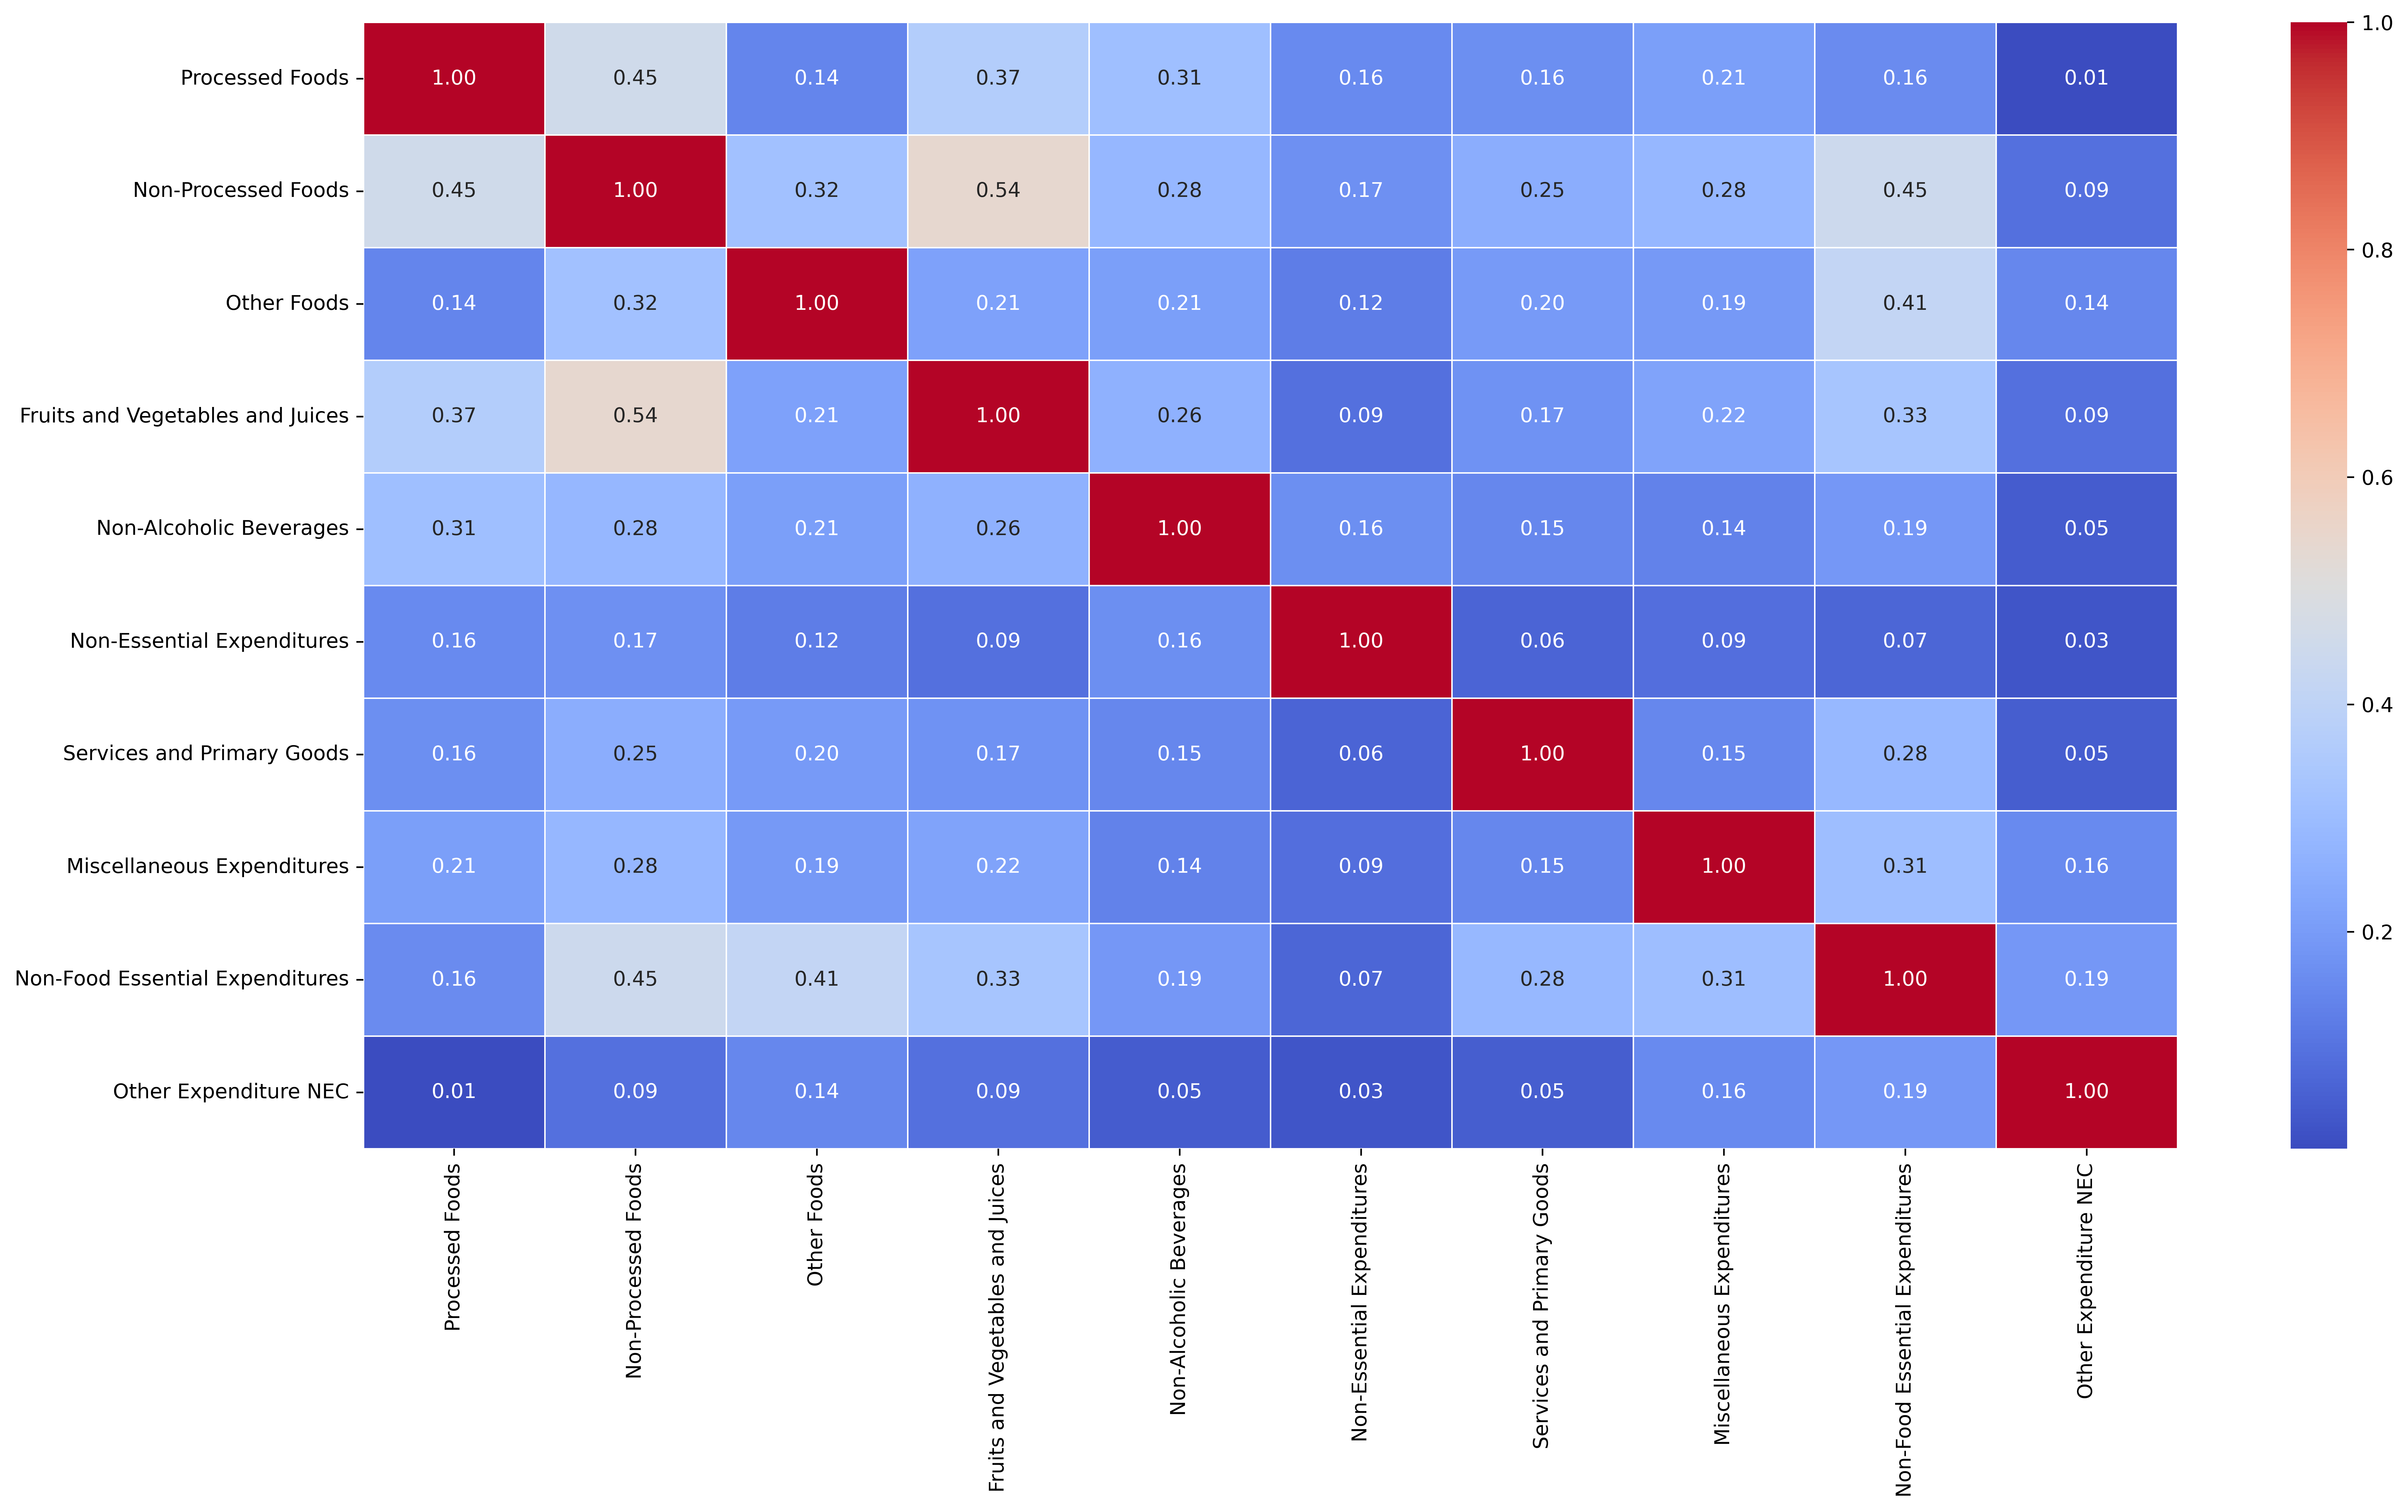

In [60]:
expenditure_corr = expenditure_dataframe.corr(method='pearson')
plt.figure(figsize=(20,10), dpi = 500)
sns.heatmap(expenditure_corr,annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm')
plt.show()

In this heatmap, it is observed that Non-Processed Food had the highest correlation of 0.54. This suggests that households that prioritizes non-processed foods also tends to buy more fruits, vegetables, and juices. This could mean that these households has a preference for fresh food options. It is also observed that households that have significant Non-Food Essential Expenditures have high correlations with Non-Processed, Fruits and Vegetables and Juices, and Other Foods compared with Processed Foods. This means that these households prioritizes fresh food options. It is also observed that Non-Essential Expenditures had low correlation with essential catgories like food, this suuggests that housesholds that spend on non-essential expenditures are doing so out of discretionary income rather than necessity.


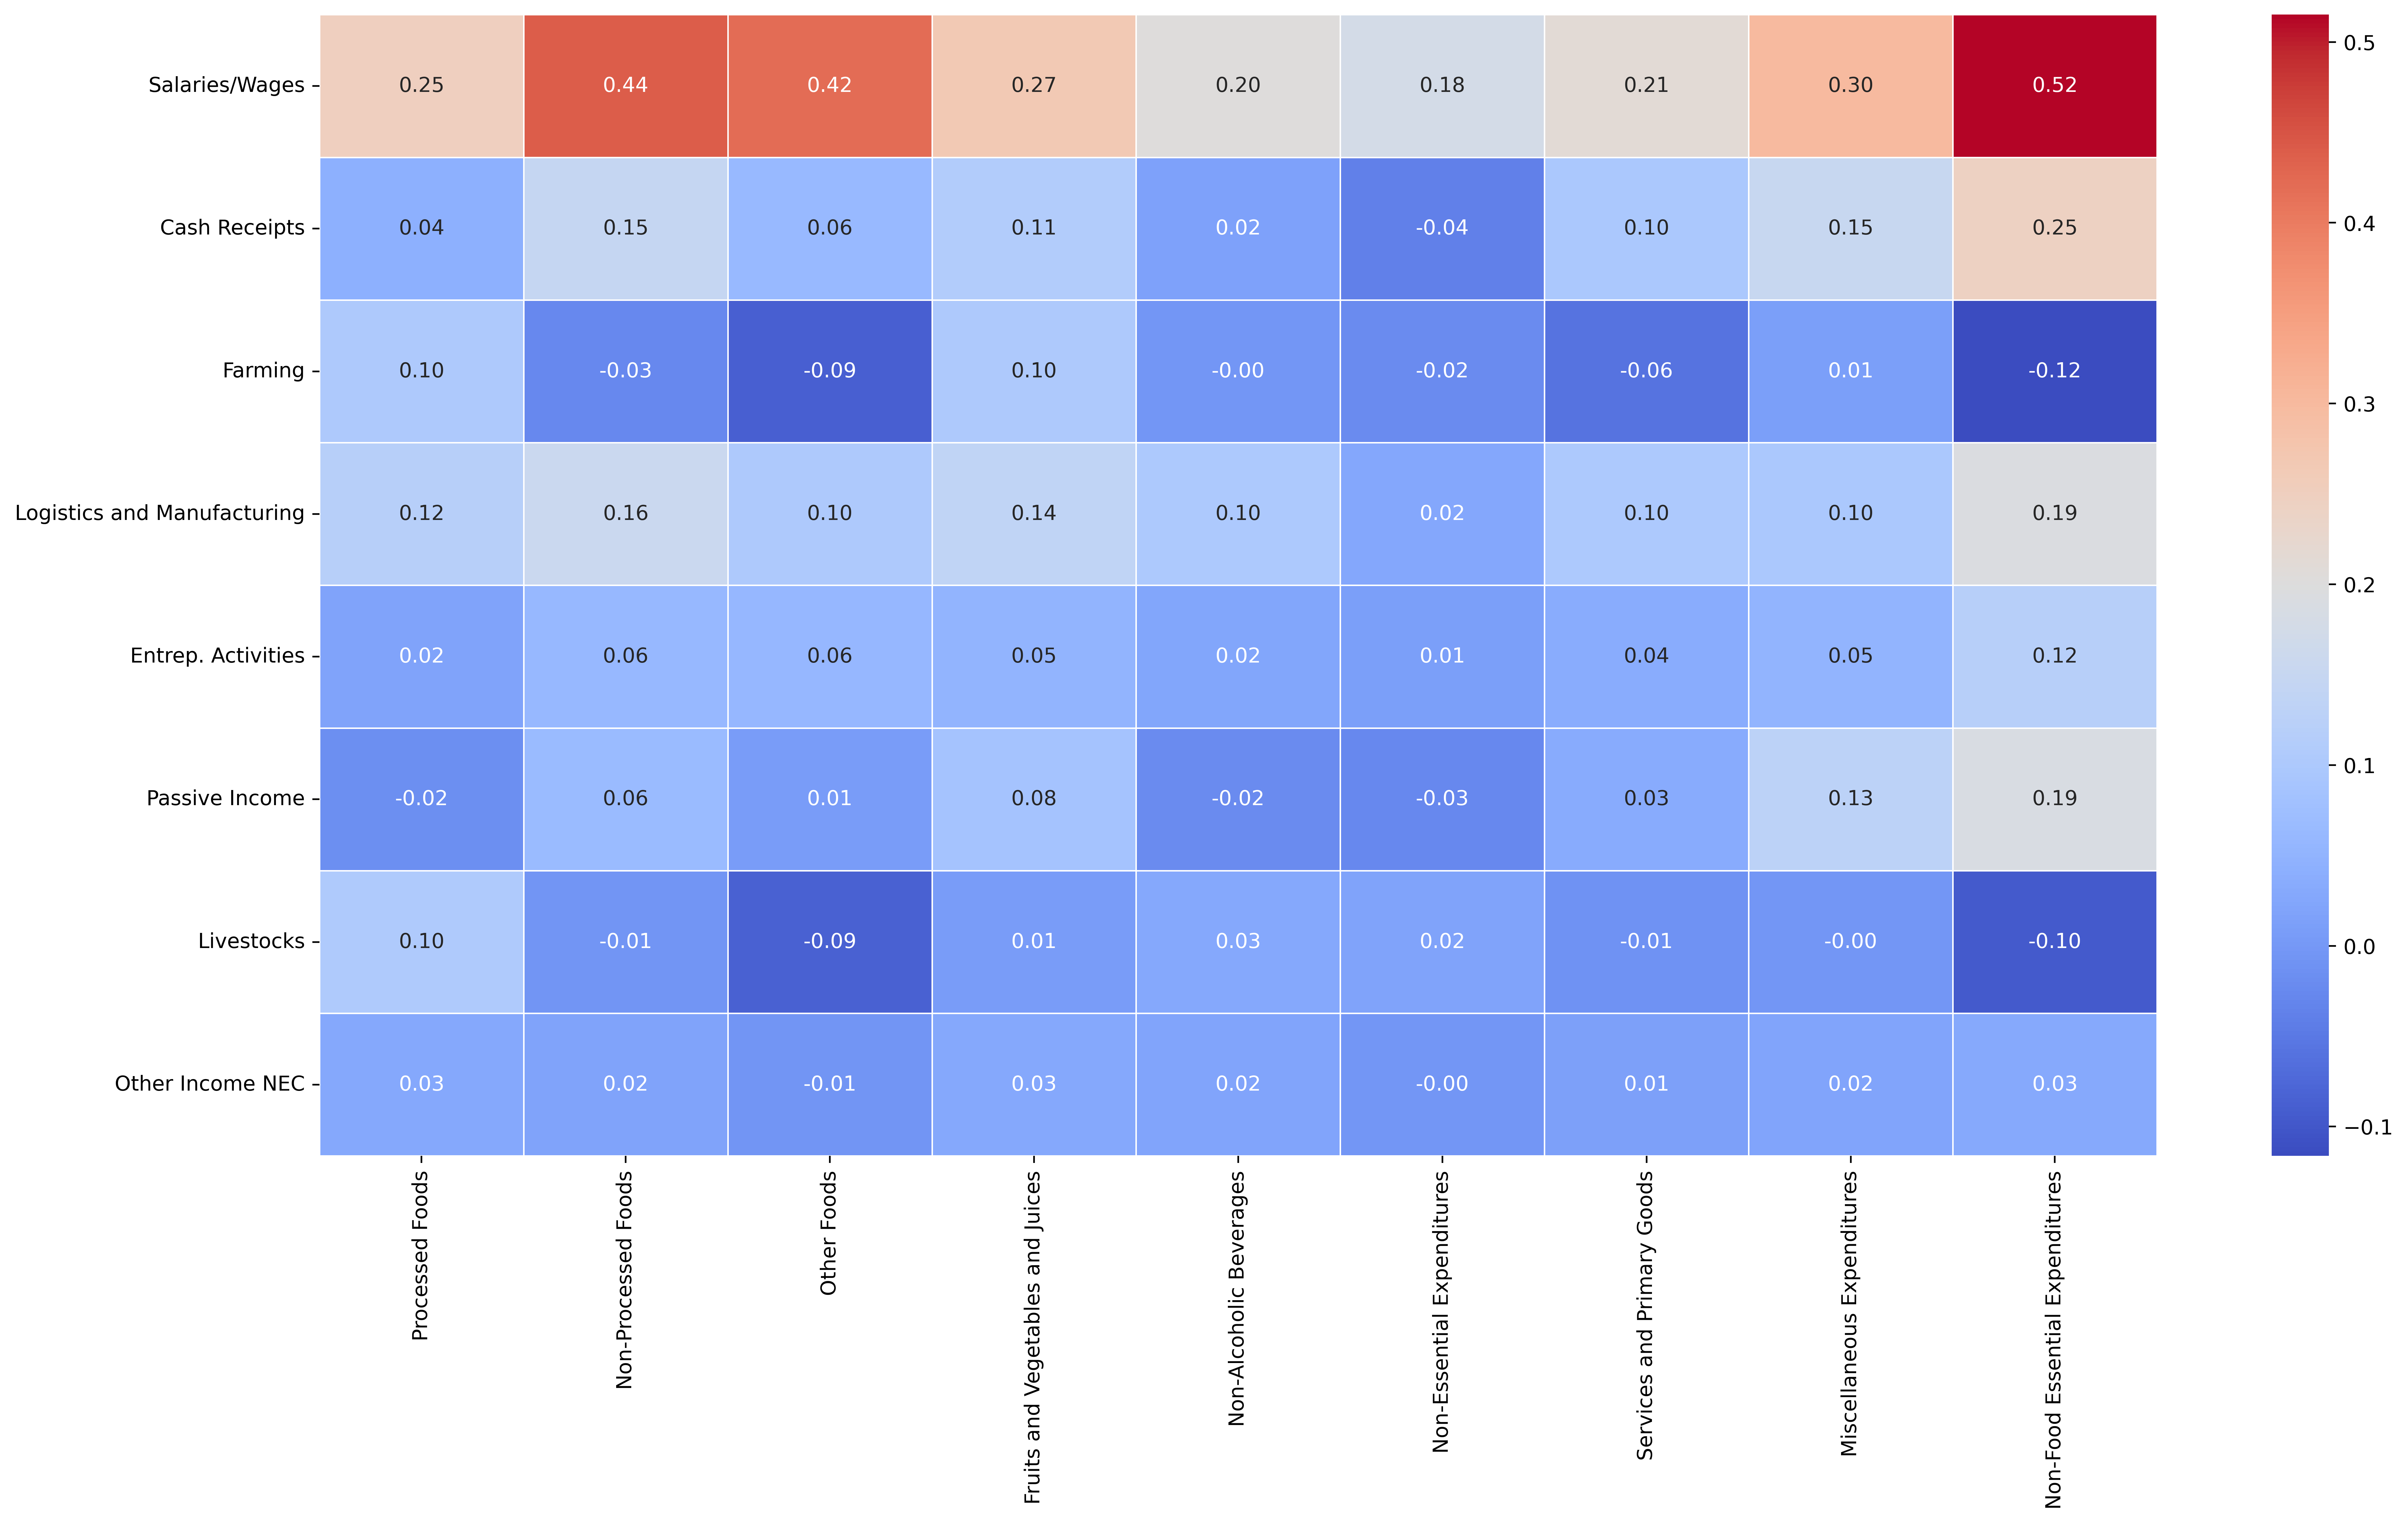

In [61]:
income_expenditure_df = income_dataframe.join(expenditure_dataframe, how="inner")

correlation_matrix = income_expenditure_df.corr()
correlation_subset = correlation_matrix.iloc[0:8, 8:17]

plt.figure(figsize=(20, 10), dpi=500)
sns.heatmap(correlation_subset, annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm')
plt.show()

In this heatmap correlating the monetary sources with expenditures, we can gain 3 major insights:

1. Salaries/Wages are the primary determining factor in terms of expenditure
   - Households' that have salary/wages as their main source of income are more likely to spend on a variety of expenditures (services, food, essential goods, and non-essential goods) likely because they have more disposable income to diversify their spending and because wages are easily accountable, they can support both their basic needs and discretionary spending.
   - These households are also the highest spender on Miscellaneous and Non-Essential expenditures compared to other income sources. This is likely because they have a stable source of income thus allowing more leeway in term of their spending.
2. Farming and Livestock monetary sources are self sufficient
   - Hoesedolds' that earns their keep from farming and livestock have weak correlation with most of the expenditure categories likely because they consume what they produce, thus reducing their need to purchase foods. Another reason is that their source of income are seasonal and unpredictable, thus requiring them to be cautios on their spending.
   - Despite their low spending, they have negative correlation with Non-Food Essential Expenditures likely becuase of abused selling price of their priducts.
3. Logistics, Manufacturing, Entrep. Activities, and Passive Income earners spend invests their money
   - Households' with these sources of income tend to spend more on Non-Food Essential Expenditures, likely because the money they earn goes straight to their businesses to generate more income.


## Calculate a distance matrix (e.g., Euclidean distance) for numeric data as required. Provide illustration


For the computation of the distance matrix, Euclidean distance will be used to cluster households based on their income-expenditure ratio. Household Numbers provided in the dataset will be the main index of the distance matrix


In [62]:
distance_dataframe = cleaned_df.copy()
household_incomes = distance_dataframe['Hhld, Income, Total'].values
household_expenditures = distance_dataframe['Hhld, Expenditures, Total'].values
household_ids = distance_dataframe['Household ID'].values
household_df = pd.DataFrame({'Total Income': household_incomes, 'Total Expenditures': household_expenditures}, index=household_ids)
household_df.index = household_df.index.map(lambda x: f"Household No. {x}")
household_df

Total Income  Total Expenditures
Household No. 1           607070.0            228942.0
Household No. 2           411980.0            363077.0
Household No. 4           258538.0            180438.0
Household No. 5           550724.0            390438.0
Household No. 6           353470.0            307517.0
...                            ...                 ...
Household No. 163264      115984.0            110331.0
Household No. 163265      249720.0            229923.0
Household No. 163266      172950.0            128843.0
Household No. 163267      135640.0            133737.0
Household No. 163268      138490.0            139117.0

[149622 rows x 2 columns]

Since the dataset has about 149,622 entries even without the outliers, it is essential to reduce these entries so as to preserve computational power. The challenege now lies in finding a way to reduce rows but still keeping a good representation of the data. One such way researched is the <b>Freedman-Diaconis Rule</b> of getting the optimal number of bins to group the dataset into.

The <b>Freedman-Diaconis Rule</b> is a method of determining the number of bins in a histogram. It is based on the interquartile range of the data. It was devised from the Scott's Rule, obtained by asymptotically minimizing the integral mean square error of the density estimate with respect to a Gaussian reference (Markov, 2022).

The <b>Freedman-Diaconis Rule</b> will be implemented by finding the optimal number of bins to group the dataset into by income and expenditure. A Strata will be created by the combining the bins of income and expenditure into a string, by which a Stratified Sampling will be implemented to gain equal representation of the data. Stratas that areless than two will be dropped.

Sources

1. <https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde>


In [63]:
num_rows = household_df.shape[0]

income_iqr = household_df['Total Income'].quantile(0.75) - household_df['Total Income'].quantile(0.25)
expenditure_iqr = household_df['Total Expenditures'].quantile(0.75) - household_df['Total Expenditures'].quantile(0.25)

# Implement Freedman-Diaconis Rule
bin_width_income = 2 * income_iqr / (num_rows ** (1/3))
bin_width_expenditure = 2 * expenditure_iqr / (num_rows ** (1/3))

income_bins = int((household_df['Total Income'].max() - household_df['Total Income'].min()) / bin_width_income)
expenditure_bins = int((household_df['Total Expenditures'].max() - household_df['Total Expenditures'].min()) / bin_width_expenditure)

print(f"Income number of bins: {income_bins}")
print(f"Expenditure number of bins: {expenditure_bins}")

Income number of bins: 104
Expenditure number of bins: 104


In [64]:
household_df['Income Bin'] = pd.qcut(household_df['Total Income'], q=income_bins, labels=False, duplicates='drop')
household_df['Expenditure Bin'] = pd.qcut(household_df['Total Expenditures'], q=expenditure_bins, labels=False, duplicates='drop')

household_df['Strata'] = household_df['Income Bin'].astype(str) + '-' + household_df['Expenditure Bin'].astype(str)
print(household_df['Strata'].value_counts())

Strata
0-0      942
1-1      418
1-2      415
0-1      368
2-3      295
        ... 
29-91      1
29-1       1
6-27       1
5-61       1
25-82      1
Name: count, Length: 7486, dtype: int64


In [65]:
print("Shape of the data before removing rare strata:", household_df.shape)
strata_counts = household_df['Strata'].value_counts()
rare_strata = strata_counts[strata_counts < 2].index
# Drop the rare strata
household_df = household_df[~household_df['Strata'].isin(rare_strata)]

print("Shape of the data after removing rare strata:", household_df.shape)

Shape of the data before removing rare strata: (149622, 5)
Shape of the data after removing rare strata: (148691, 5)


We will now implement <b>Stratified Sampling</b> to get 5% of the data which will account for 7,434 rows for a balance of good representation of the data and a save in computational power


In [66]:
from sklearn.model_selection import train_test_split

sampled_df, _ = train_test_split(household_df, test_size=0.95, random_state=42, stratify=household_df['Strata']) # Get 5% of the data

sampled_df.drop(columns=['Income Bin', 'Expenditure Bin', 'Strata'], inplace=True)
print('Shape of sampled data:', sampled_df.shape)

Shape of sampled data: (7434, 2)


Since Euclidean Distance is sensitive to the scale of the data, we will normalize the data using Standard Scaling.


In [67]:
from sklearn.preprocessing import StandardScaler
# Scale the data for Euclidean distance
scaled_data = StandardScaler().fit_transform(sampled_df)
scaled_data_df = pd.DataFrame(scaled_data, columns=sampled_df.columns, index=sampled_df.index)
scaled_data_df

Total Income  Total Expenditures
Household No. 145971     -0.751547           -0.367480
Household No. 11502      -0.005444            0.047002
Household No. 65458      -0.694635           -0.751860
Household No. 55913       0.556518            0.487884
Household No. 70977       1.313828            1.113328
...                            ...                 ...
Household No. 145192     -0.238270            0.237987
Household No. 102234     -0.541970           -0.629631
Household No. 114521     -0.737635           -0.726534
Household No. 104067     -1.408875           -1.522212
Household No. 120004     -0.634709           -0.764485

[7434 rows x 2 columns]

Scipy will be used to calculate the Euclidean Distance and obtain the distance matrix


In [68]:
from scipy.spatial import distance_matrix

euclidean_distances = pd.DataFrame(distance_matrix(scaled_data, scaled_data), index=sampled_df.index, columns=sampled_df.index)
euclidean_distances

Household No. 145971  Household No. 11502  \
Household No. 145971              0.000000             0.853502   
Household No. 11502               0.853502             0.000000   
Household No. 65458               0.388571             1.055067   
Household No. 55913               1.562908             0.714267   
Household No. 70977               2.541371             1.696329   
...                                    ...                  ...   
Household No. 145192              0.793752             0.301137   
Household No. 102234              0.335628             0.863535   
Household No. 114521              0.359324             1.065111   
Household No. 104067              1.328717             2.105244   
Household No. 120004              0.413842             1.026882   

                      Household No. 65458  Household No. 55913  \
Household No. 145971             0.388571             1.562908   
Household No. 11502              1.055067             0.714267   
Household No. 65458              0.000000             1.761349   
Household No. 55913              1.761349             0.000000   
Household No. 70977              2.740959             0.982191   
...                                   ...                  ...   
Household No. 145192             1.089985             0.833149   
Household No. 102234             0.195567             1.567008   
Household No. 114521             0.049904             1.774723   
Household No. 104067             1.050515             2.811273   
Household No. 120004             0.061242             1.728424   

                      Household No. 70977  Household No. 31301  \
Household No. 145971             2.541371             1.869764   
Household No. 11502              1.696329             1.092302   
Household No. 65458              2.740959             2.135151   
Household No. 55913              0.982191             0.520092   
Household No. 70977              0.000000             0.804303   
...                                   ...                  ...   
Household No. 145192             1.781918             1.077240   
Household No. 102234             2.545957             1.948702   
Household No. 114521             2.755648             2.139269   
Household No. 104067             3.789352             3.178331   
Household No. 120004             2.706101             2.112307   

                      Household No. 91928  Household No. 42540  \
Household No. 145971             0.442080             0.637767   
Household No. 11502              0.670152             1.432161   
Household No. 65458              0.415544             0.400070   
Household No. 55913              1.359504             2.144709   
Household No. 70977              2.334502             3.126563   
...                                   ...                  ...   
Household No. 145192             0.777654             1.423683   
Household No. 102234             0.222609             0.592599   
Household No. 114521             0.440950             0.375113   
Household No. 104067             1.455401             0.691331   
Household No. 120004             0.373683             0.449768   

                      Household No. 145122  Household No. 20597  ...  \
Household No. 145971              1.304316             0.090784  ...   
Household No. 11502               0.559647             0.779242  ...   
Household No. 65458               1.576768             0.379114  ...   
Household No. 55913               0.432672             1.491859  ...   
Household No. 70977               1.289701             2.472421  ...   
...                                    ...                  ...  ...   
Household No. 145192              0.512606             0.743999  ...   
Household No. 102234              1.394000             0.281773  ...   
Household No. 114521              1.578671             0.360530  ...   
Household No. 104067              2.615550             1.370086  ...   
Household No. 120004              1.557007    

As a sample visualization, 10 samples will be used to create a heatmap. In this case, cooler colors means that households are closer to each other while warmer colors means that households are further away from each other


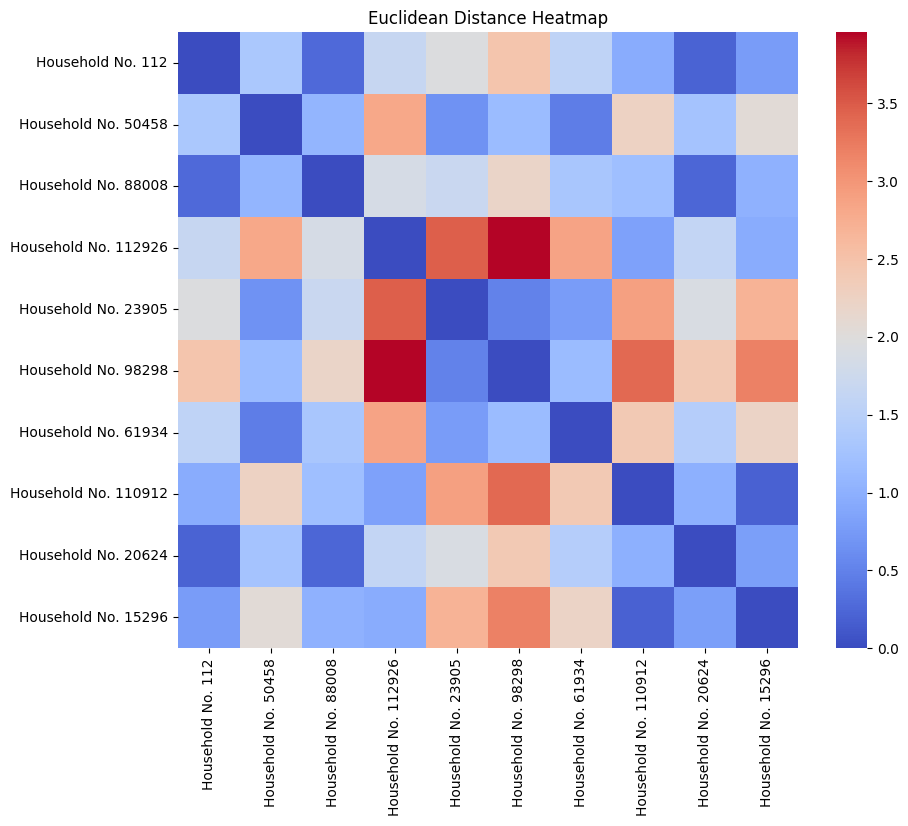

In [69]:
n_samples = 10
sampled_indices = euclidean_distances.sample(n=n_samples, random_state=42).index
euclidean_distances_sampled = euclidean_distances.loc[sampled_indices, sampled_indices]
plt.figure(figsize=(10, 8))
sns.heatmap(euclidean_distances_sampled, cmap="coolwarm", annot=False)
plt.title("Euclidean Distance Heatmap")
plt.show()

Agglomerative Clustering directly works with a distance matrix as an input. We use the distance matrix of euclidean distances and form clusters based on similar household incomes and expenditures, and we add them to the sampled dataframe.

Let us find first the optimal number of clusters using the silhouette score


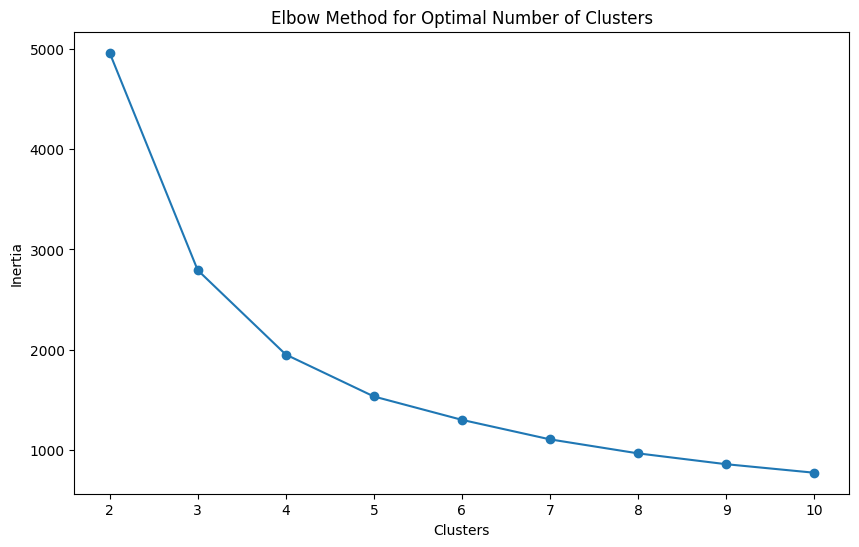

In [70]:
from sklearn.cluster import KMeans

inertia_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_scores, marker='o', linestyle='-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


The optimal number is 4


In [71]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 4  

clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering.fit_predict(euclidean_distances)

sampled_df['Cluster'] = cluster_labels
sampled_df.head()

/opt/miniconda3/envs/DataMining/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Total Income  Total Expenditures  Cluster
Household No. 145971      155220.0           165997.00        1
Household No. 11502       261409.0           207954.00        1
Household No. 65458       163320.0           127087.00        3
Household No. 55913       341390.0           252583.50        2
Household No. 70977       449174.0           315895.85        0

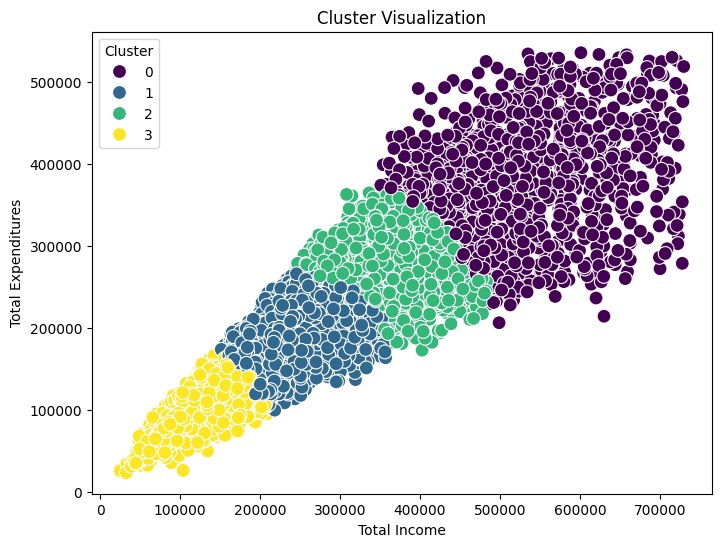

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total Income', 
    y='Total Expenditures', 
    hue='Cluster', 
    palette='viridis', 
    data=sampled_df, 
    s=100
)
plt.title('Cluster Visualization')
plt.xlabel('Total Income')
plt.ylabel('Total Expenditures')
plt.legend(title='Cluster')
plt.show()

A scatterplot shows the clusters formed by the agglomerative clustering. We can see that the clusters are formed by similar households. In this case, four clusters are formed.

1. The 0 Cluster are households with relatively high income and high expenditures
2. The 1 and 2 Cluster are middle of the line in terms of income and expenditures, with the 1 Cluster having less of both.
3. The 3 Cluster are households with relatively low income and expenditures.
4. There are households present wherein their total value of expenditures exceed their total value of income, indicating debt.


## Clustering for all income and expenditure


In [73]:
income_expenditure_df.columns

Index(['Salaries/Wages', 'Cash Receipts', 'Farming',
       'Logistics and Manufacturing', 'Entrep. Activities', 'Passive Income',
       'Livestocks', 'Other Income NEC', 'Processed Foods',
       'Non-Processed Foods', 'Other Foods',
       'Fruits and Vegetables and Juices', 'Non-Alcoholic Beverages',
       'Non-Essential Expenditures', 'Services and Primary Goods',
       'Miscellaneous Expenditures', 'Non-Food Essential Expenditures',
       'Other Expenditure NEC'],
      dtype='object')

In [74]:
combined_incomes_df = cleaned_df.copy()

combined_incomes_df['Salaries/Wages'] = combined_incomes_df['Salaries/Wages from Regular Employment'] + combined_incomes_df['Salaries/Wages from Seasonal Employment']
combined_incomes_df['Cash Receipts'] = combined_incomes_df['Cash Receipts, Support, etc. from Abroad'] + combined_incomes_df['Cash Receipts, Support, etc. from Domestic Source']
combined_incomes_df['Farming'] = combined_incomes_df['Crop Farming and Gardening'] + combined_incomes_df['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
combined_incomes_df['Logistics and Manufacturing'] = combined_incomes_df['Wholesale and Retail'] + combined_incomes_df['Transportation, Storage Services'] + combined_incomes_df['Manufacturing']
combined_incomes_df['Entrep. Activities'] = combined_incomes_df['Entrep. Activities NEC'] + combined_incomes_df['Entrep. Activities NEC.1'] + combined_incomes_df['Entrep. Activities NEC.2']
combined_incomes_df['Passive Income'] = combined_incomes_df['Total Received as Gifts'] + combined_incomes_df['Family Sustenance Activities'] + combined_incomes_df['Pension and Retirement Benefits'] + combined_incomes_df['Dividends from Investment'] + combined_incomes_df['Rentals Received from Non-Agri Lands, etc.']
combined_incomes_df['Livestocks'] = combined_incomes_df['Livestock and Poultry Raising'] + combined_incomes_df['Fishing'] + combined_incomes_df['Forestry and Hunting']
combined_incomes_df['Other Income NEC'] = combined_incomes_df['Other Sources of Income NEC']

combined_incomes_df['Processed Foods'] = combined_incomes_df['Cereal and Cereal Preparations (Total)'] + combined_incomes_df['Sugar, Jam and Honey (Total)'] + combined_incomes_df['Softdrinks'] + combined_incomes_df['Oils and Fats (Total)']
combined_incomes_df['Non-Processed Foods'] = combined_incomes_df['Meat and Meat Preparations'] + combined_incomes_df['Fish and Marine Products (Total)'] + combined_incomes_df['Dairy Products and Eggs (Total)']
combined_incomes_df['Other Foods'] = combined_incomes_df['Food Not Elsewhere Classified (Total)'] + combined_incomes_df['Food Regularly Consumed Outside The Home (Total)']
combined_incomes_df['Fruits and Vegetables and Juices'] = combined_incomes_df['Fruits and Vegetables'] + combined_incomes_df['Vegetables (Total)'] + combined_incomes_df['Fruit and vegetable juices'] + combined_incomes_df['Other Vegetables (Total)']
combined_incomes_df['Non-Alcoholic Beverages'] = combined_incomes_df['Coffee, Cocoa and Tea (Total)'] + combined_incomes_df['Tea (total)  expenditure'] + combined_incomes_df['Cocoa (total)  expenditure'] + combined_incomes_df['Other Non Alcoholic Beverages']
combined_incomes_df['Non-Essential Expenditures'] = combined_incomes_df['Alcoholic Beverages (Total)'] + combined_incomes_df['Tobacco (Total)'] 
combined_incomes_df['Services and Primary Goods'] = combined_incomes_df['Services_Primary_Goods'] + combined_incomes_df['Main Source of Water Supply (2nd visit only)'] + combined_incomes_df['Accomodation Services'] + combined_incomes_df['Alcohol Procduction Services']
combined_incomes_df['Miscellaneous Expenditures'] = combined_incomes_df['Miscellaneous Goods and Services (Total)'] + combined_incomes_df['Durable Furniture'] + combined_incomes_df['Special Family Occasion']
combined_incomes_df['Non-Food Essential Expenditures'] = combined_incomes_df['Clothing, Footwear and Other Wear'] + combined_incomes_df['Housing and water (Total)'] + combined_incomes_df['Actual House Rent'] + combined_incomes_df['Furnishings, Household Equipment & Routine Household Mainte'] + combined_incomes_df['Health (Total)']+ combined_incomes_df['Transportation (Total)'] + combined_incomes_df['Communication (Total)'] + combined_incomes_df['Recreation and Culture (Total)'] + combined_incomes_df['Education (Total)'] + combined_incomes_df['Insurance']
combined_incomes_df['Other Expenditure NEC'] = combined_incomes_df['Other Expenditure (inc. Value Consumed, Losses)']

In [75]:
income_cols = ['Salaries/Wages', 'Cash Receipts', 'Farming', 'Logistics and Manufacturing', 
   'Entrep. Activities', 'Passive Income', 'Livestocks', 'Other Income NEC']

expenditure_cols = ['Processed Foods',
'Non-Processed Foods',
'Other Foods',
'Fruits and Vegetables and Juices',
'Non-Alcoholic Beverages',
'Non-Essential Expenditures',
'Services and Primary Goods',
'Miscellaneous Expenditures',
'Non-Food Essential Expenditures',
'Other Expenditure NEC']

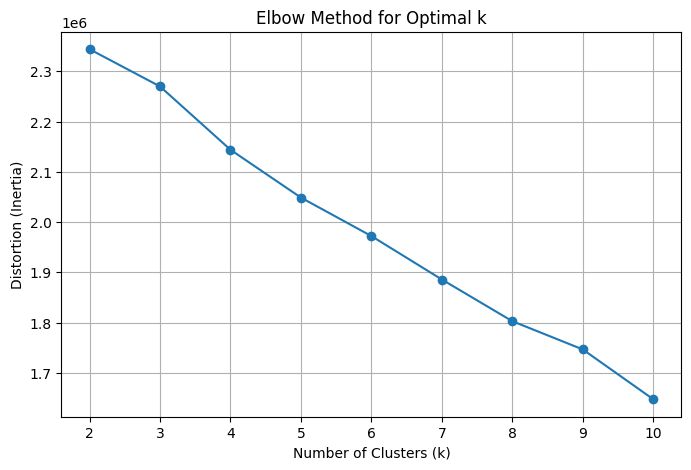

In [76]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_cluster = income_expenditure_df[income_cols + expenditure_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

distortions = []
K = range(2, 11)  # Test cluster sizes from 2 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.xticks(K)
plt.grid(True)
plt.show()

In [77]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels back to original data
combined_incomes_df['Cluster'] = df_cluster['Cluster']

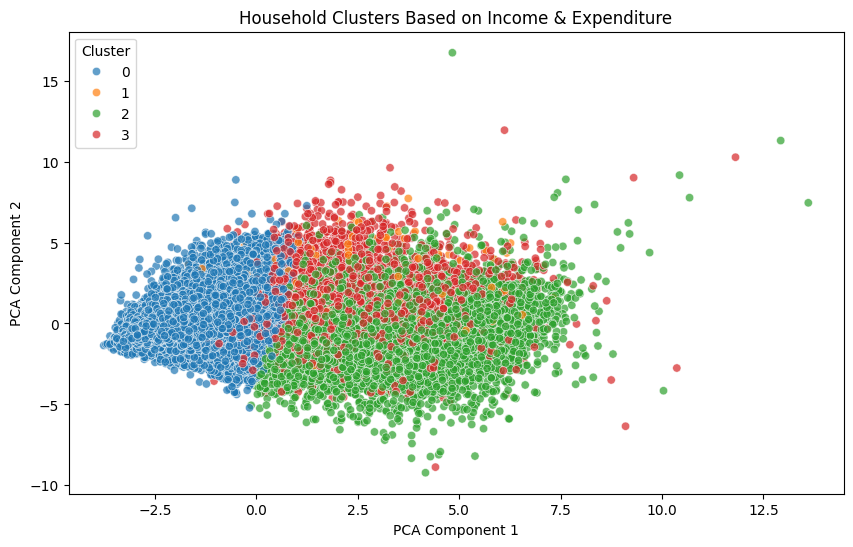

In [78]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_cluster['PCA1'] = df_pca[:, 0]
df_cluster['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster['PCA1'], y=df_cluster['PCA2'], hue=df_cluster['Cluster'], palette="tab10", alpha=0.7)
plt.title("Household Clusters Based on Income & Expenditure")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [79]:
# Get mean income & expenditure per cluster
cluster_summary = df_cluster.groupby("Cluster").mean()

cluster_summary[income_cols + expenditure_cols]

Salaries/Wages  Cash Receipts       Farming  \
Cluster                                                
0          85884.309274   24186.379357  17522.984930   
1         120057.058667   38481.360000  17648.945333   
2         325573.126115   18787.766232   5147.653552   
3          69659.213840  107965.865460  17516.026645   

         Logistics and Manufacturing  Entrep. Activities  Passive Income  \
Cluster                                                                    
0                       17114.210061         1329.788833    11002.772850   
1                       38919.992000         8275.154667    22848.248253   
2                       19462.278080         1965.600473    10088.694920   
3                       85705.141323        12710.316758    42780.298202   

           Livestocks  Other Income NEC  Processed Foods  Non-Processed Foods  \
Cluster                                                                         
0         8924.214042        214.019788     27503.695378         24259.217021   
1        12051.576000      51613.224000     34470.956427         37936.242305   
2         2506.292622        207.860541     38515.017708         50531.036457   
3         6459.492924        302.620193     36155.373673         45818.113670   

          Other Foods  Fruits and Vegetables and Juices  \
Cluster                                                   
0         7305.009636                       8722.260643   
1        11992.997440                      14132.491960   
2        26599.839419                      15933.377321   
3        16849.122012                      16239.497735   

         Non-Alcoholic Beverages  Non-Essential Expenditures  \
Cluster                                                        
0                    2111.642887                 2380.722379   
1                    3270.279453                 2851.676960   
2                    4038.221853                 5254.264024   
3                    3258.945100                 2879.127169   

         Services and Primary Goods  Miscellaneous Expenditures  \
Cluster                                                           
0                       1264.562960                10088.335159   
1                       2376.816133                19984.508000   
2                       3028.723259                25334.069984   
3                       2962.479837                26615.777230   

         Non-Food Essential Expenditures  Other Expenditure NEC  
Cluster                                                          
0                           58408.667895            1347.264138  
1                          116903.058667            3687.774667  
2                          147266.861139            6138.274191  
3                          146941.417431            3655.639518

## Clustering for Food total amd Non-Food Essensital Expenditures


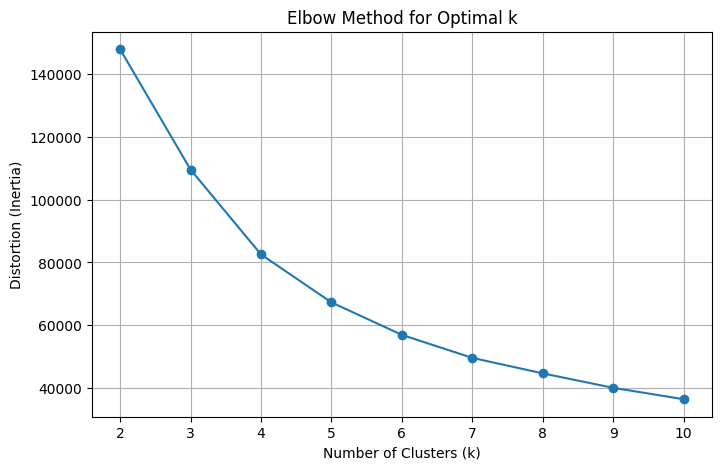

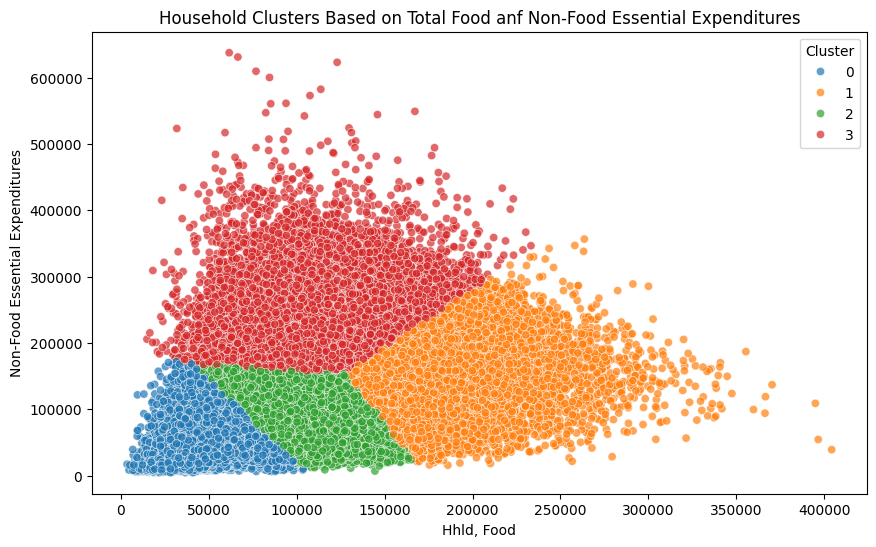

Hhld, Food  Non-Food Essential Expenditures
Cluster                                                
0         59079.187380                     46913.880045
1        176582.680997                    140113.708516
2        103114.377463                     88418.882276
3        112258.733292                    226461.613192

In [80]:
df_cluster = combined_incomes_df.copy()

df_cluster.set_index('Household ID', inplace=True)

cols = ['Hhld, Food', 'Non-Food Essential Expenditures']

df_cluster = df_cluster[cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

distortions = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.xticks(K)
plt.grid(True)
plt.show()
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

combined_incomes_df['Cluster'] = df_cluster['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster[cols[0]], y=df_cluster[cols[1]], hue=df_cluster['Cluster'], palette="tab10", alpha=0.7)
plt.title("Household Clusters Based on Total Food anf Non-Food Essential Expenditures")
plt.xlabel(f"{cols[0]}")
plt.ylabel(f"{cols[1]}")
plt.legend(title="Cluster")
plt.show()

cluster_summary = df_cluster.groupby("Cluster").mean()
cluster_summary[cols]

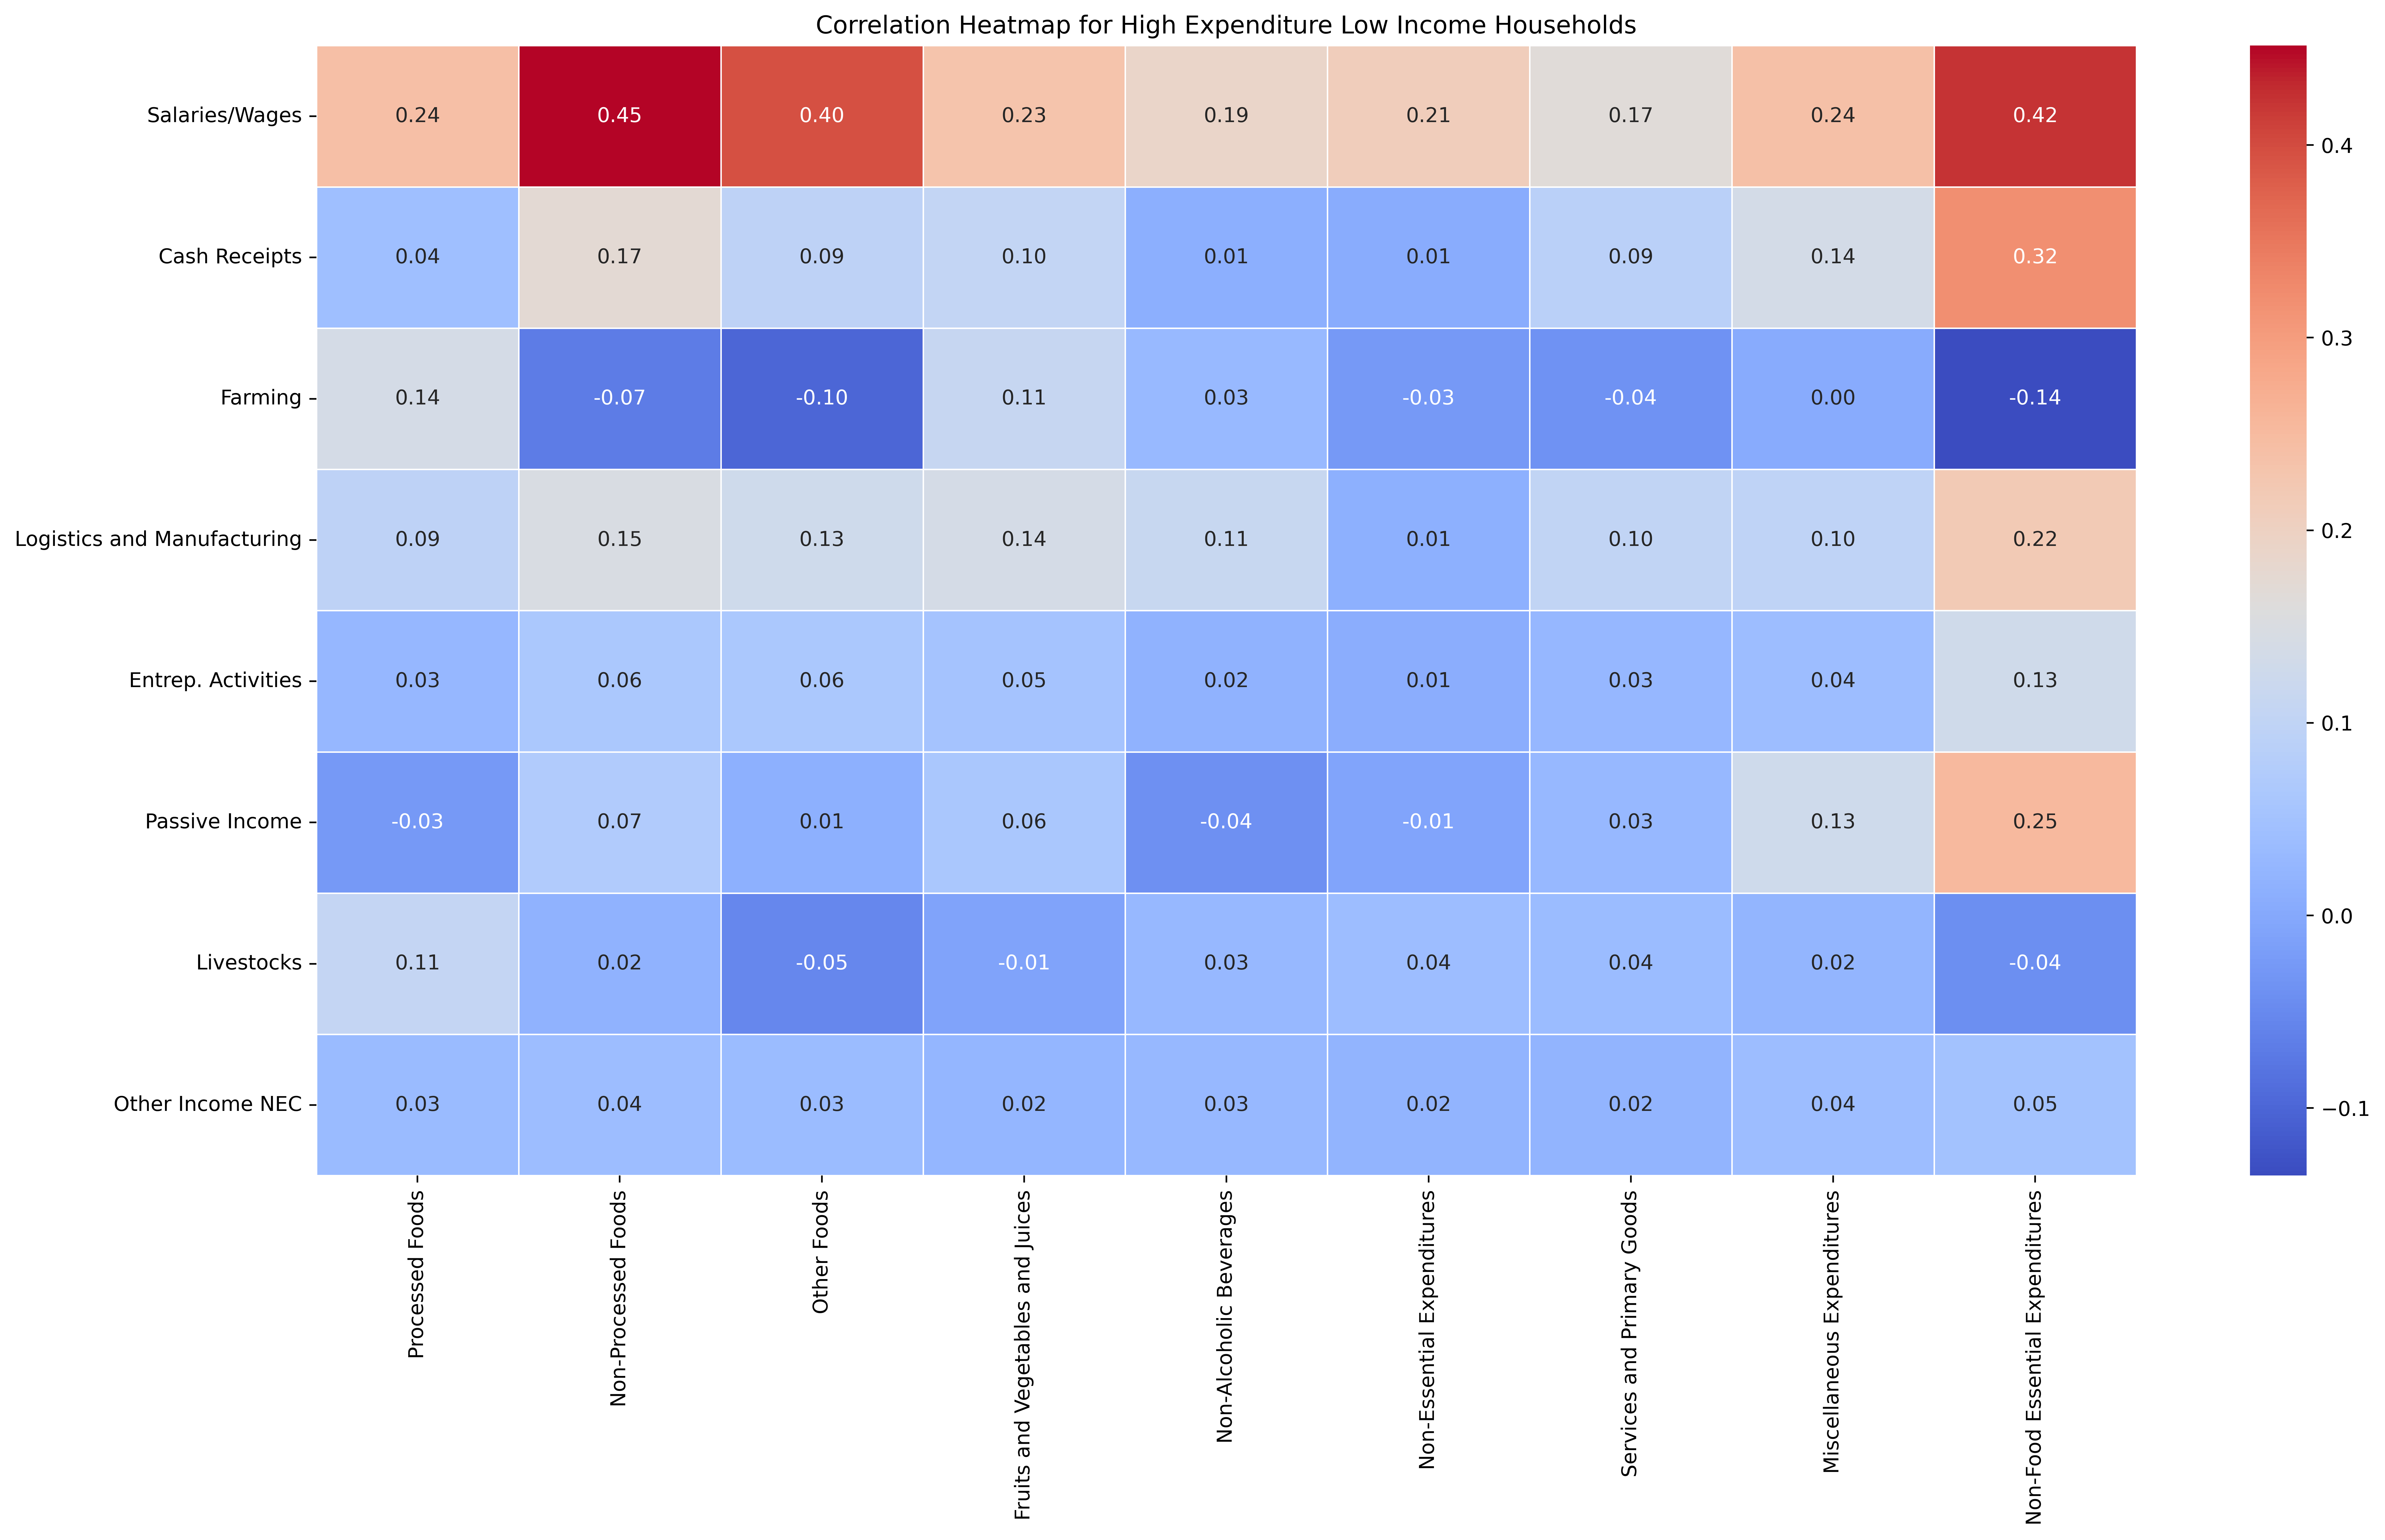

In [81]:
high_expenditure_low_income_df = combined_incomes_df[combined_incomes_df['Hhld, Income, Total'] < combined_incomes_df['Hhld, Expenditures, Total']]
high_expenditure_low_income_df = high_expenditure_low_income_df[income_cols + expenditure_cols + ['Household ID']]
high_expenditure_low_income_df.set_index('Household ID', inplace=True)

high_expenditure_low_income_corr = high_expenditure_low_income_df.corr()

correlation_subset = high_expenditure_low_income_corr.iloc[0:8, 8:17]

plt.figure(figsize=(20,10), dpi = 500)
plt.title("Correlation Heatmap for High Expenditure Low Income Households")
sns.heatmap(correlation_subset,annot=True,fmt=".2f", linewidth=.5, cmap='coolwarm')
plt.show()

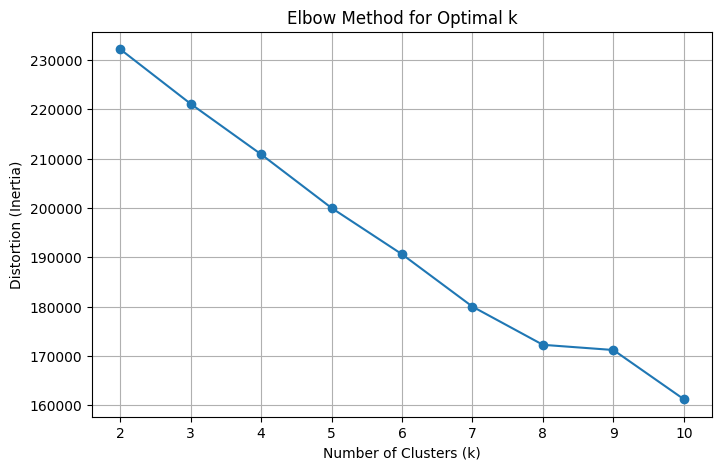

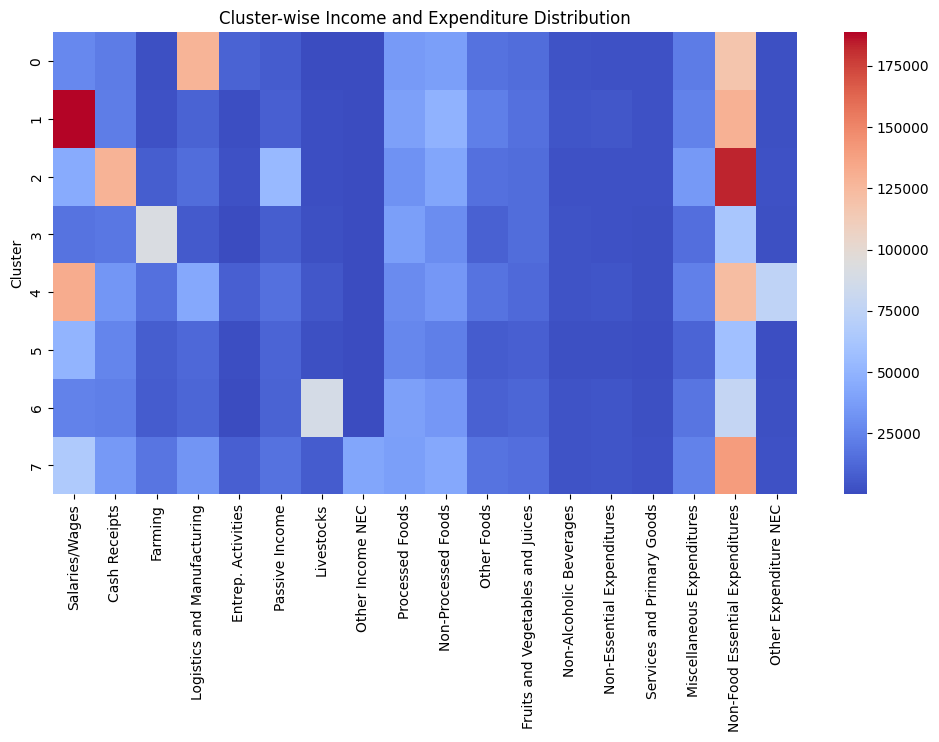

In [82]:
df_cluster = high_expenditure_low_income_df.copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

distortions = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.xticks(K)
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=8, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

combined_incomes_df['Cluster'] = df_cluster['Cluster']

cluster_summary = df_cluster.groupby("Cluster").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, cmap="coolwarm", annot=False)
plt.title("Cluster-wise Income and Expenditure Distribution")
plt.show()

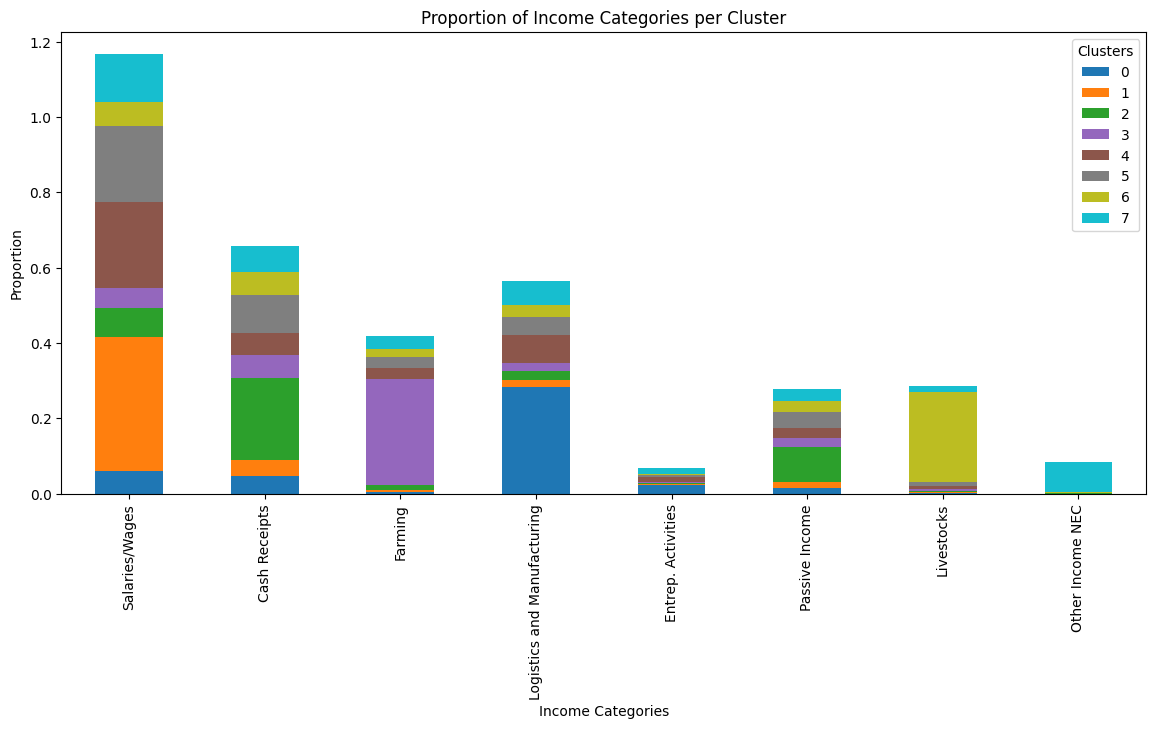

In [83]:
df_percentage = cluster_summary.apply(lambda x: x / x.sum(), axis=1)
df_percentage[income_cols].T.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="tab10")
plt.title("Proportion of Income Categories per Cluster")
plt.xlabel("Income Categories")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.legend(title="Clusters")
plt.show()

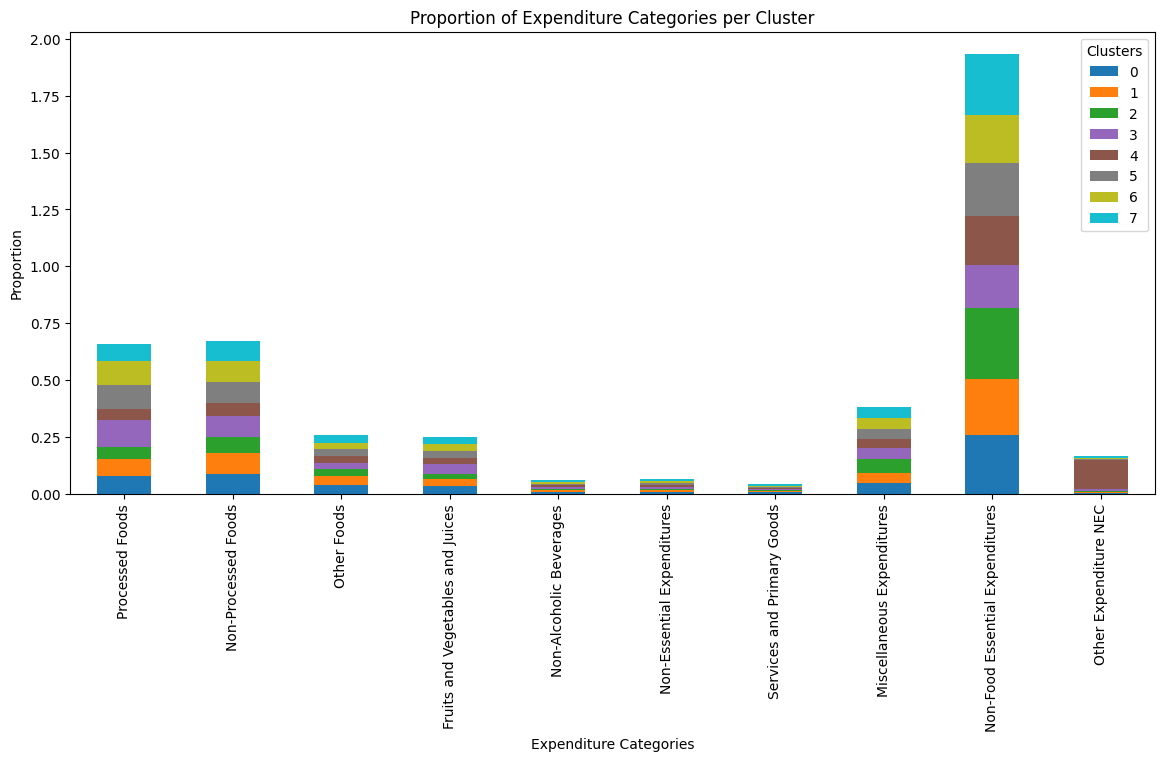

In [84]:
df_percentage = cluster_summary.apply(lambda x: x / x.sum(), axis=1)
df_percentage[expenditure_cols].T.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="tab10")
plt.title("Proportion of Expenditure Categories per Cluster")
plt.xlabel("Expenditure Categories")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.legend(title="Clusters")
plt.show()

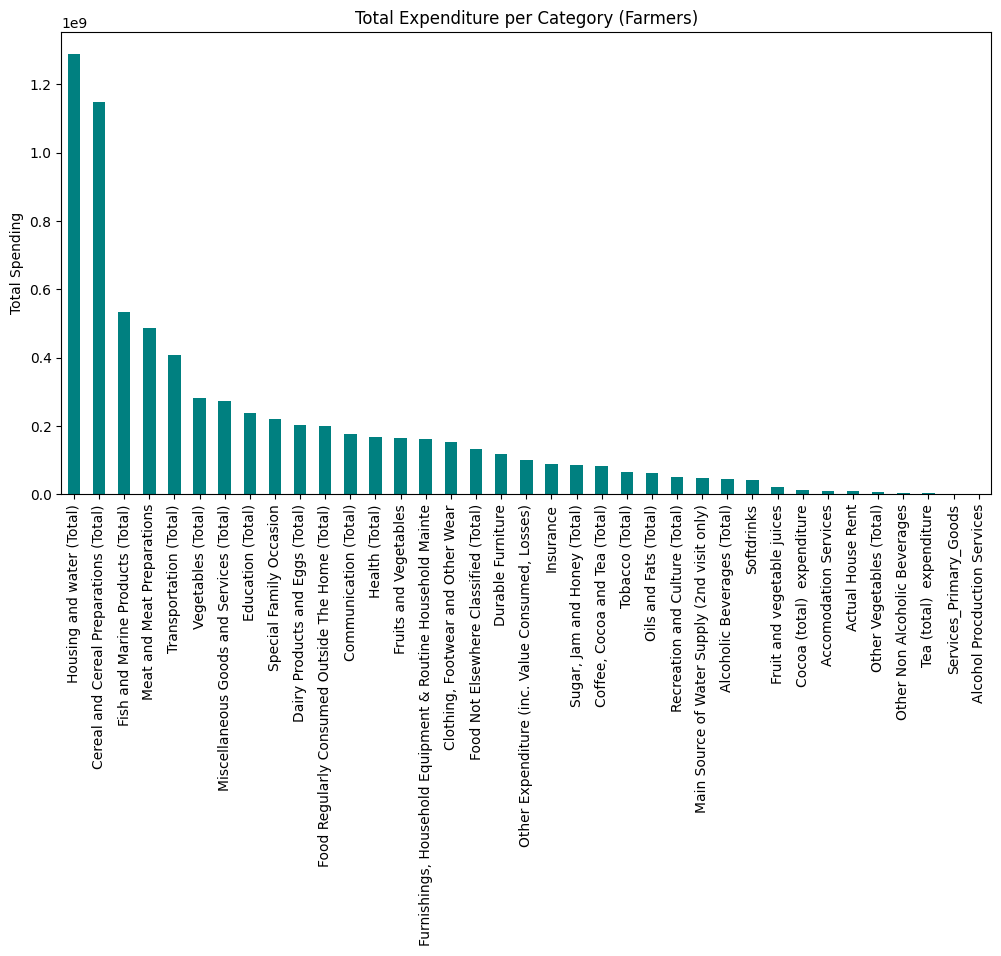

In [85]:
farmer_df = combined_incomes_df[combined_incomes_df['Farming'] > 0]
farmer_df.set_index('Household ID', inplace=True)
farmer_df = farmer_df[cost_columns]
total_spending = farmer_df.sum().sort_values(ascending=False)


plt.figure(figsize=(12,6))
total_spending.plot(kind='bar', color='teal')
plt.title("Total Expenditure per Category (Farmers)")
plt.ylabel("Total Spending")
plt.xticks(rotation=90)
plt.show()

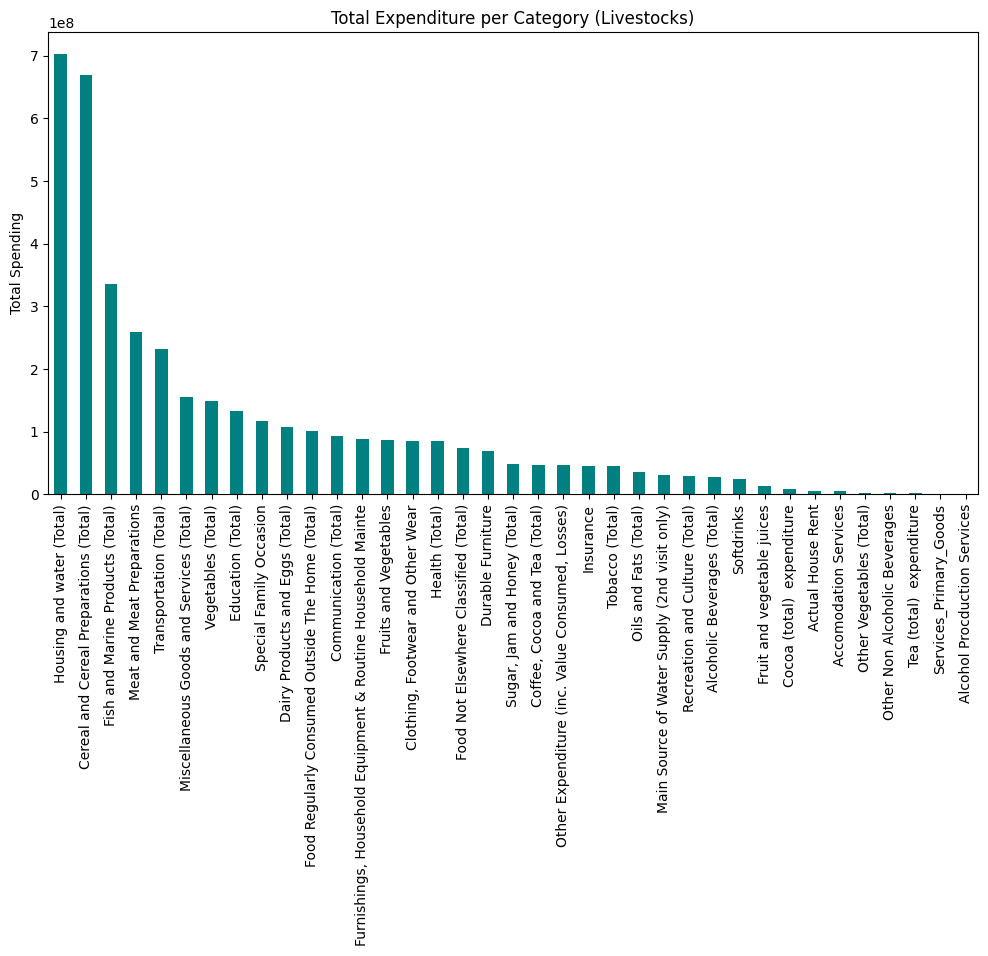

In [86]:
farmer_df = combined_incomes_df[combined_incomes_df['Livestocks'] > 0]
farmer_df.set_index('Household ID', inplace=True)
farmer_df = farmer_df[cost_columns]
total_spending = farmer_df.sum().sort_values(ascending=False)


plt.figure(figsize=(12,6))
total_spending.plot(kind='bar', color='teal')
plt.title("Total Expenditure per Category (Livestocks)")
plt.ylabel("Total Spending")
plt.xticks(rotation=90)
plt.show()

# 7. Data Mining: Association Rule Mining


## If needed, transform the dataset (one-hot encoding) and apply the Apriori / FPGrowth algorithm to extract association rules.


## Income Sources and Expenditure Sources

Sample first the dataset (like in the heatmap) for a save in computational power


In [87]:
assoc_rule_sampling = cleaned_df.copy()

num_rows = assoc_rule_sampling.shape[0]

income_iqr = assoc_rule_sampling['Hhld, Income, Total'].quantile(0.75) - assoc_rule_sampling['Hhld, Income, Total'].quantile(0.25)
expenditure_iqr = assoc_rule_sampling['Hhld, Expenditures, Total'].quantile(0.75) - assoc_rule_sampling['Hhld, Expenditures, Total'].quantile(0.25)

# Implement Freedman-Diaconis Rule
bin_width_income = 2 * income_iqr / (num_rows ** (1/3))
bin_width_expenditure = 2 * expenditure_iqr / (num_rows ** (1/3))

income_bins = int((assoc_rule_sampling['Hhld, Income, Total'].max() - assoc_rule_sampling['Hhld, Income, Total'].min()) / bin_width_income)
expenditure_bins = int((assoc_rule_sampling['Hhld, Expenditures, Total'].max() - assoc_rule_sampling['Hhld, Expenditures, Total'].min()) / bin_width_expenditure)

print(f"Income number of bins: {income_bins}")
print(f"Expenditure number of bins: {expenditure_bins}")

assoc_rule_sampling['Income Bin'] = pd.qcut(assoc_rule_sampling['Hhld, Income, Total'], q=income_bins, labels=False, duplicates='drop')
assoc_rule_sampling['Expenditure Bin'] = pd.qcut(assoc_rule_sampling['Hhld, Expenditures, Total'], q=expenditure_bins, labels=False, duplicates='drop')

assoc_rule_sampling['Strata'] = assoc_rule_sampling['Income Bin'].astype(str) + '-' + assoc_rule_sampling['Expenditure Bin'].astype(str)

print("Shape of the data before removing rare strata:", assoc_rule_sampling.shape)
strata_counts = assoc_rule_sampling['Strata'].value_counts()
rare_strata = strata_counts[strata_counts < 2].index
# Drop the rare strata
assoc_rule_sampling = assoc_rule_sampling[~assoc_rule_sampling['Strata'].isin(rare_strata)]

print("Shape of the data after removing rare strata:", assoc_rule_sampling.shape)

Income number of bins: 104
Expenditure number of bins: 104
Shape of the data before removing rare strata: (149622, 93)
Shape of the data after removing rare strata: (148691, 93)


In [88]:
assoc_rule_sampled, _ = train_test_split(assoc_rule_sampling, test_size=0.95, random_state=42, stratify=assoc_rule_sampling['Strata']) # Get 5% of the data

assoc_rule_sampled.drop(columns=['Income Bin', 'Expenditure Bin', 'Strata'], inplace=True)
print('Shape of sampled data:', assoc_rule_sampled.shape)

Shape of sampled data: (7434, 90)


We first look into the any association chains between the income sources and the expenditure sources
This could explain relationships like what income source is the main purchasing power of the expenditures


In [105]:
assoc_rule_1 = assoc_rule_sampled.copy()
assoc_rule_1 = assoc_rule_1[monetary_columns + cost_columns].copy()
# Combine similar columns to reduce dimensionality
assoc_rule_1['Salaries/Wages'] = assoc_rule_1['Salaries/Wages from Regular Employment'] + assoc_rule_1['Salaries/Wages from Seasonal Employment']
assoc_rule_1['Cash Receipts'] = assoc_rule_1['Cash Receipts, Support, etc. from Abroad'] + assoc_rule_1['Cash Receipts, Support, etc. from Domestic Source']
assoc_rule_1['Farming'] = assoc_rule_1['Crop Farming and Gardening'] + assoc_rule_1['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
assoc_rule_1['Logistics and Manufacturing'] = assoc_rule_1['Wholesale and Retail'] + assoc_rule_1['Transportation, Storage Services'] + assoc_rule_1['Manufacturing']
assoc_rule_1['Entrep. Activities'] = assoc_rule_1['Entrep. Activities NEC'] + assoc_rule_1['Entrep. Activities NEC.1'] + assoc_rule_1['Entrep. Activities NEC.2']
assoc_rule_1['Passive Income'] = assoc_rule_1['Total Received as Gifts'] + assoc_rule_1['Family Sustenance Activities'] + assoc_rule_1['Pension and Retirement Benefits'] + assoc_rule_1['Dividends from Investment'] + assoc_rule_1['Rentals Received from Non-Agri Lands, etc.']
assoc_rule_1['Livestocks'] = assoc_rule_1['Livestock and Poultry Raising'] + assoc_rule_1['Fishing'] + assoc_rule_1['Forestry and Hunting']
assoc_rule_1['Other Income NEC'] = assoc_rule_1['Other Sources of Income NEC']

assoc_rule_1['Processed Foods'] = assoc_rule_1['Cereal and Cereal Preparations (Total)'] + assoc_rule_1['Sugar, Jam and Honey (Total)'] + assoc_rule_1['Softdrinks'] + assoc_rule_1['Oils and Fats (Total)']
assoc_rule_1['Non-Processed Foods'] = assoc_rule_1['Meat and Meat Preparations'] + assoc_rule_1['Fish and Marine Products (Total)'] + assoc_rule_1['Dairy Products and Eggs (Total)']
assoc_rule_1['Other Foods'] = assoc_rule_1['Food Not Elsewhere Classified (Total)'] + assoc_rule_1['Food Regularly Consumed Outside The Home (Total)']
assoc_rule_1['Fruits and Vegetables and Juices'] = assoc_rule_1['Fruits and Vegetables'] + assoc_rule_1['Vegetables (Total)'] + assoc_rule_1['Fruit and vegetable juices'] + assoc_rule_1['Other Vegetables (Total)']
assoc_rule_1['Non-Alcoholic Beverages'] = assoc_rule_1['Coffee, Cocoa and Tea (Total)'] + assoc_rule_1['Tea (total)  expenditure'] + assoc_rule_1['Cocoa (total)  expenditure'] + assoc_rule_1['Other Non Alcoholic Beverages']
assoc_rule_1['Non-Essential Expenditures'] = assoc_rule_1['Alcoholic Beverages (Total)'] + assoc_rule_1['Tobacco (Total)'] 
assoc_rule_1['Services and Primary Goods'] = assoc_rule_1['Services_Primary_Goods'] + assoc_rule_1['Main Source of Water Supply (2nd visit only)'] + assoc_rule_1['Accomodation Services'] + assoc_rule_1['Alcohol Procduction Services']
assoc_rule_1['Miscellaneous Expenditures'] = assoc_rule_1['Miscellaneous Goods and Services (Total)'] + assoc_rule_1['Durable Furniture'] + assoc_rule_1['Special Family Occasion']
assoc_rule_1['Essential Expenditures'] = assoc_rule_1['Clothing, Footwear and Other Wear'] + assoc_rule_1['Housing and water (Total)'] + assoc_rule_1['Actual House Rent'] + assoc_rule_1['Furnishings, Household Equipment & Routine Household Mainte'] + assoc_rule_1['Health (Total)']+ assoc_rule_1['Transportation (Total)'] + assoc_rule_1['Communication (Total)'] + assoc_rule_1['Recreation and Culture (Total)'] + assoc_rule_1['Education (Total)'] + assoc_rule_1['Insurance']
assoc_rule_1['Other Expenditure NEC'] = assoc_rule_1['Other Expenditure (inc. Value Consumed, Losses)']

# Drop the original columns
assoc_rule_1.drop(columns=monetary_columns, inplace=True)
assoc_rule_1.drop(columns=cost_columns, inplace=True)

# convert monetary and cost to none/low/med/high using percentiles
def categorize_lmh(value, quantiles):
    if value == 0:
        return "None"
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"
    
for col in assoc_rule_1.columns:
    quantiles = assoc_rule_1[col].quantile([0.33, 0.66]).to_dict()
    assoc_rule_1[col] = assoc_rule_1[col].apply(lambda x: categorize_lmh(x, quantiles))

assoc_rule_1.shape

(7434, 18)

One hot encode in this case is the equivalent to transactional encoding.


In [106]:
assoc_rule_1_transactions = pd.get_dummies(assoc_rule_1)
assoc_rule_1_transactions.shape

(7434, 58)

In [107]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(assoc_rule_1_transactions, min_support=0.3, use_colnames=True, verbose=1)
# 0.3 support in a 7434 dataset is 7434 * 0.3 = 2294 transactions where the item / combination is present

40 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (Other Income NEC_None)
2 itemset(s) from tree conditioned on items (Livestocks_None)
0 itemset(s) from tree conditioned on items (Livestocks_None, Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (Livestocks_None, Other Income NEC_None)
3 itemset(s) from tree conditioned on items (Farming_None)
0 itemset(s) from tree conditioned on items (Farming_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Entrep. Activities_None)
2 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None)
0 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Entrep. Activities_None)
4 itemset(s) from tree conditioned on items (Logistics and Manufacturing_None)


In [108]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# save frequent itemsets and association rules to csv in itemsets_and_rules folder
frequent_itemsets.to_csv('../itemsets_and_rules/frequent_itemsets_spendingPatterns.csv', index=False)
rules.to_csv('../itemsets_and_rules/association_rules_spendingPatterns.csv', index=False)

We use a Plotly graph to visualize the results.
There is a dropdown menu that allows you to select a specific item or itemset to view its details.


In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
# Convert frozensets to strings for JSON serialization
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

unique_values = sorted(set(rules["antecedents"]).union(set(rules["consequents"])))
unique_values.insert(0, "All")  # Add "All" at the beginning

value_dropdown = widgets.Dropdown(
    options=unique_values, 
    value="All",  # Default selection
    description='Filter:'
)

def update_plot(selected_value):
    if selected_value == "All":
        filtered_rules = rules  # Show full dataset
    else:
        # Filter the DataFrame where antecedents or consequents contain the selected value
        filtered_rules = rules[
            (rules["antecedents"] == selected_value) | (rules["consequents"] == selected_value)
        ]
    
    if filtered_rules.empty:
        print(f"No rules found for '{selected_value}'")
        return

    # Create the scatter plot
    fig = px.scatter(
        filtered_rules,
        x='support',
        y='confidence',
        size='lift',
        color='lift',
        hover_name='antecedents',
        hover_data=['consequents', 'support', 'confidence', 'lift'],
        title=f'Rules Involving "{selected_value}"' if selected_value != "All" else "All Rules",
        labels={'support': 'Support', 'confidence': 'Confidence'},
    )
    fig.show()

# Display interactive widgets
interactive_plot = widgets.interactive(update_plot, selected_value=value_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Filter:', options=('All', 'Cash Receipts_Medium', 'Entrep. Activit…

Key Insights

1. Many of the associations point to ‘None’ income sources, indicating that Filipinos do not have numerous income sources (Notably: Entrepreneurship Activities, Livestock, and Farming)

2. There are also cases where low to medium expenditure sources are associated with ‘None’ income sources, indicating that Filipinos rely solely on Salary to make money for purchasing power.


## Financial Freedom Patterns

To see the power of each income revenue, we now see their association only with one another.


In [110]:
assoc_rule_2 = assoc_rule_sampled.copy()
assoc_rule_2 = assoc_rule_2[monetary_columns].copy()

assoc_rule_2['Salaries/Wages'] = assoc_rule_2['Salaries/Wages from Regular Employment'] + assoc_rule_2['Salaries/Wages from Seasonal Employment']
assoc_rule_2['Cash Receipts'] = assoc_rule_2['Cash Receipts, Support, etc. from Abroad'] + assoc_rule_2['Cash Receipts, Support, etc. from Domestic Source']
assoc_rule_2['Farming'] = assoc_rule_2['Crop Farming and Gardening'] + assoc_rule_2['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
assoc_rule_2['Logistics and Manufacturing'] = assoc_rule_2['Wholesale and Retail'] + assoc_rule_2['Transportation, Storage Services'] + assoc_rule_2['Manufacturing']
assoc_rule_2['Entrep. Activities'] = assoc_rule_2['Entrep. Activities NEC'] + assoc_rule_2['Entrep. Activities NEC.1'] + assoc_rule_2['Entrep. Activities NEC.2']
assoc_rule_2['Passive Income'] = assoc_rule_2['Total Received as Gifts'] + assoc_rule_2['Family Sustenance Activities'] + assoc_rule_2['Pension and Retirement Benefits'] + assoc_rule_2['Dividends from Investment'] + assoc_rule_2['Rentals Received from Non-Agri Lands, etc.']
assoc_rule_2['Livestocks'] = assoc_rule_2['Livestock and Poultry Raising'] + assoc_rule_2['Fishing'] + assoc_rule_2['Forestry and Hunting']
assoc_rule_2['Other Income NEC'] = assoc_rule_2['Other Sources of Income NEC']

assoc_rule_2.drop(columns=monetary_columns, inplace=True)

def categorize_lmh(value, quantiles):
    if value == 0:
        return "None"
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"
    
for col in assoc_rule_2.columns:
    quantiles = assoc_rule_2[col].quantile([0.33, 0.66]).to_dict()
    assoc_rule_2[col] = assoc_rule_2[col].apply(lambda x: categorize_lmh(x, quantiles))

assoc_rule_2.shape

(7434, 8)

In [111]:


assoc_rule_2_transactions = pd.get_dummies(assoc_rule_2)
assoc_rule_2_transactions.shape
frequent_itemsets_2 = fpgrowth(assoc_rule_2_transactions, min_support=0.1, use_colnames=True, verbose=1)
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1)
# save frequent itemsets and association rules_2 to csv
frequent_itemsets_2.to_csv('../itemsets_and_rules/frequent_itemsets_financialFreedom.csv', index=False)
rules_2.to_csv('../itemsets_and_rules/association_rules_financialFreedom.csv', index=False)
rules_2['antecedents'] = rules_2['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_2['consequents'] = rules_2['consequents'].apply(lambda x: ', '.join(list(x)))

unique_values = sorted(set(rules_2["antecedents"]).union(set(rules_2["consequents"])))
unique_values.insert(0, "All")  # Add "All" at the beginning

value_dropdown = widgets.Dropdown(
    options=unique_values, 
    value="All",  
    description='Filter:'
)

def update_plot(selected_value):
    if selected_value == "All":
        filtered_rules = rules_2  
    else:
        filtered_rules = rules_2[
            (rules_2["antecedents"] == selected_value) | (rules_2["consequents"] == selected_value)
        ]
    
    if filtered_rules.empty:
        print(f"No rules_2 found for '{selected_value}'")
        return

    # Create the scatter plot
    fig = px.scatter(
        filtered_rules,
        x='support',
        y='confidence',
        size='lift',
        color='lift',
        hover_name='antecedents',
        hover_data=['consequents', 'support', 'confidence', 'lift'],
        title=f'Rules Involving "{selected_value}"' if selected_value != "All" else "All Rules",
        labels={'support': 'Support', 'confidence': 'Confidence'},
    )
    fig.show()

interactive_plot = widgets.interactive(update_plot, selected_value=value_dropdown)
display(interactive_plot)

18 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (Other Income NEC_None)
2 itemset(s) from tree conditioned on items (Livestocks_None)
0 itemset(s) from tree conditioned on items (Livestocks_None, Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (Livestocks_None, Other Income NEC_None)
3 itemset(s) from tree conditioned on items (Farming_None)
0 itemset(s) from tree conditioned on items (Farming_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Entrep. Activities_None)
2 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None)
0 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Entrep. Activities_None)
4 itemset(s) from tree conditioned on items (Logistics and Manufacturing_None)


interactive(children=(Dropdown(description='Filter:', options=('All', 'Cash Receipts_High', 'Cash Receipts_Hig…

Key Insights

1. It would seem that even with a support of 0.1, which means only 743 samples to count as a frequent itemset, can only associate with one high source of non-salary revenue like Logistics, Farming, Livestock, etc. at a time. Although there are also combinations where a high non-salary-revenue can be associated with low-medium cash receipts, passive income, or salary.

2. This can mean that Filipinos can only obtain financial freedom in a case where they can have passive income (retired/insurance), cash receipts (help from abroad or other family members), or just have very high capital / salary


## By Island grouped using Region

We now check the association of income streams based on Region divided into the three main islands: Luzon, Visayas and Mindanao. We now use stratify sampling on the Region column in the cleaned_df dataset to gain equal representation of each region.


In [112]:
assoc_rule_3 = cleaned_df.copy()
categorical_columns = ['Region']
assoc_rule_3 = assoc_rule_3[monetary_columns + categorical_columns].copy()

assoc_rule_3['Salaries/Wages'] = assoc_rule_3['Salaries/Wages from Regular Employment'] + assoc_rule_3['Salaries/Wages from Seasonal Employment']
assoc_rule_3['Cash Receipts'] = assoc_rule_3['Cash Receipts, Support, etc. from Abroad'] + assoc_rule_3['Cash Receipts, Support, etc. from Domestic Source']
assoc_rule_3['Farming'] = assoc_rule_3['Crop Farming and Gardening'] + assoc_rule_3['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
assoc_rule_3['Logistics and Manufacturing'] = assoc_rule_3['Wholesale and Retail'] + assoc_rule_3['Transportation, Storage Services'] + assoc_rule_3['Manufacturing']
assoc_rule_3['Entrep. Activities'] = assoc_rule_3['Entrep. Activities NEC'] + assoc_rule_3['Entrep. Activities NEC.1'] + assoc_rule_3['Entrep. Activities NEC.2']
assoc_rule_3['Passive Income'] = assoc_rule_3['Total Received as Gifts'] + assoc_rule_3['Family Sustenance Activities'] + assoc_rule_3['Pension and Retirement Benefits'] + assoc_rule_3['Dividends from Investment'] + assoc_rule_3['Rentals Received from Non-Agri Lands, etc.']
assoc_rule_3['Livestocks'] = assoc_rule_3['Livestock and Poultry Raising'] + assoc_rule_3['Fishing'] + assoc_rule_3['Forestry and Hunting']
assoc_rule_3['Other Income NEC'] = assoc_rule_3['Other Sources of Income NEC']

assoc_rule_3.drop(columns=monetary_columns, inplace=True)

assoc_rule_3, _ = train_test_split(assoc_rule_3, test_size=0.95, random_state=42, stratify=assoc_rule_3['Region']) 

def categorize_lmh(value, quantiles):
    if value == 0:
        return "None"
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

def categorize_region(value):
    luzon = {
        1: 'Ilocos Region',
        2: 'Cagayan Valley',
        3: 'Central Luzon',
        4: 'CALABARZON',
        5: 'Bicol',
        13: 'NCR',
        14: 'CAR',
        17: 'MIMAROPA'
    }
    visayas = {
        6: 'Western Visayas',
        7: 'Central Visayas',
        8: 'Eastern Visayas'
    }
    mindanao = {
        9: 'Zamboanga Peninsula',
        10: 'Northern Mindanao',
        11: 'Davao Region',
        12: 'Soccsksargen',
        16: 'Caraga',
        19: 'BARMM'
    }
    if value in luzon:
        return "Luzon"
    elif value in visayas:
        return "Visayas"
    elif value in mindanao:
        return "Mindanao"
for col in assoc_rule_3.columns:
    if col == 'Region':
        assoc_rule_3[col] = assoc_rule_3[col].apply(categorize_region)
    else:
        quantiles = assoc_rule_3[col].quantile([0.33, 0.66]).to_dict()
        assoc_rule_3[col] = assoc_rule_3[col].apply(lambda x: categorize_lmh(x, quantiles))

assoc_rule_3.shape

(7481, 9)

In [113]:
assoc_rule_3_transactions = pd.get_dummies(assoc_rule_3)
assoc_rule_3_transactions.shape
frequent_itemsets_3 = fpgrowth(assoc_rule_3_transactions, min_support=0.1, use_colnames=True, verbose=1)
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=1)
# save frequent itemsets and association rules_3 to csv
frequent_itemsets_3.to_csv('../itemsets_and_rules/frequent_itemsets_financialFreedomPerRegion.csv', index=False)
rules_3.to_csv('../itemsets_and_rules/association_rules_financialFreedomPerRegion.csv', index=False)
rules_3['antecedents'] = rules_3['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_3['consequents'] = rules_3['consequents'].apply(lambda x: ', '.join(list(x)))

unique_values = sorted(set(rules_3["antecedents"]).union(set(rules_3["consequents"])))
unique_values.insert(0, "All")  # Add "All" at the beginning

value_dropdown = widgets.Dropdown(
    options=unique_values, 
    value="All",  
    description='Filter:'
)

def update_plot(selected_value):
    if selected_value == "All":
        filtered_rules = rules_3  
    else:
        filtered_rules = rules_3[
            (rules_3["antecedents"] == selected_value) | (rules_3["consequents"] == selected_value)
        ]
    
    if filtered_rules.empty:
        print(f"No rules_3 found for '{selected_value}'")
        return

    # Create the scatter plot
    fig = px.scatter(
        filtered_rules,
        x='support',
        y='confidence',
        size='lift',
        color='lift',
        hover_name='antecedents',
        hover_data=['consequents', 'support', 'confidence', 'lift'],
        title=f'Rules Involving "{selected_value}"' if selected_value != "All" else "All Rules",
        labels={'support': 'Support', 'confidence': 'Confidence'},
    )
    fig.show()

interactive_plot = widgets.interactive(update_plot, selected_value=value_dropdown)
display(interactive_plot)

21 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Entrep. Activities_None)
2 itemset(s) from tree conditioned on items (Livestocks_None)
0 itemset(s) from tree conditioned on items (Livestocks_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Livestocks_None, Entrep. Activities_None)
3 itemset(s) from tree conditioned on items (Farming_None)
0 itemset(s) from tree conditioned on items (Farming_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Entrep. Activities_None)
2 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None)
0 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Farming_None, Livestocks_None, Entrep. Activities_None)
4 itemset(s) from tree conditioned on items (Logistics and Manufacturing_None)


interactive(children=(Dropdown(description='Filter:', options=('All', 'Cash Receipts_High', 'Cash Receipts_Hig…

Key Insights

1. The Mindanao group is associated with Medium Cash Receipts. Surprisingly, Mindanao has no association with various other non-Salary streams like Livestocks or Farming
2. The Visayas group had no noteworthy associations, only with non-salary streams with ‘None’ values. This may be due to the lack of representation since Visayas only has three regions
3. The Luzon group unsurprisingly had the highest variation of income streams. Although the strongest associations still were non-salary ‘None’ columns, Luzon had associations with High salaries, High Cash Receipts, High Farming, High Logistics and Manufacturing, and High Passive Income. This proves that Luzon is still the economic workforce of the Philippines, while Visayas and MIndanao are below Luzon


## By NPCINC

We now move forward to the income revenues per income class based on national per capita income decile. We use stratify sampling on the NPCINC column in the cleaned_df dataset to gain equal representation of each decile.


In [114]:
assoc_rule_4 = cleaned_df.copy()
categorical_columns = ['NPCINC']
assoc_rule_4 = assoc_rule_4[monetary_columns + categorical_columns].copy()
# Combine similar columns to reduce dimensionality
assoc_rule_4['Salaries/Wages'] = assoc_rule_4['Salaries/Wages from Regular Employment'] + assoc_rule_4['Salaries/Wages from Seasonal Employment']
assoc_rule_4['Cash Receipts'] = assoc_rule_4['Cash Receipts, Support, etc. from Abroad'] + assoc_rule_4['Cash Receipts, Support, etc. from Domestic Source']
assoc_rule_4['Farming'] = assoc_rule_4['Crop Farming and Gardening'] + assoc_rule_4['Net Share of Crops, Fruits, etc. (Tot. Net Value of Share)']
assoc_rule_4['Logistics and Manufacturing'] = assoc_rule_4['Wholesale and Retail'] + assoc_rule_4['Transportation, Storage Services'] + assoc_rule_4['Manufacturing']
assoc_rule_4['Entrep. Activities'] = assoc_rule_4['Entrep. Activities NEC'] + assoc_rule_4['Entrep. Activities NEC.1'] + assoc_rule_4['Entrep. Activities NEC.2']
assoc_rule_4['Passive Income'] = assoc_rule_4['Total Received as Gifts'] + assoc_rule_4['Family Sustenance Activities'] + assoc_rule_4['Pension and Retirement Benefits'] + assoc_rule_4['Dividends from Investment'] + assoc_rule_4['Rentals Received from Non-Agri Lands, etc.']
assoc_rule_4['Livestocks'] = assoc_rule_4['Livestock and Poultry Raising'] + assoc_rule_4['Fishing'] + assoc_rule_4['Forestry and Hunting']
assoc_rule_4['Other Income NEC'] = assoc_rule_4['Other Sources of Income NEC']

assoc_rule_4.drop(columns=monetary_columns, inplace=True)
assoc_rule_4, _ = train_test_split(assoc_rule_4, test_size=0.95, random_state=42, stratify=assoc_rule_4['NPCINC']) 
def categorize_lmh(value, quantiles):
    if value == 0:
        return "None"
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

def categorize_income(decile):
    if 1 <= decile <= 3:
        return 'Low Income'
    elif 4 <= decile <= 7:
        return 'Middle Income'
    elif 8 <= decile <= 10:
        return 'High Income'
    else:
        return 'Invalid Decile'
    
for col in assoc_rule_4.columns:
    if col == 'NPCINC':
        assoc_rule_4[col] = assoc_rule_4[col].apply(categorize_income)
    else:
        quantiles = assoc_rule_4[col].quantile([0.33, 0.66]).to_dict()
        assoc_rule_4[col] = assoc_rule_4[col].apply(lambda x: categorize_lmh(x, quantiles))

assoc_rule_4.shape

(7481, 9)

In [ ]:
assoc_rule_4_transactions = pd.get_dummies(assoc_rule_4)
assoc_rule_4_transactions.shape
frequent_itemsets_4 = fpgrowth(assoc_rule_4_transactions, min_support=0.1, use_colnames=True, verbose=1)
rules_4 = association_rules(frequent_itemsets_4, metric="lift", min_threshold=1)
# save frequent itemsets and association rules_4 to csv
frequent_itemsets_4.to_csv('../itemsets_and_rules/frequent_itemsets_financialFreedomPerIncomeGroup.csv', index=False)
rules_4.to_csv('../itemsets_and_rules/association_rules_financialFreedomPerIncomeGroup.csv', index=False)
rules_4['antecedents'] = rules_4['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_4['consequents'] = rules_4['consequents'].apply(lambda x: ', '.join(list(x)))

unique_values = sorted(set(rules_4["antecedents"]).union(set(rules_4["consequents"])))
unique_values.insert(0, "All")  # Add "All" at the beginning

value_dropdown = widgets.Dropdown(
    options=unique_values, 
    value="All",  
    description='Filter:'
)

def update_plot(selected_value):
    if selected_value == "All":
        filtered_rules = rules_4  
    else:
        filtered_rules = rules_4[
            (rules_4["antecedents"] == selected_value) | (rules_4["consequents"] == selected_value)
        ]
    
    if filtered_rules.empty:
        print(f"No rules_4 found for '{selected_value}'")
        return

    # Create the scatter plot
    fig = px.scatter(
        filtered_rules,
        x='support',
        y='confidence',
        size='lift',
        color='lift',
        hover_name='antecedents',
        hover_data=['consequents', 'support', 'confidence', 'lift'],
        title=f'Rules Involving "{selected_value}"' if selected_value != "All" else "All Rules",
        labels={'support': 'Support', 'confidence': 'Confidence'},
    )
    fig.show()

interactive_plot = widgets.interactive(update_plot, selected_value=value_dropdown)
display(interactive_plot)

21 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (Other Income NEC_None)
2 itemset(s) from tree conditioned on items (Livestocks_None)
0 itemset(s) from tree conditioned on items (Livestocks_None, Other Income NEC_None)
1 itemset(s) from tree conditioned on items (Livestocks_None, Entrep. Activities_None)
5 itemset(s) from tree conditioned on items (NPCINC_Low Income)
0 itemset(s) from tree conditioned on items (NPCINC_Low Income, Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (NPCINC_Low Income, Other Income NEC_None)
2 itemset(s) from tree conditioned on items (NPCINC_Low Income, Livestocks_None)
0 itemset(s) from tree conditioned on items (NPCINC_Low Income, Livestocks_None, Entrep. Activities_None)
1 itemset(s) from tree conditioned on items (NPCINC_Low Income, Livestocks_None, Other Income NEC_None)
3 itemset(s) from tree conditioned on items (NPCI

Key Insights

1. Surprisingly, higher income households associate more with ‘None’ values of non-salary revenue streams and high salaries, meaning that even with bigger capital to start businesses, there is still no association of higher income earners entering that field
2. For middle income households, they associate more with high-middle cash receipts, middle-high salaries, and low-middle passive incomes, but still, there are still associations with ‘None’ values of non-salary revenue streams and high salaries
3. For low income households, the same norm for non-salary revenue streams, but these households have high correlation with middle-high passive income and middle-high cash receipts.


In [ ]:
income_column = "Per Capita Income"
decile_column = "NPCINC"

income_stats = imputted_column_13.groupby(decile_column)[income_column].agg(['min', 'max']).reset_index()

income_stats

## Per Capita Income, Total nonfood, total food, family size


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules


# low, medium, high for necessities
lmh_columns = [
    "Total Non-Food Expenditure", "Hhld, Food",
]

categorical_columns = ["Family Size", "NPCINC"]

df_filtered = imputted_column_13[lmh_columns + categorical_columns].copy()

df_filtered


In [ ]:


# Convert Low/Medium/High using percentiles
def categorize_lmh(value, quantiles):
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

for col in lmh_columns:
    quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
    df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# Convert Family Size to Small/Medium/Large
def categorize_family_size(size):
    if size <= 3:
        return "Small"
    elif size <= 6:
        return "Medium"
    else:
        return "Large"

df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

def categorize_npcinc(decile):
    if decile <= 3:
        return "Low"
    elif decile <= 7:
        return "Medium"
    else:
        return "High"

df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

In [ ]:
# Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns + categorical_columns)

# Step 7: Apply FP-Growth
min_support = 0.07  # Adjust as needed
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 9: Save results
#frequent_itemsets.to_csv("frequent_itemsets_filtered2.csv", index=False)
#rules.to_csv("association_rules_filtered2.csv", index=False)

## Per capita income with food 1


In [ ]:


# low, medium, high for necessities
lmh_columns_food1 = [
    "Cereal and Cereal Preparations (Total)", "Meat and Meat Preparations",
    "Fish and Marine Products (Total)", "Dairy Products and Eggs (Total)", "Oils and Fats (Total)", "Fruits and Vegetables", "Vegetables (Total)", "Sugar, Jam and Honey (Total)"
]

categorical_columns = ["Family Size", "NPCINC"]

df_filtered = imputted_column_13[lmh_columns_food1 + categorical_columns].copy()

# Convert Low/Medium/High using percentiles
def categorize_lmh(value, quantiles):
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

for col in lmh_columns_food1:
    quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
    df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# Convert Family Size to Small/Medium/Large
def categorize_family_size(size):
    if size <= 3:
        return "Small"
    elif size <= 6:
        return "Medium"
    else:
        return "Large"

df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

def categorize_npcinc(decile):
    if decile <= 3:
        return "Low"
    elif decile <= 7:
        return "Medium"
    else:
        return "High"

df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_food1 + categorical_columns)

# Step 7: Apply FP-Growth
min_support = 0.05  # Adjust as needed
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 9: Save results
# frequent_itemsets.to_csv("frequent_itemsets_food1_lower_th.csv", index=False)
# rules.to_csv("association_rules_food1_lower_th.csv", index=False)

## Per capita income with Food 2


In [ ]:


# low, medium, high for necessities
lmh_columns_food1 = [
    "Food Not Elsewhere Classified (Total)", "Fruit and vegetable juices",
    "Coffee, Cocoa and Tea (Total)", "Tea (total)  expenditure", "Cocoa (total)  expenditure", "Main Source of Water Supply (2nd visit only)", "Softdrinks", "Other Non Alcoholic Beverages"
]

categorical_columns = ["Family Size", "NPCINC"]

df_filtered = imputted_column_13[lmh_columns_food1 + categorical_columns].copy()

# Convert Low/Medium/High using percentiles
def categorize_lmh(value, quantiles):
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

for col in lmh_columns_food1:
    quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
    df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# Convert Family Size to Small/Medium/Large
def categorize_family_size(size):
    if size <= 3:
        return "Small"
    elif size <= 6:
        return "Medium"
    else:
        return "Large"

df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

def categorize_npcinc(decile):
    if decile <= 3:
        return "Low"
    elif decile <= 7:
        return "Medium"
    else:
        return "High"

df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_food1 + categorical_columns)

# Step 7: Apply FP-Growth
min_support = 0.05  # Adjust as needed
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 9: Save results
frequent_itemsets.to_csv("frequent_itemsets_food2.csv", index=False)
rules.to_csv("association_rules_food2.csv", index=False)

## home vs outside per capita income


In [ ]:



# low, medium, high for necessities
lmh_columns_home_vs_outside = [
    "Total Food Consumed at Home (Total)", "Food Regularly Consumed Outside The Home (Total)"
]

categorical_columns = ["Family Size", "NPCINC"]

df_filtered = imputted_column_13[lmh_columns_home_vs_outside + categorical_columns].copy()

# Convert Low/Medium/High using percentiles
def categorize_lmh(value, quantiles):
    if value <= quantiles[0.33]:
        return "Low"
    elif value <= quantiles[0.66]:
        return "Medium"
    else:
        return "High"

for col in lmh_columns_home_vs_outside:
    quantiles = df_filtered[col].quantile([0.33, 0.66]).to_dict()
    df_filtered[col] = df_filtered[col].apply(lambda x: categorize_lmh(x, quantiles))

# Convert Family Size to Small/Medium/Large
def categorize_family_size(size):
    if size <= 3:
        return "Small"
    elif size <= 6:
        return "Medium"
    else:
        return "Large"

df_filtered["Family Size"] = df_filtered["Family Size"].apply(categorize_family_size)

def categorize_npcinc(decile):
    if decile <= 3:
        return "Low"
    elif decile <= 7:
        return "Medium"
    else:
        return "High"

df_filtered["NPCINC"] = df_filtered["NPCINC"].apply(categorize_npcinc)

# Step 6: One-Hot Encode Categorical Columns (LMH + Family Size + NPCINC)
df_encoded = pd.get_dummies(df_filtered, columns=lmh_columns_home_vs_outside + categorical_columns)

# Step 7: Apply FP-Growth
min_support = 0.05  # Adjust as needed
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Step 8: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 9: Save results
frequent_itemsets.to_csv("frequent_itemsets_food_total.csv", index=False)
rules.to_csv("association_rules_food_total.csv", index=False)